# Bach Segment Slices using knn and save it to the output directory with and without threshold

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)    
    # Apply threshold if provided 
    if threshold is not None:
        img_array[img_array < threshold] = 0
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    brightest_cluster_center = np.argmax(np.sum(cluster_centers, axis=1)) 
    a=cluster_centers[brightest_cluster_center]
    print(a)
    
    # largest_centers_indices = np.argsort(np.sum(cluster_centers, axis=1))[::-1][:2]


    modified_cluster_centers = np.zeros_like(cluster_centers)
    # Set the brightest cluster center to its original value
    modified_cluster_centers[brightest_cluster_center] = cluster_centers[brightest_cluster_center]

    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = modified_cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

def process_images(folder_path, num_clusters, num_images,output_folder_path, threshold=None):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    
    # Randomly select specified number of images
    for filename in np.random.choice(image_files, num_images, replace=False):
        image_path = os.path.join(folder_path, filename)
        output_image_path=os.path.join(output_folder_path,filename)
        original_img = Image.open(image_path)
        
        compressed_img = kmeans_image(image_path, num_clusters, threshold)
        compressed_img.save(output_image_path, format='PNG')
        print(f"Compressed image saved as: {output_image_path}")
        
        # Display original image with white border
        fig, axs = plt.subplots(1, 2, figsize=(10, 5),facecolor='black')
        
        axs[0].imshow(original_img, aspect='auto')
        axs[0].set_title('Original Image')
        axs[0].axis('off')
        axs[0].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))
        
        
        # Display compressed image with white border
        axs[1].imshow(compressed_img, aspect='auto')
        axs[1].set_title(f'Compressed Image (K={num_clusters})')
        axs[1].axis('off')
        axs[1].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))
        
        plt.tight_layout(pad=2.0)  # Adjust padding between images
        plt.show()

# Example usage
# folder_path = r"B:\Sami Sir Research\Data set\pngimage\hc"
folder_path_hc = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputPNGs\\HC"
# output_folder_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output"

output_folder_path_hc = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputFiles\\HC"

# For PD patient images
folder_path_pd = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputPNGs\\PD"
output_folder_path_pd = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputFiles\\PD"

threshold = 30
num_clusters = 11  # You can adjust the number of clusters
num_images = 50  # Number of images to select

# Process images for HC patients
process_images(folder_path_hc, num_clusters, num_images, output_folder_path_hc)

# Process images for PD patients
process_images(folder_path_pd, num_clusters, num_images, output_folder_path_pd)

## Only Black and White color segmentation

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice37.png


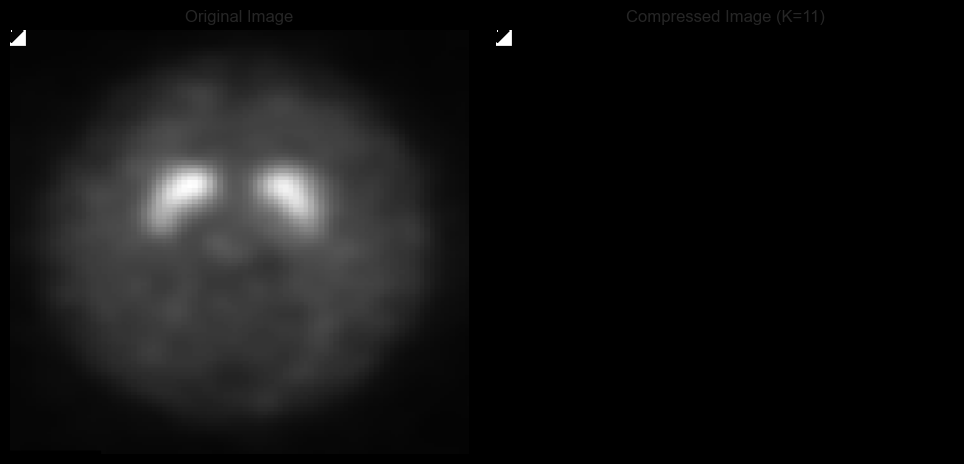

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice40.png


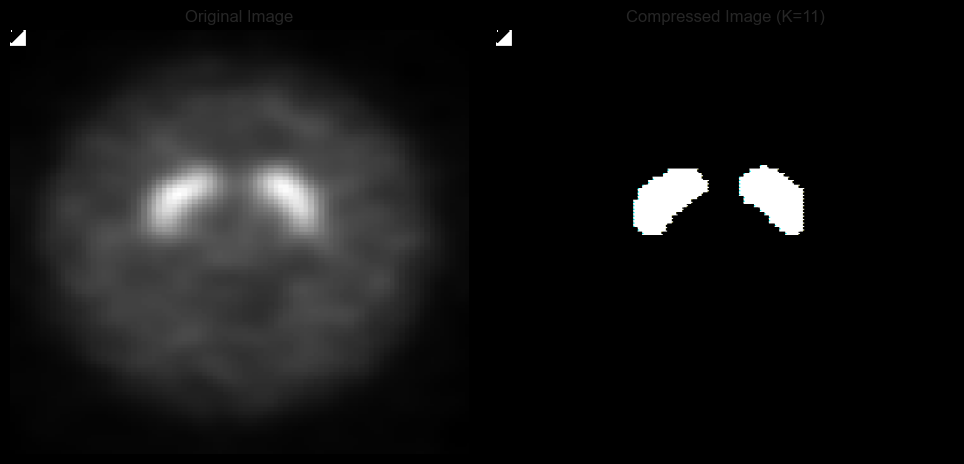

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice39.png


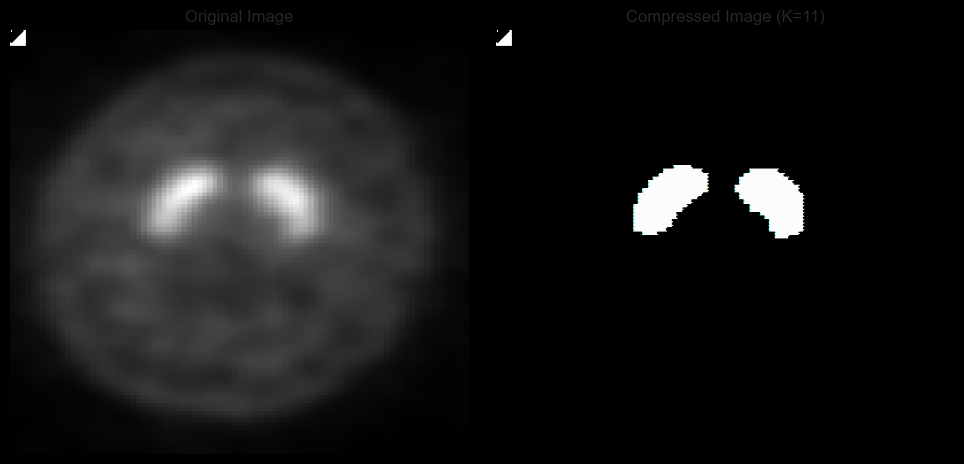

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice39.png


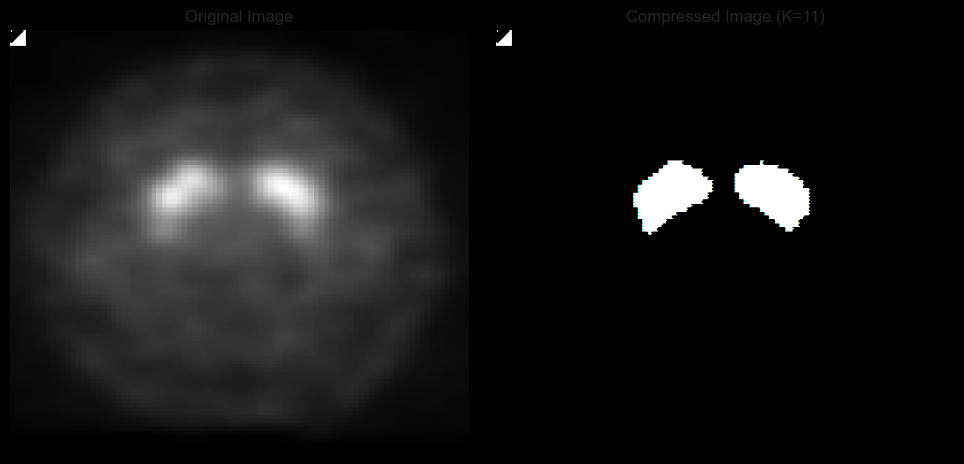

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice43.png


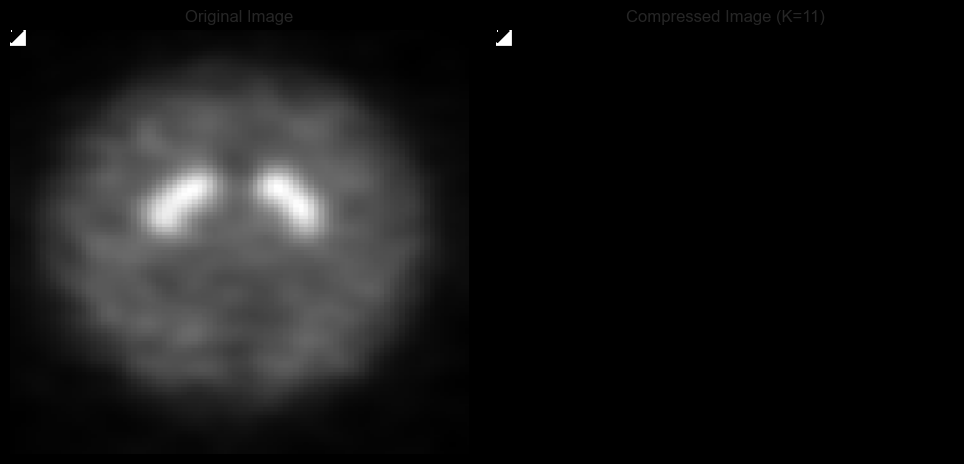

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice37.png


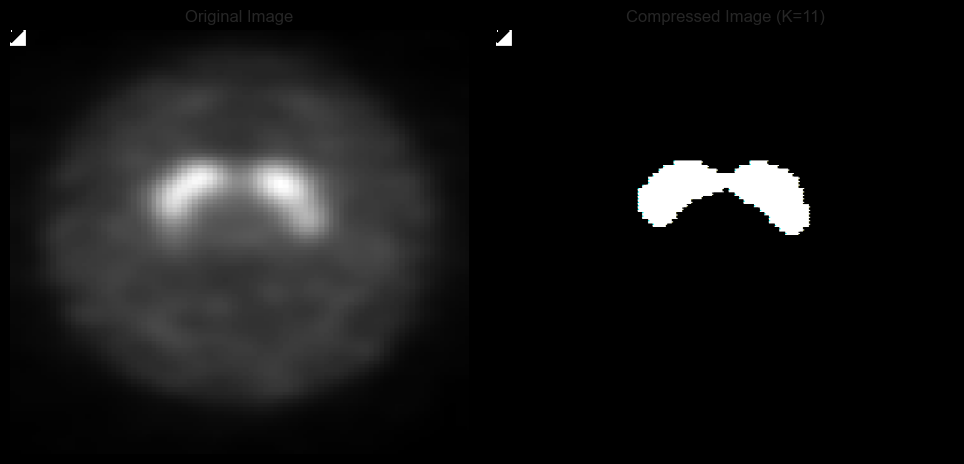

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice37.png


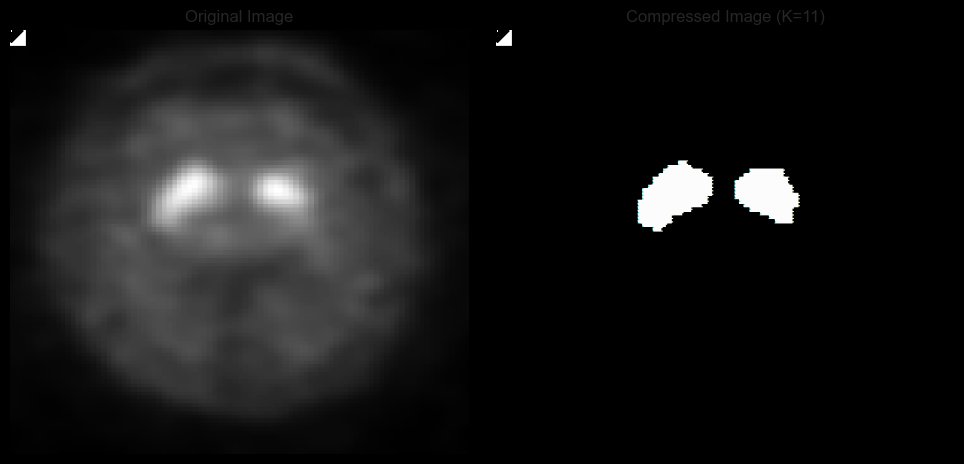

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice43.png


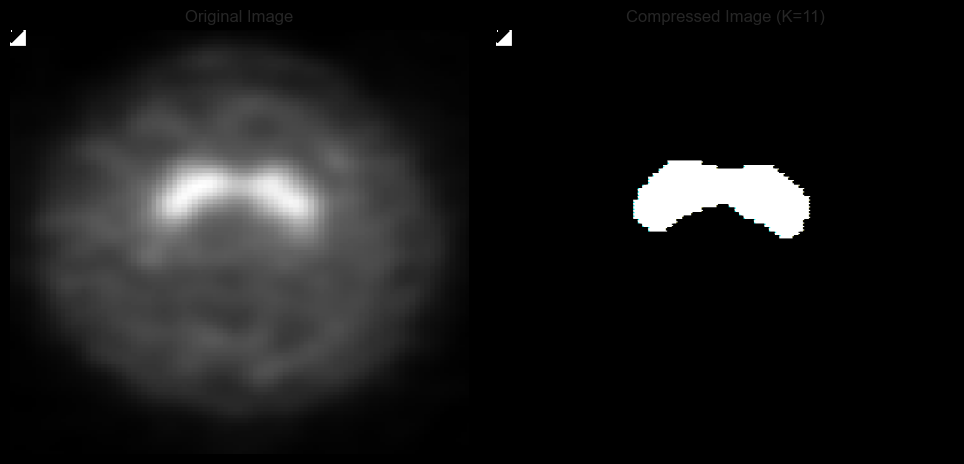

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice40.png


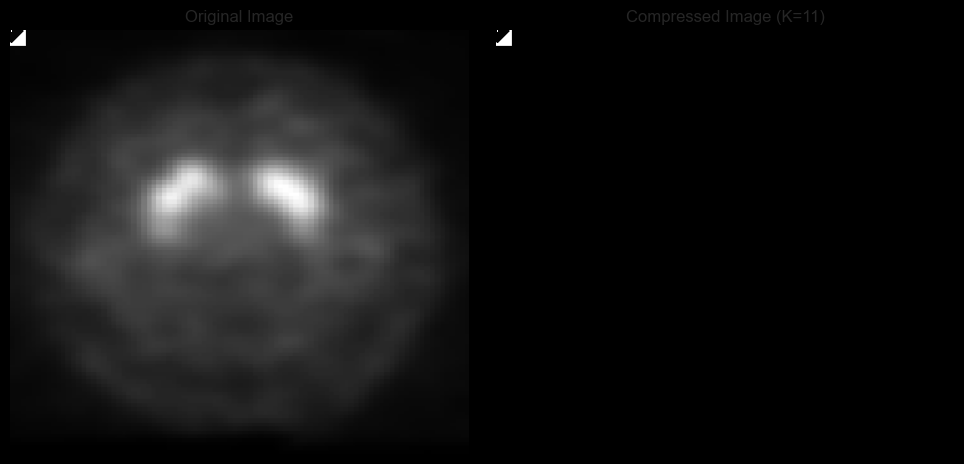

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice42.png


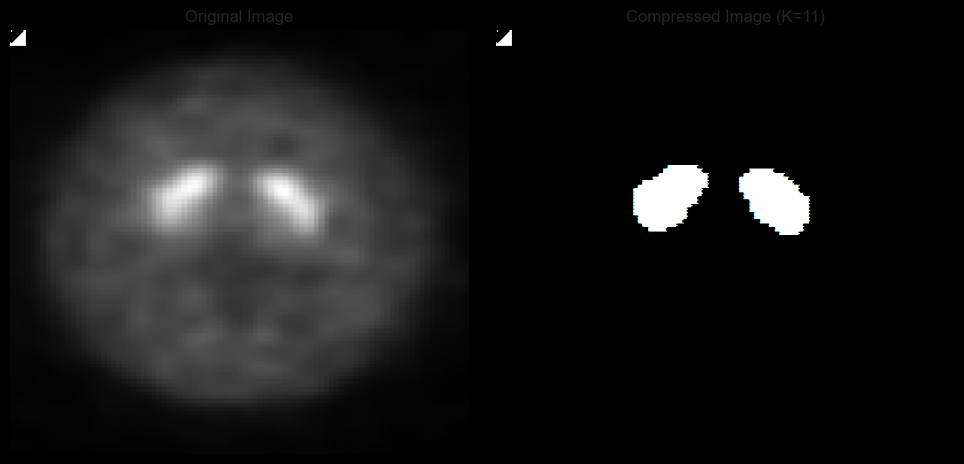

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice40.png


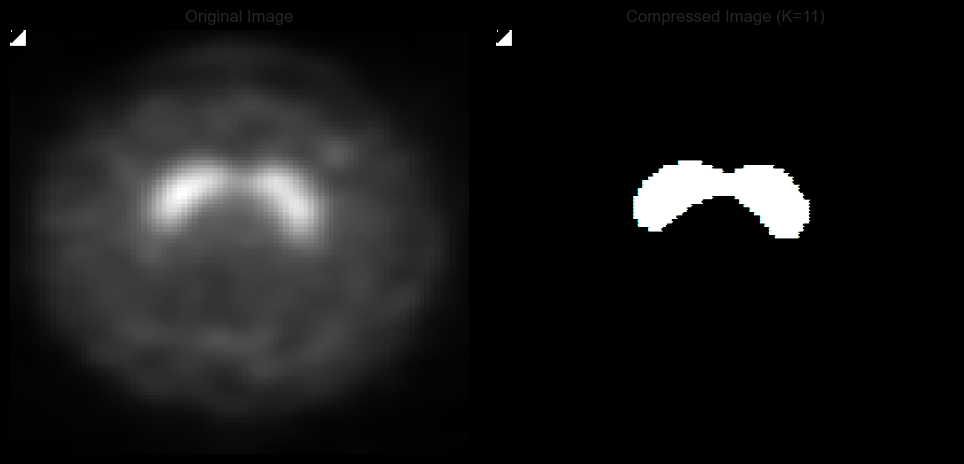

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice44.png


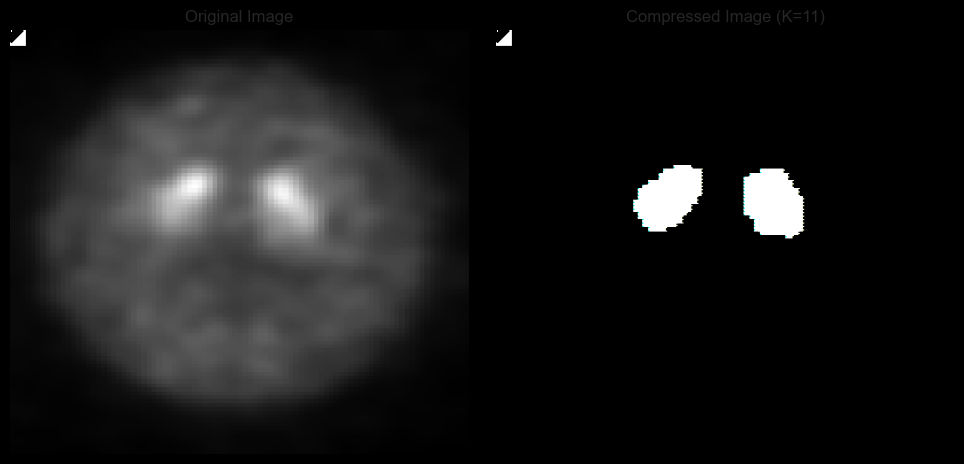

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice37.png


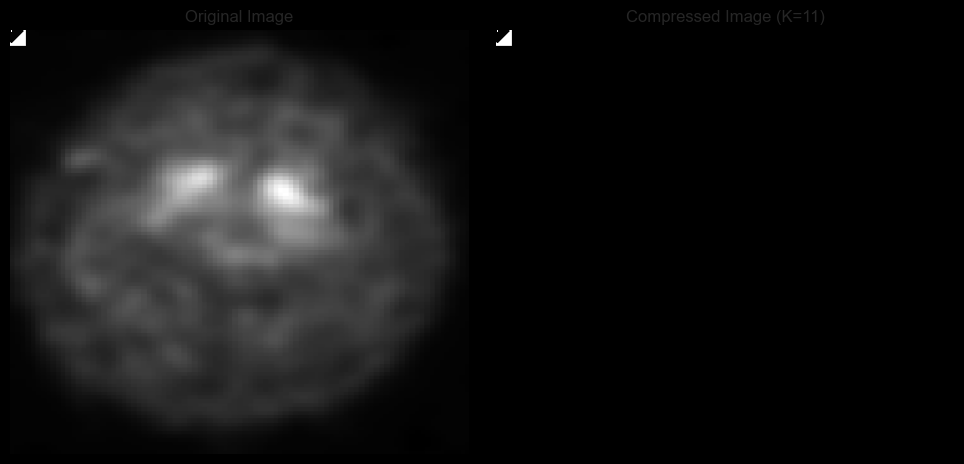

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice39.png


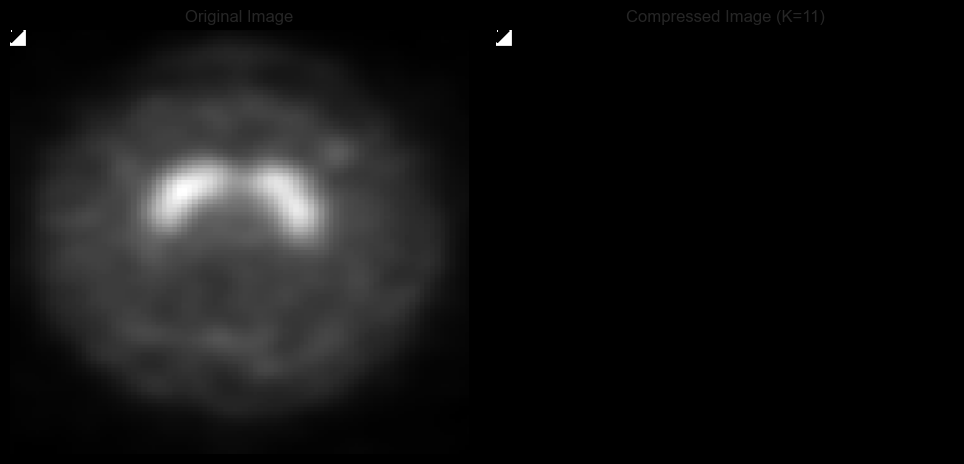

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice43.png


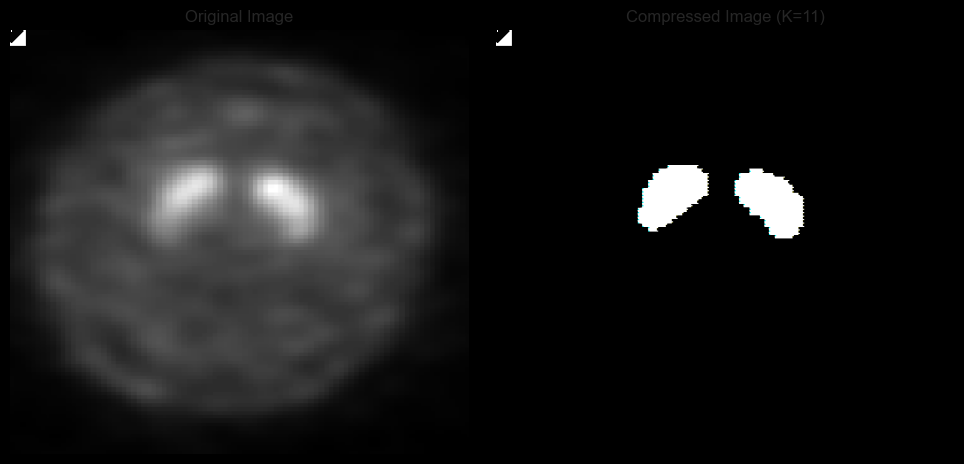

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice37.png


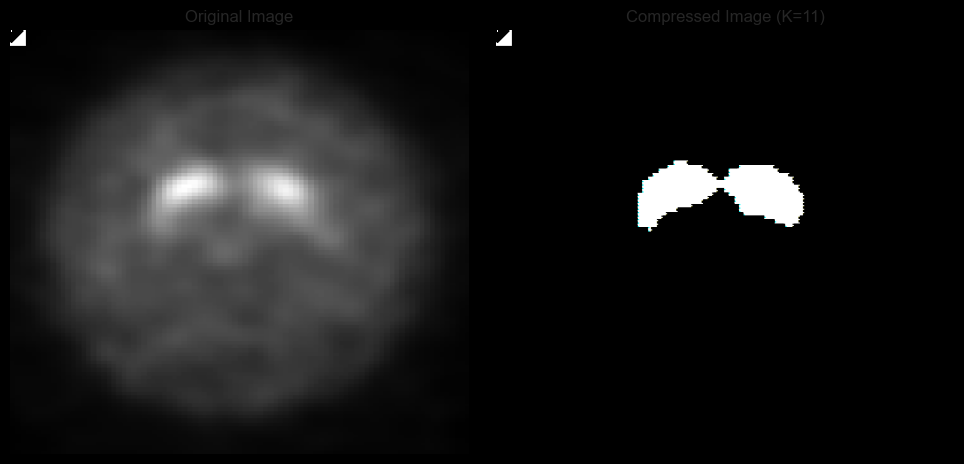

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice42.png


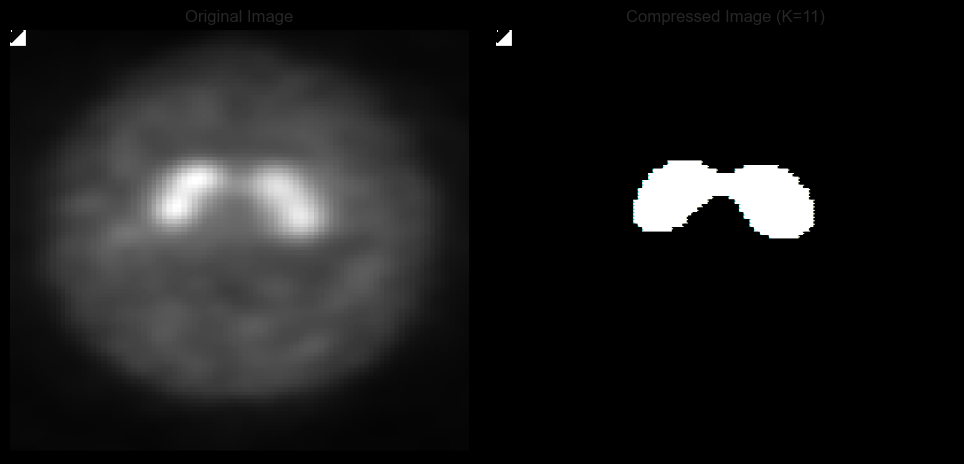

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice42.png


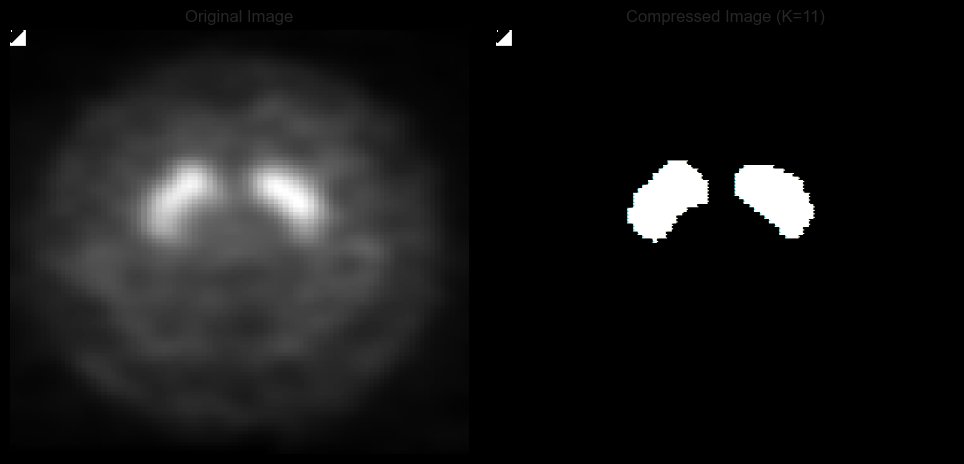

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice37.png


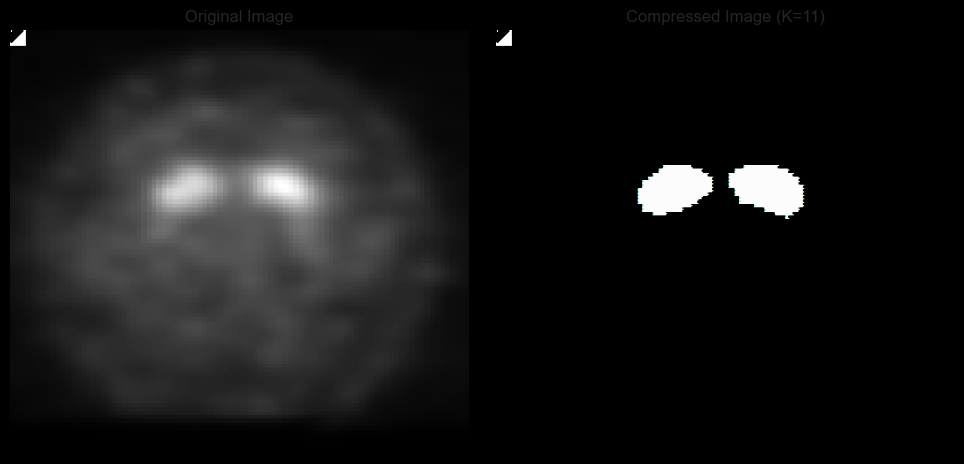

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice40.png


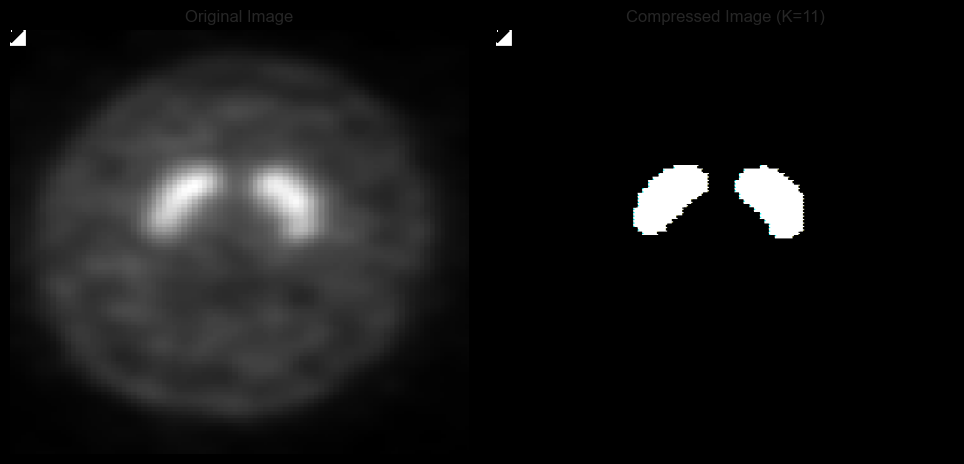

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice38.png


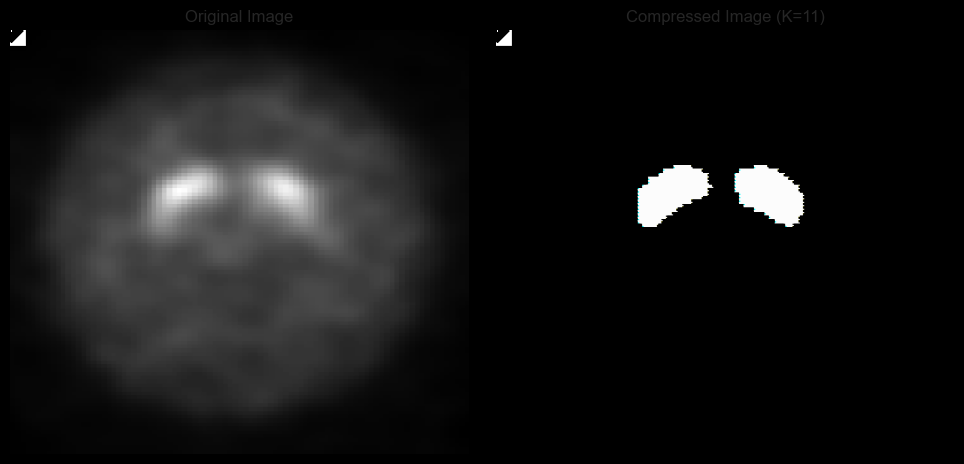

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice42.png


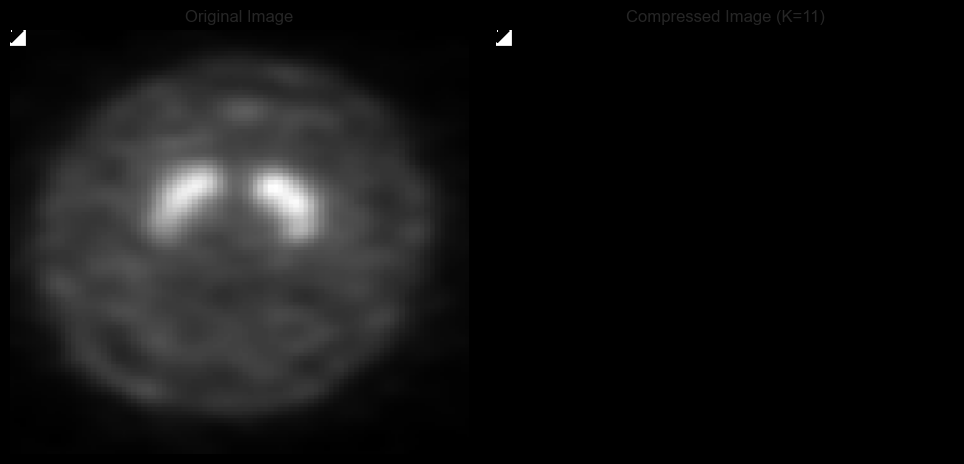

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice38.png


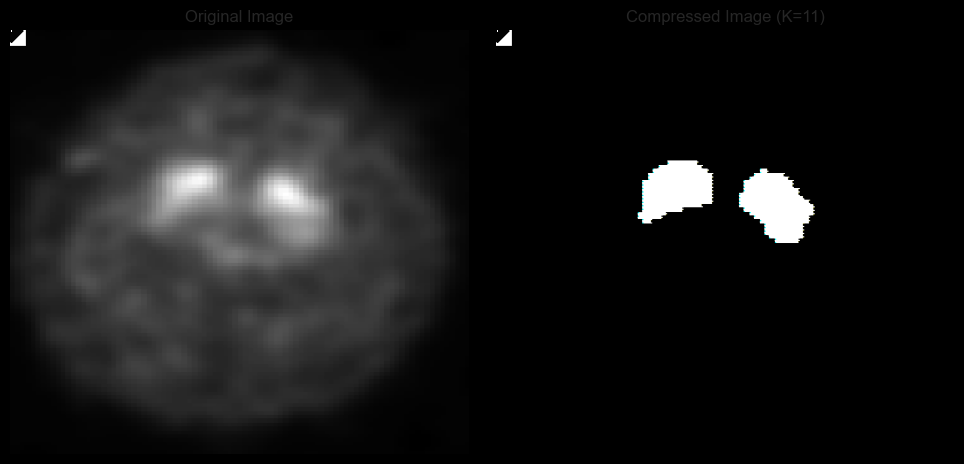

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice38.png


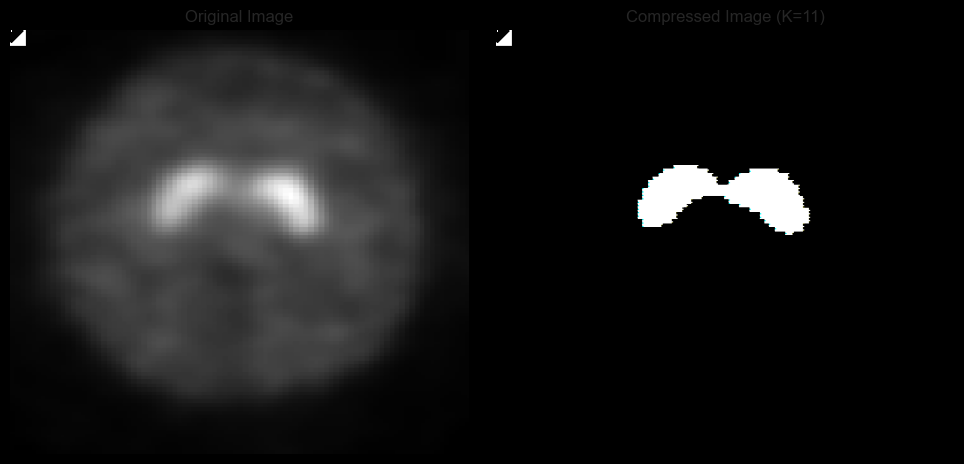

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice40.png


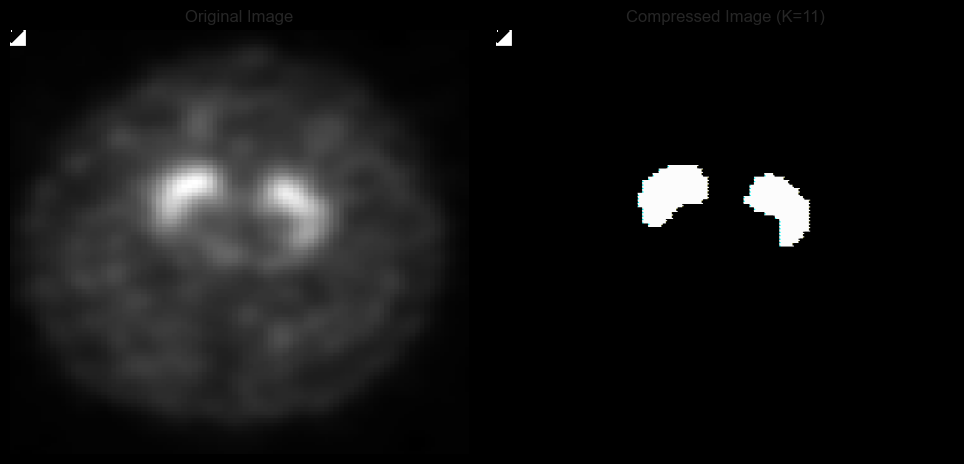

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice38.png


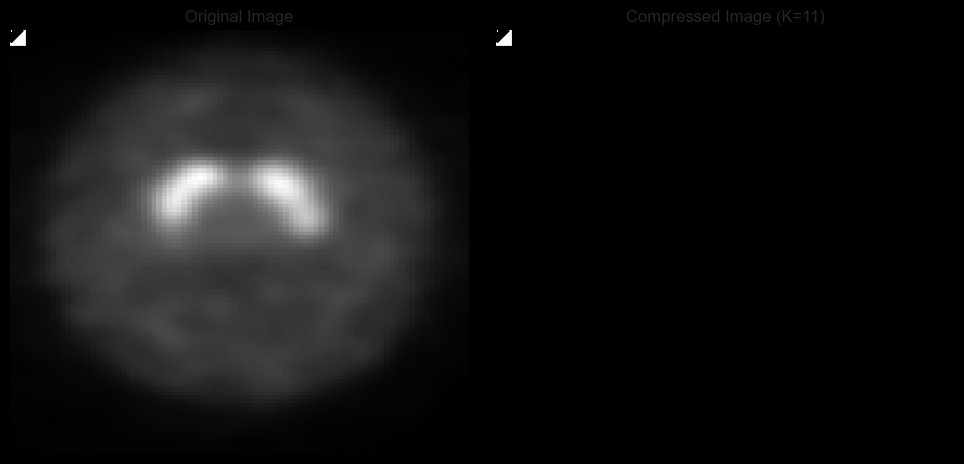

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice44.png


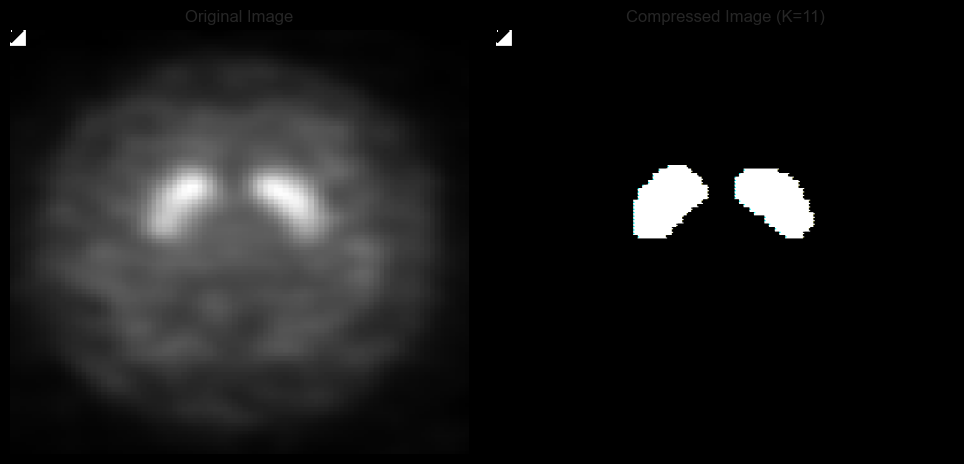

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice38.png


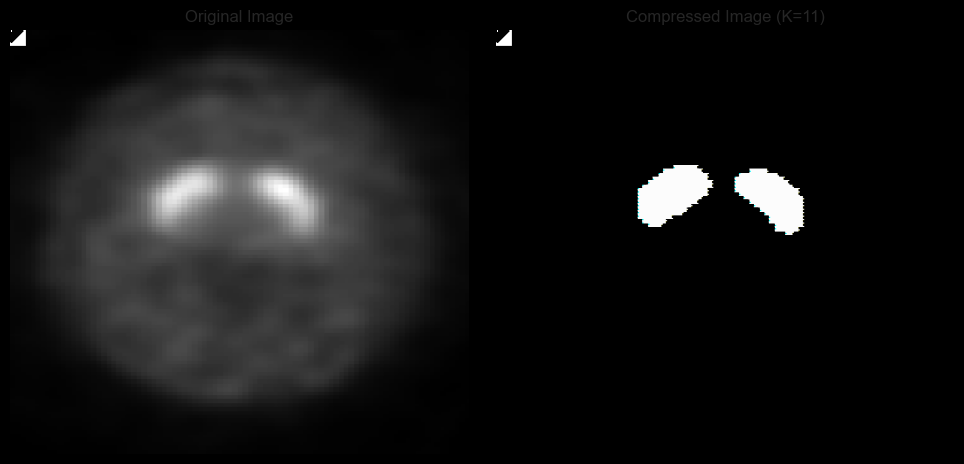

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice43.png


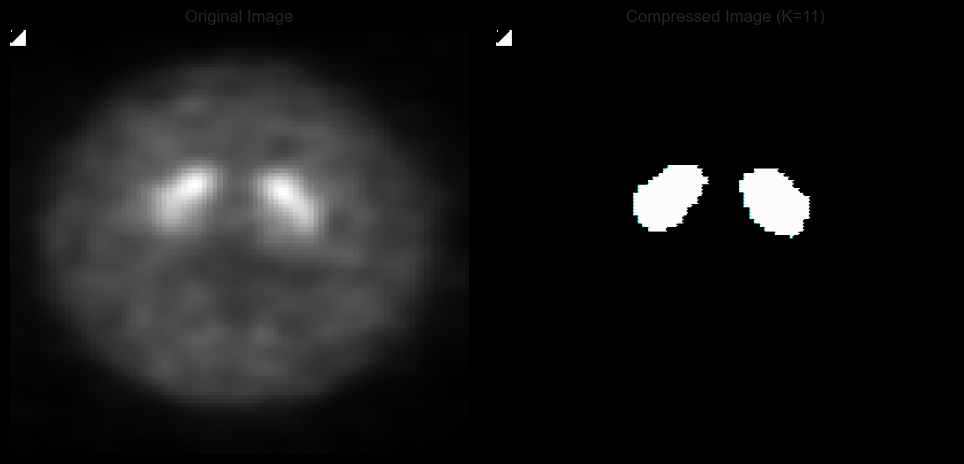

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice43.png


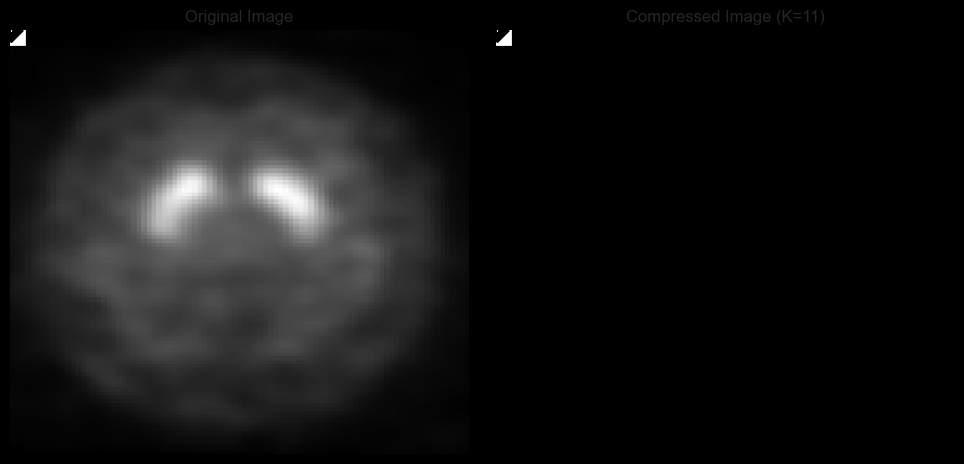

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice44.png


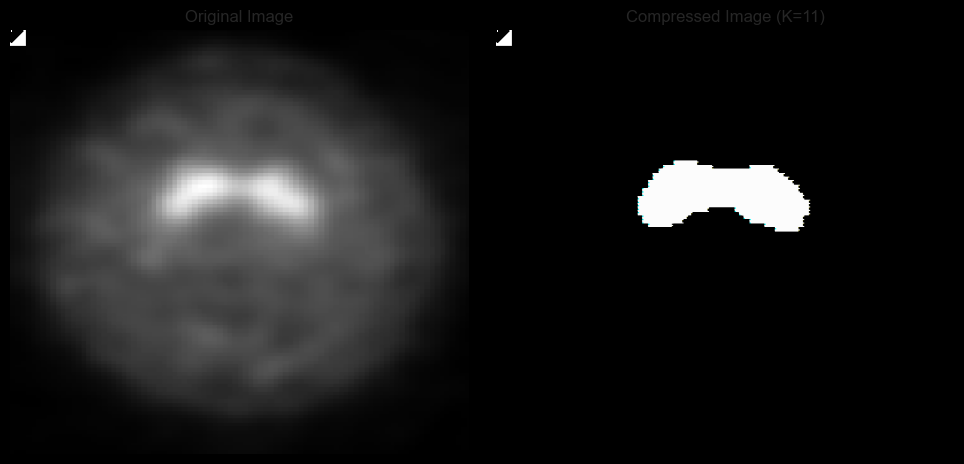

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice38.png


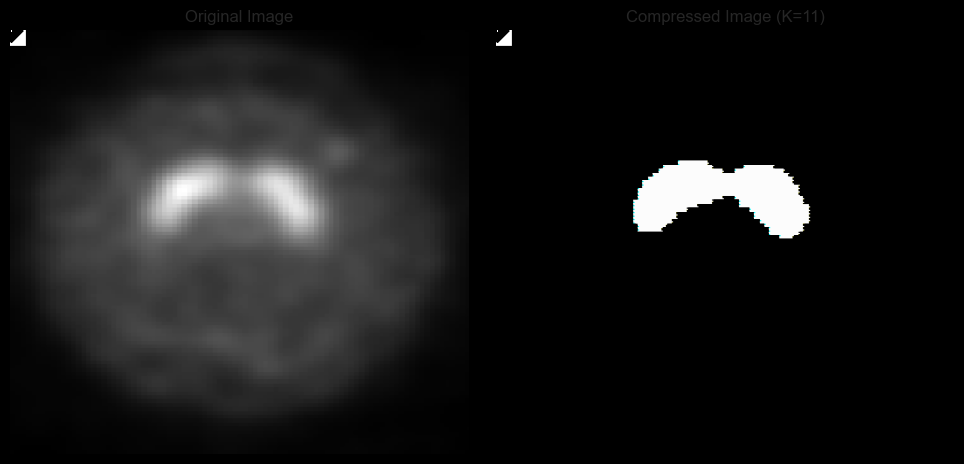

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice41.png


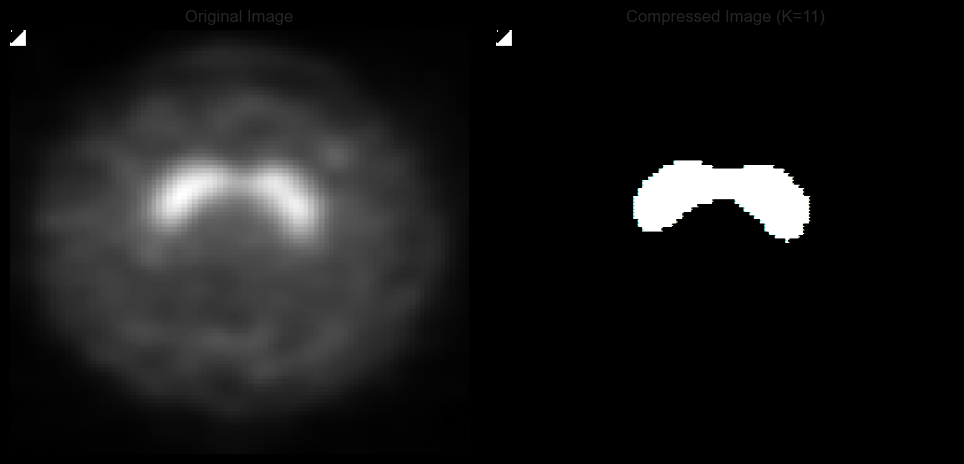

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice42.png


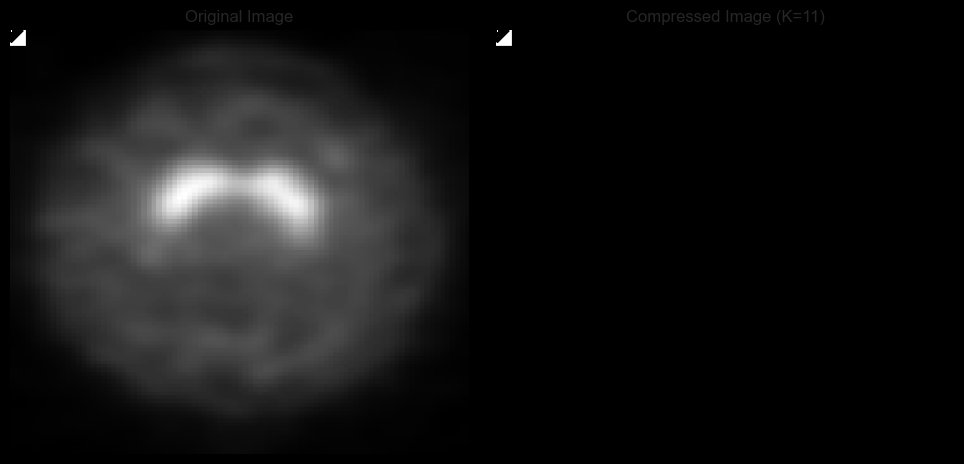

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice43.png


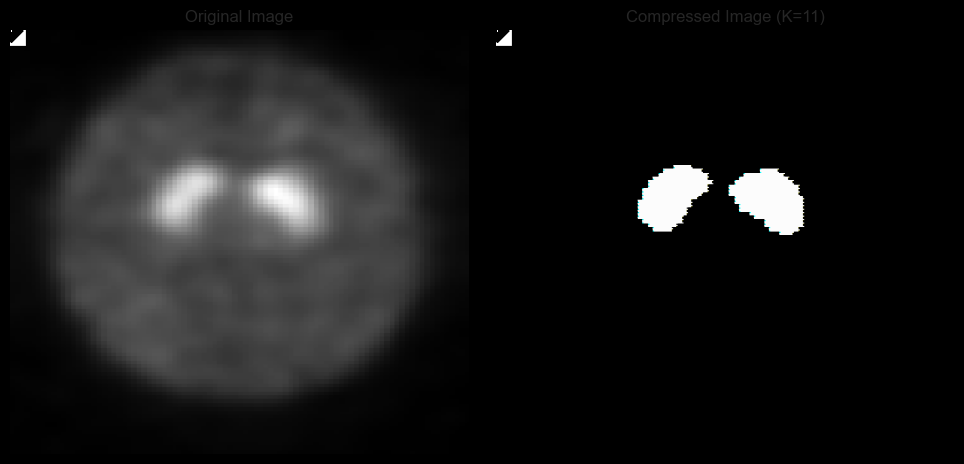

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice37.png


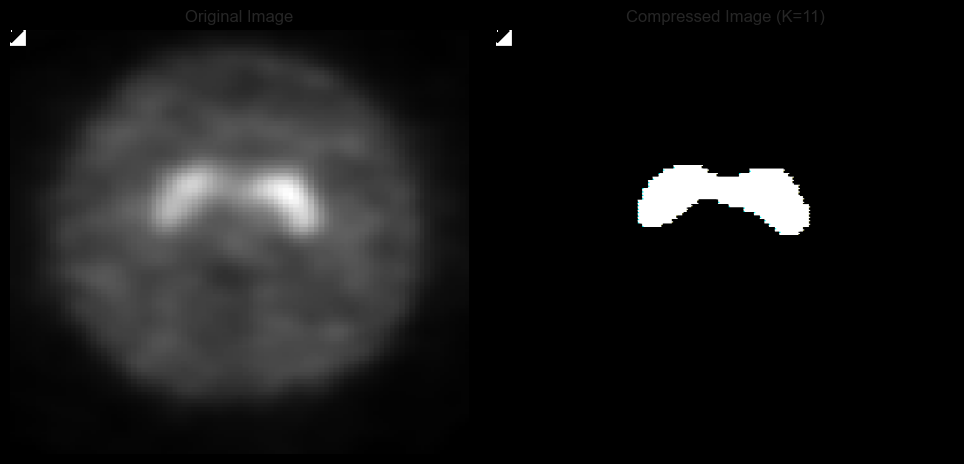

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice44.png


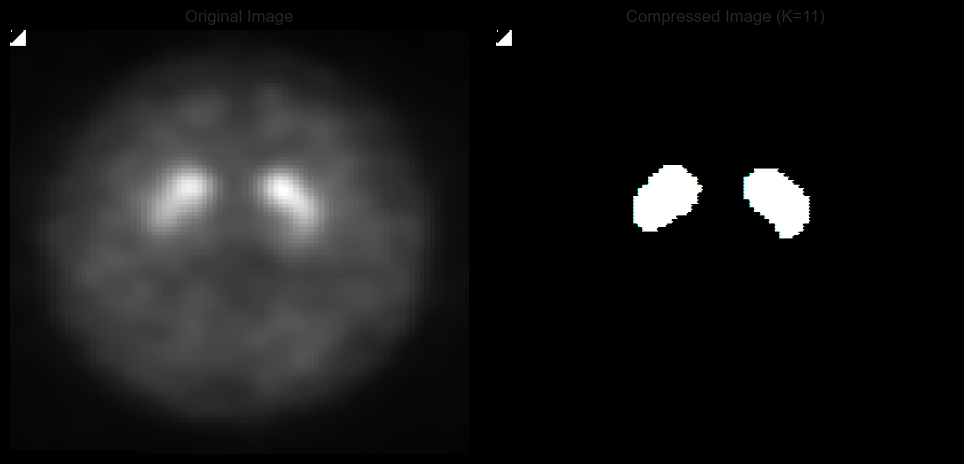

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice38.png


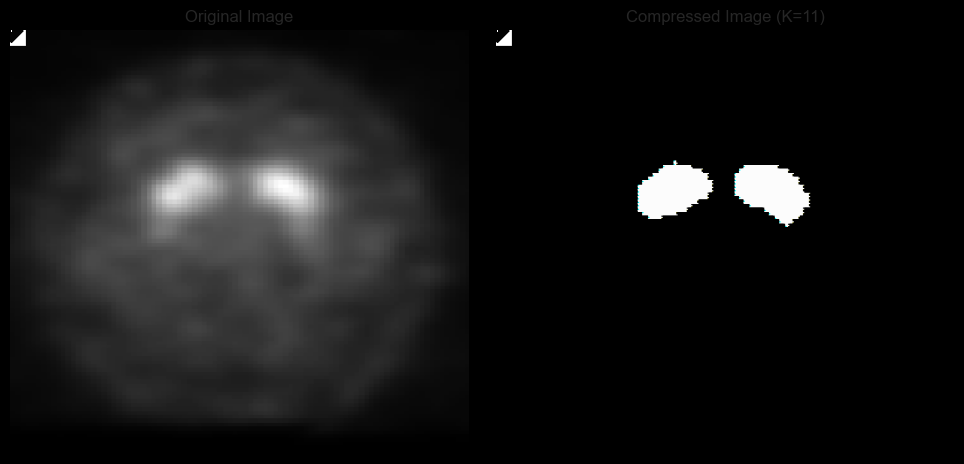

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice41.png


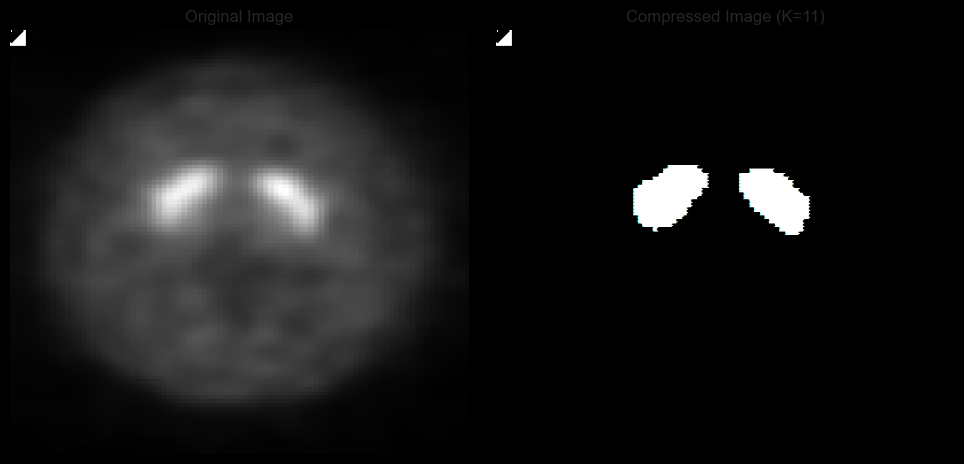

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice39.png


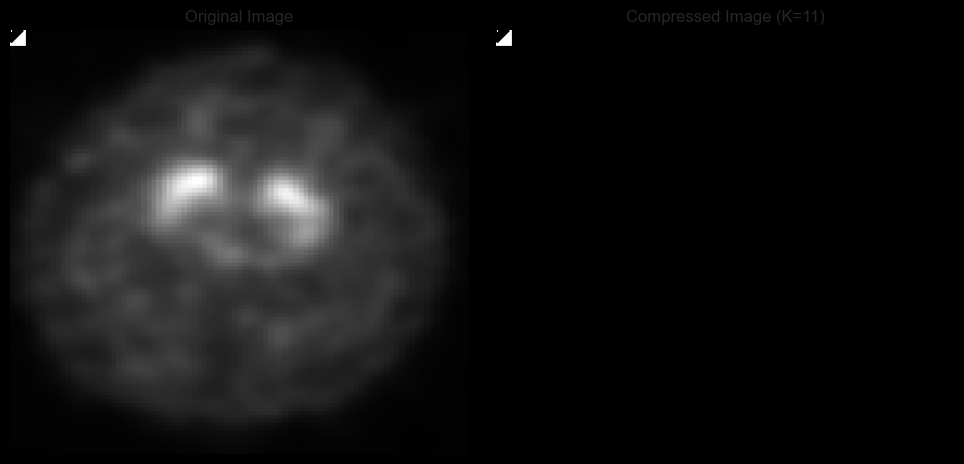

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice44.png


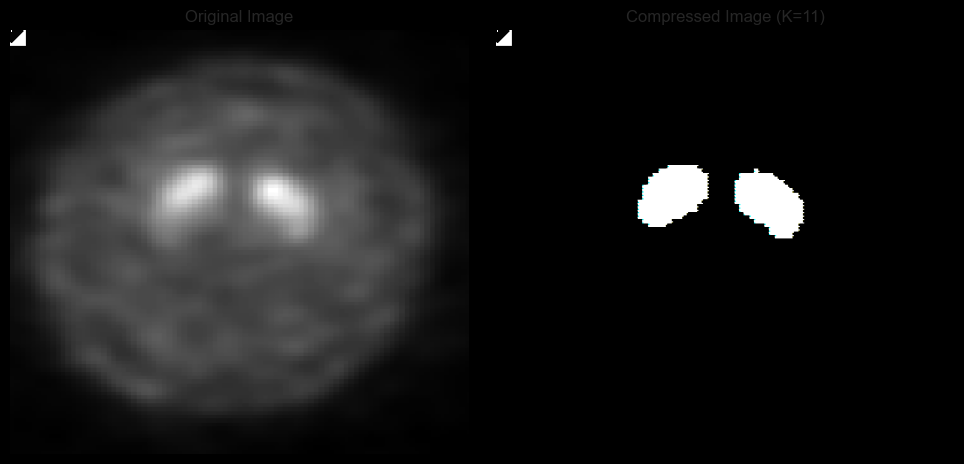

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice43.png


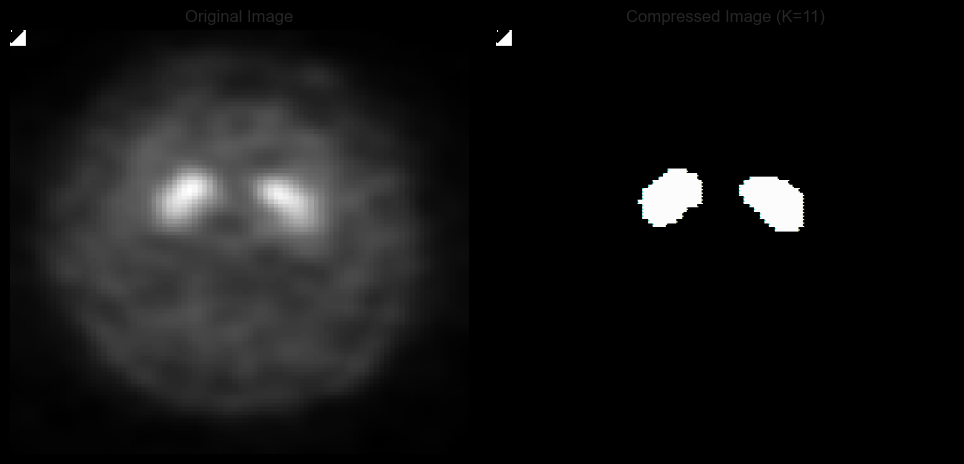

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice40.png


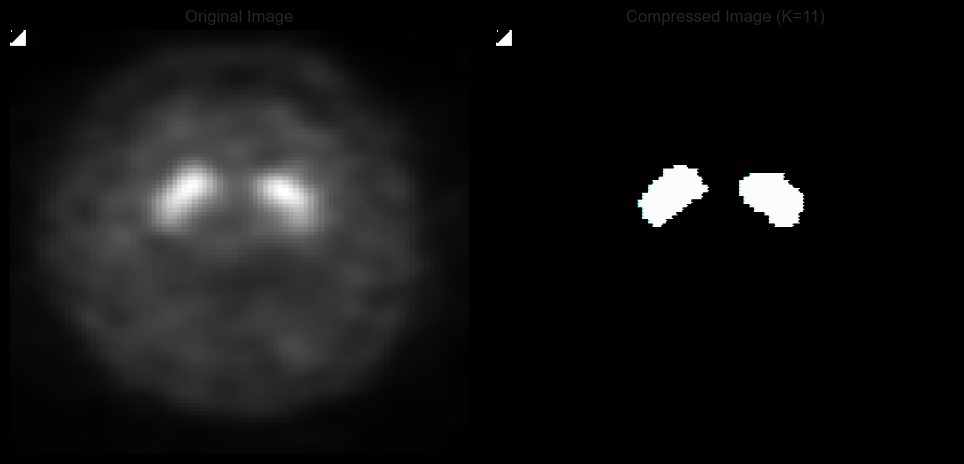

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice42.png


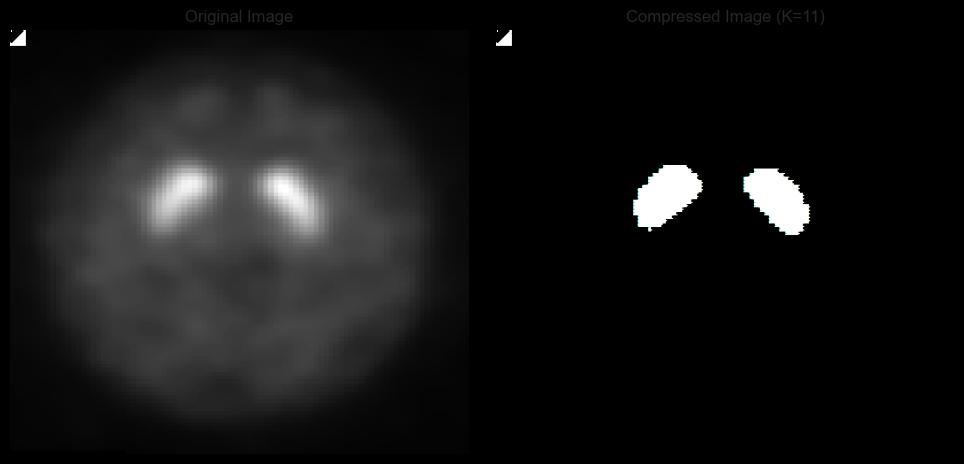

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice37.png


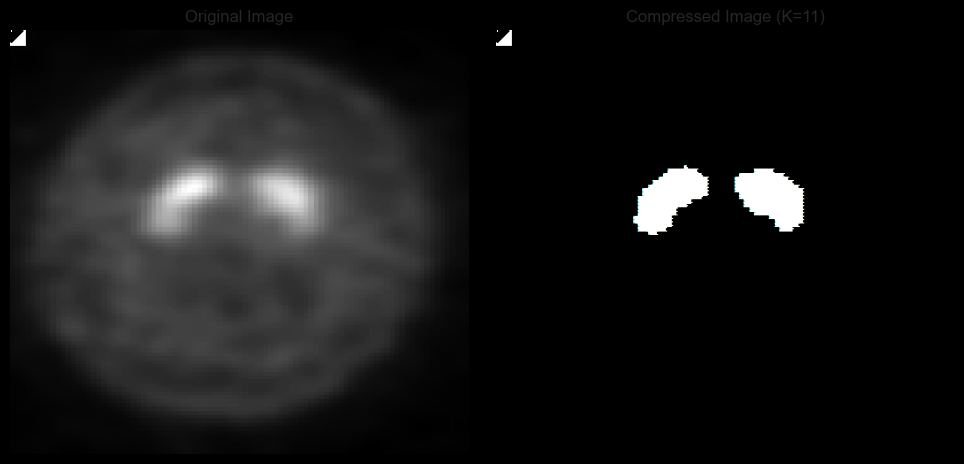

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice44.png


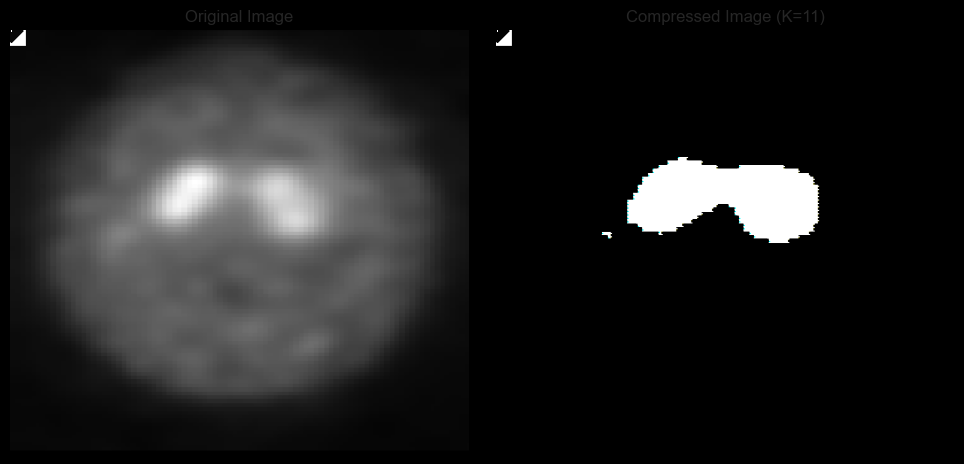

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice41.png


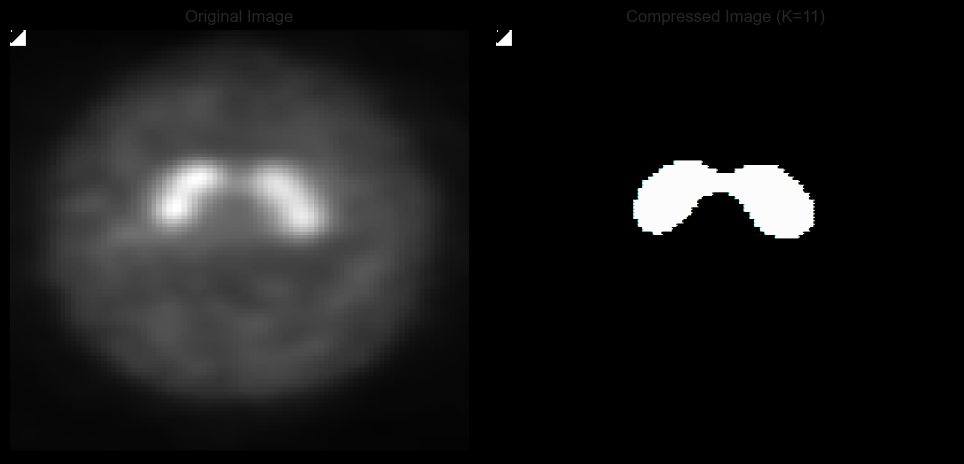

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice44.png


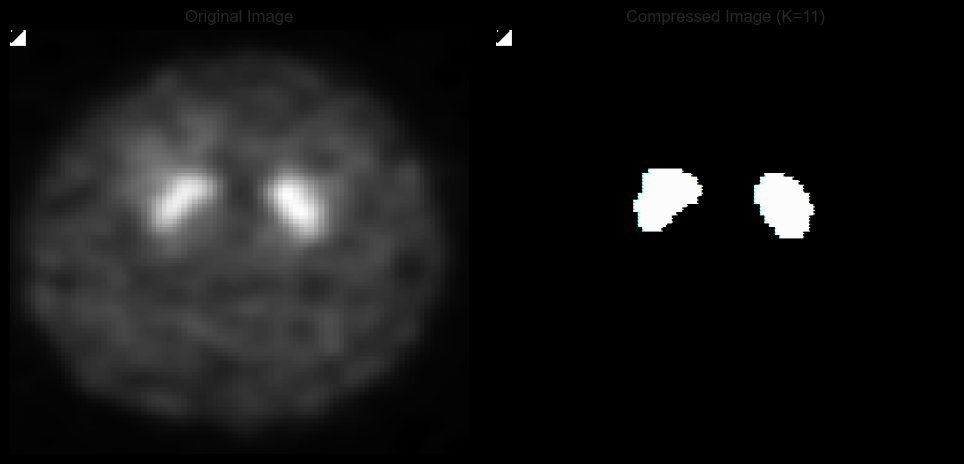

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice40.png


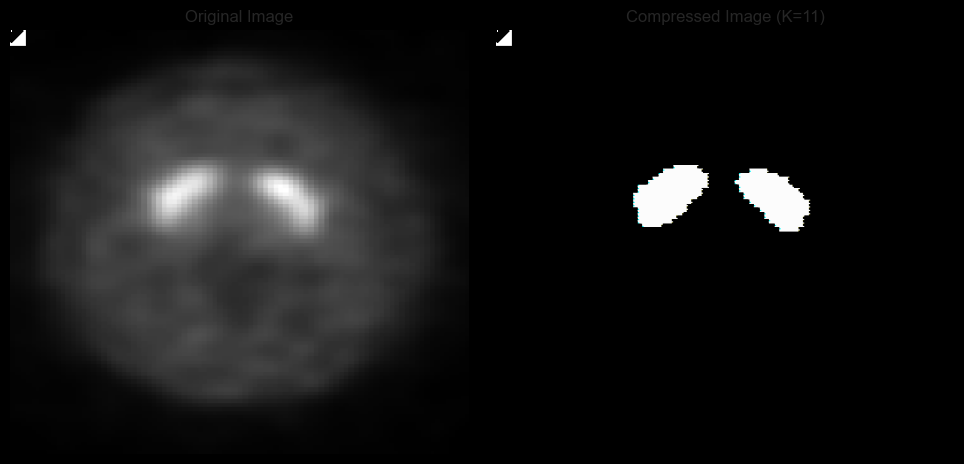

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice39.png


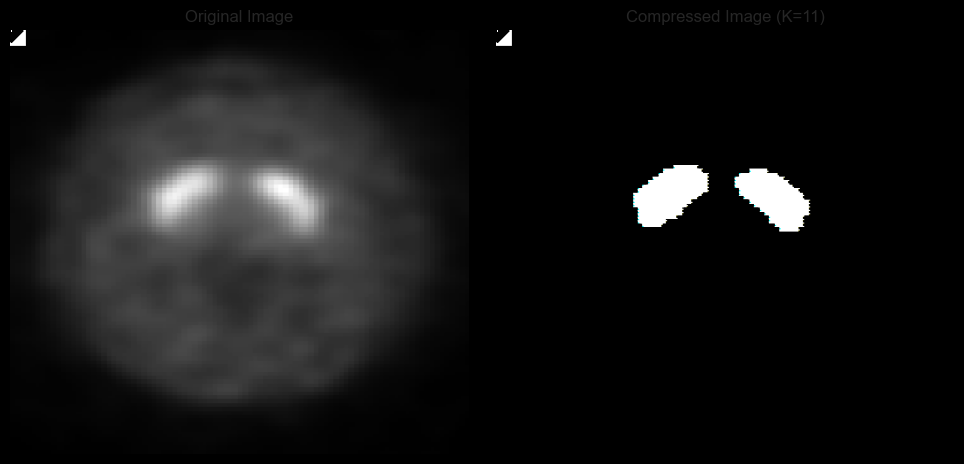

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice42.png


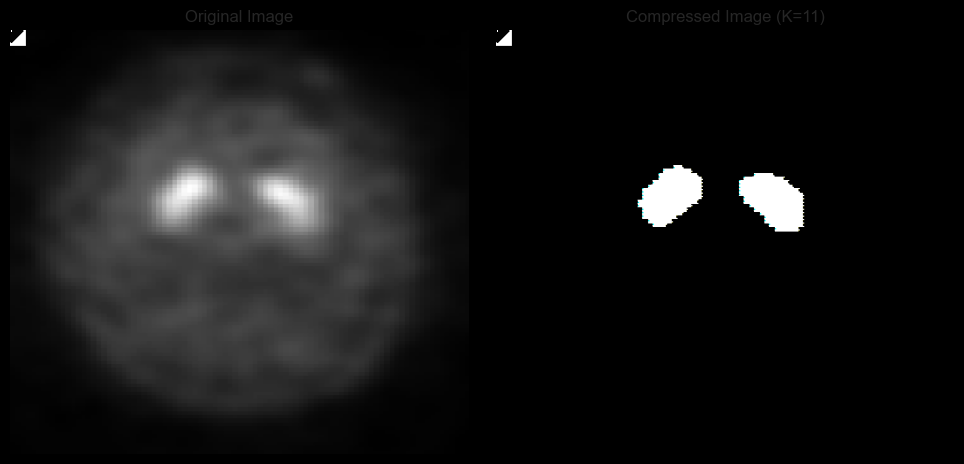

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice41.png


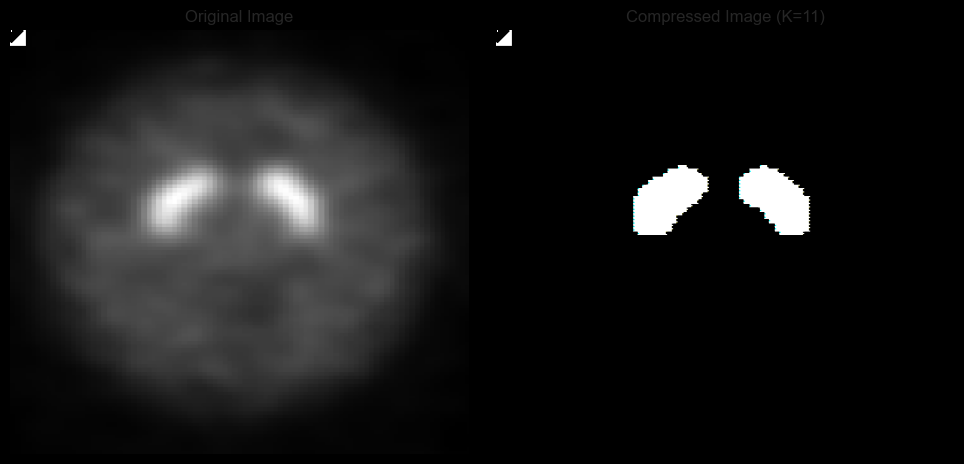

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice40.png


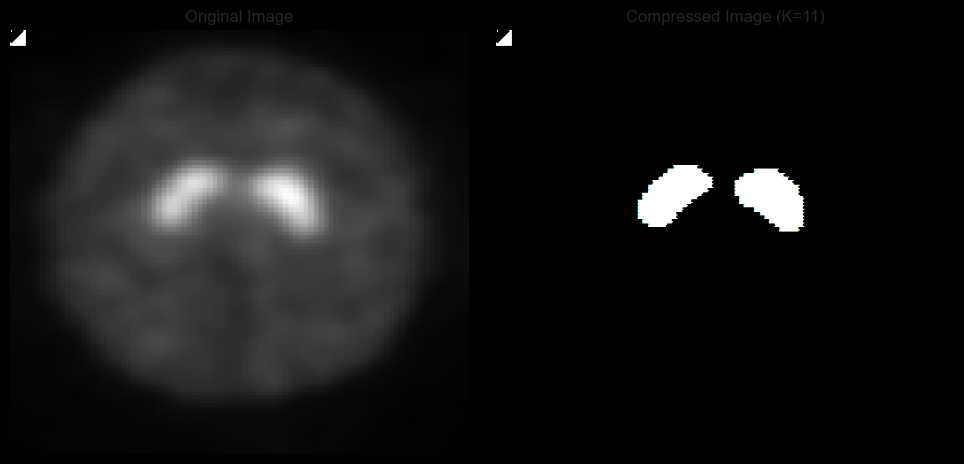

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice44.png


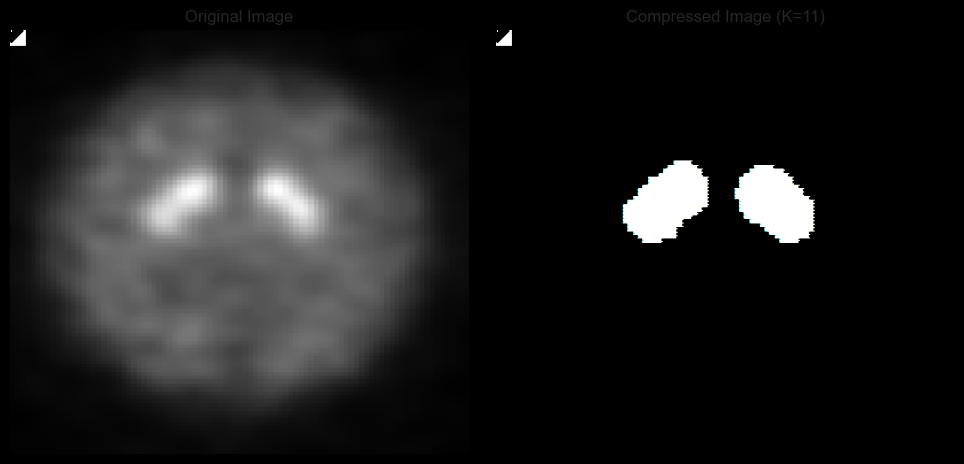

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice38.png


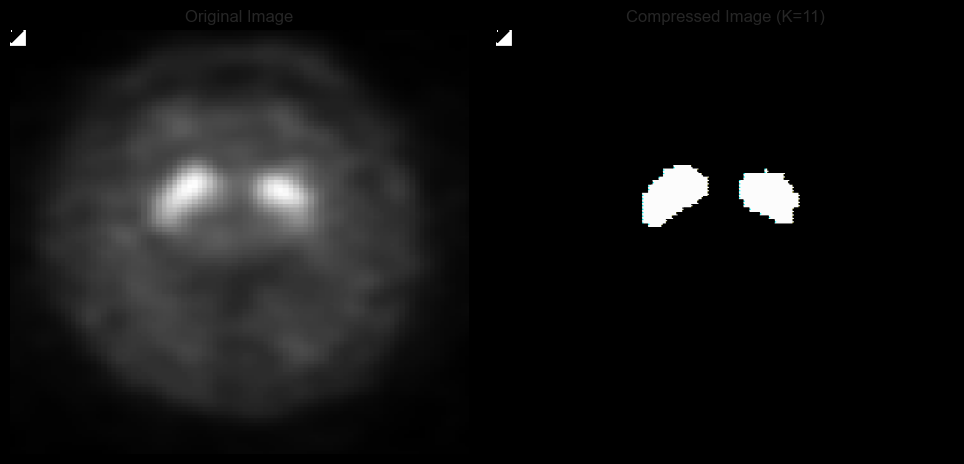

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice39.png


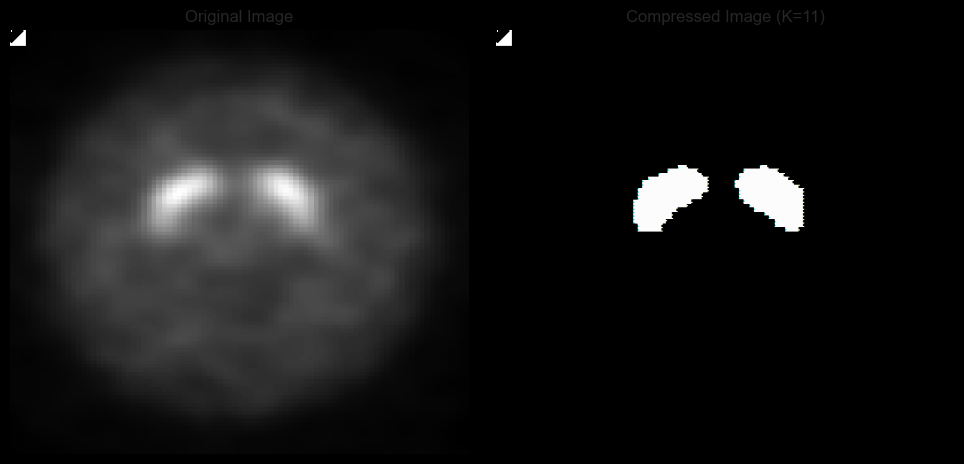

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice41.png


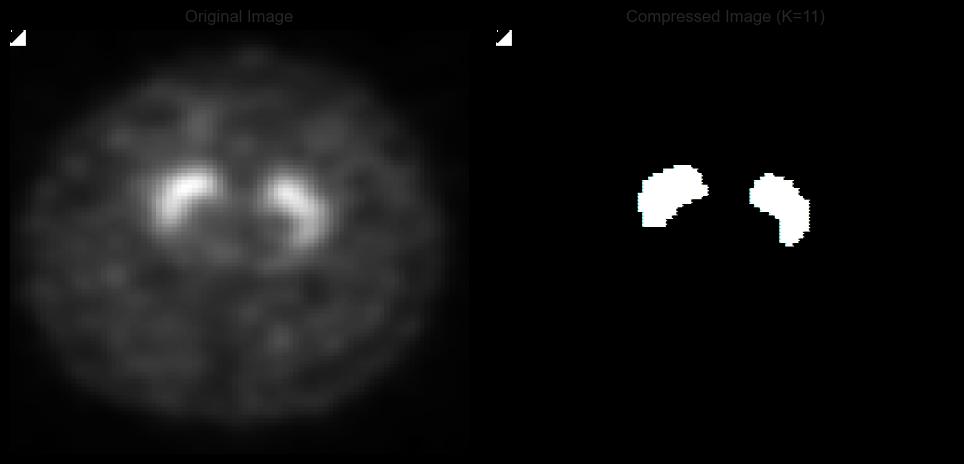

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice40.png


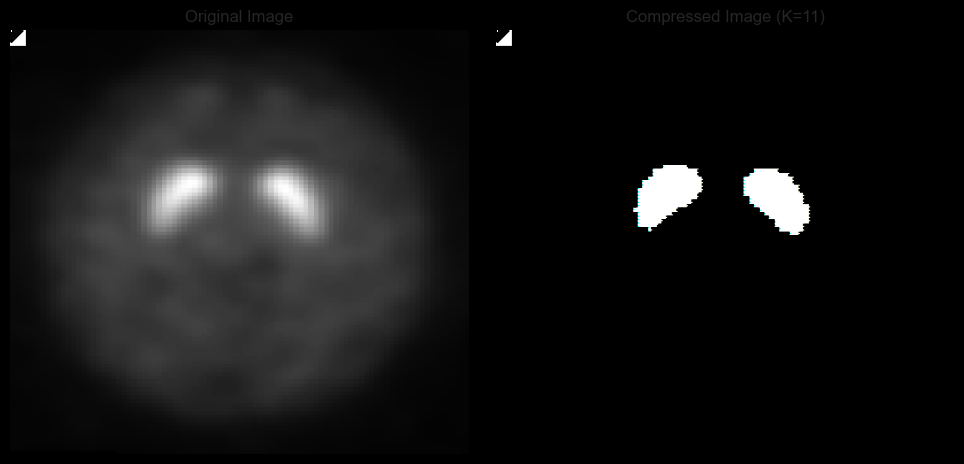

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice39.png


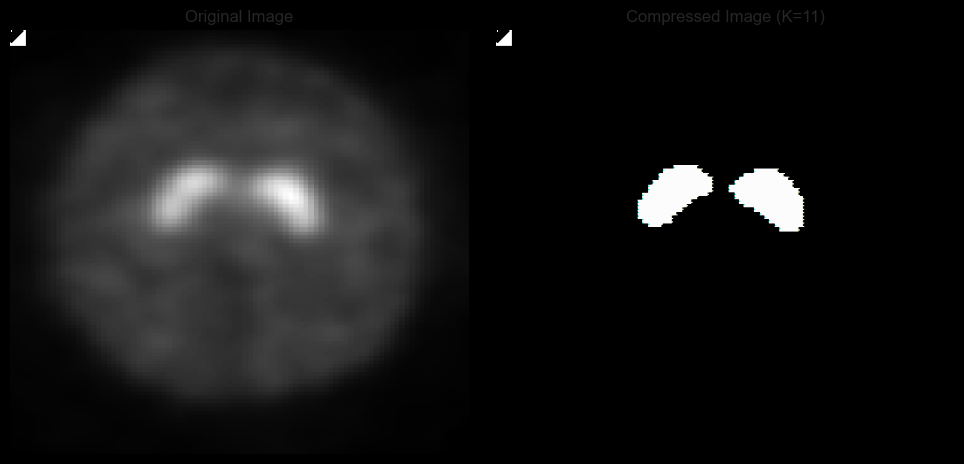

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3765_2012-12-06_15_09_17.0_slice42.png


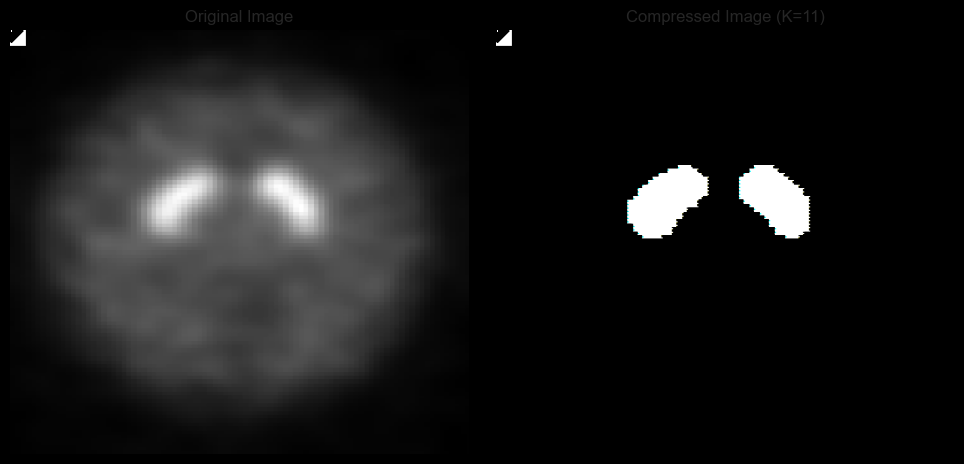

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3768_2012-12-12_15_38_03.0_slice37.png


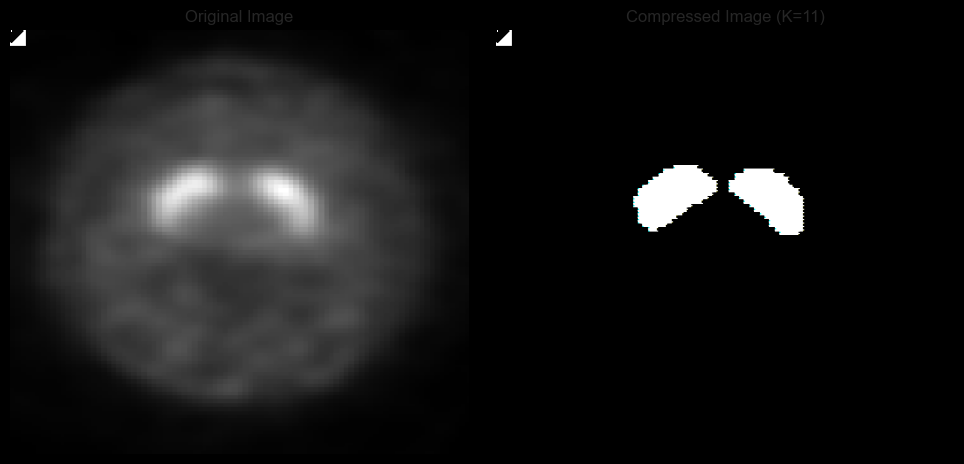

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice38.png


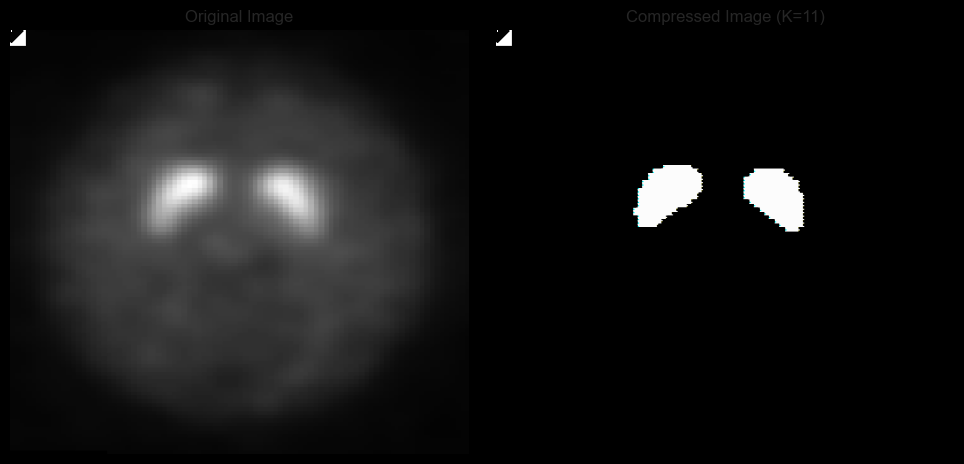

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice44.png


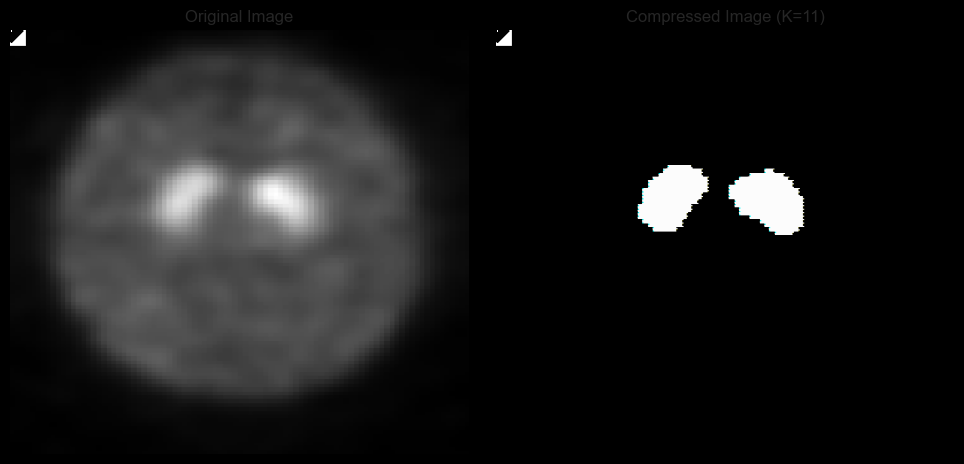

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice39.png


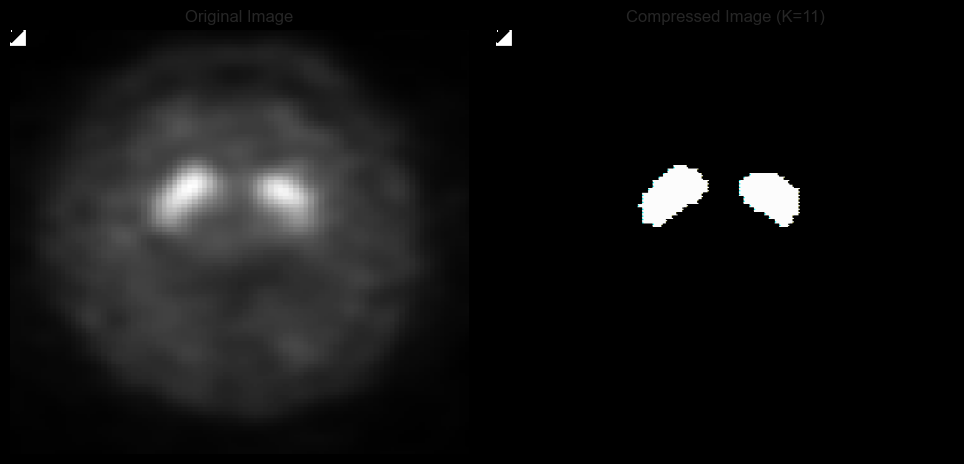

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice43.png


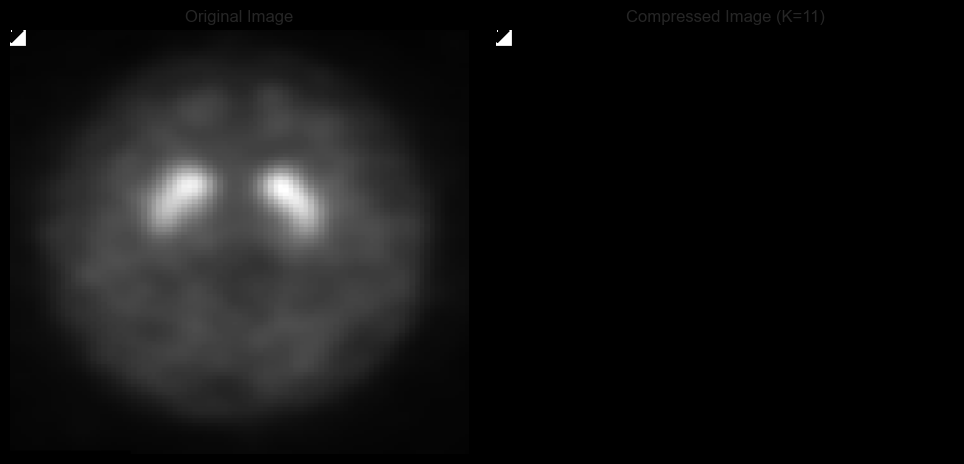

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice41.png


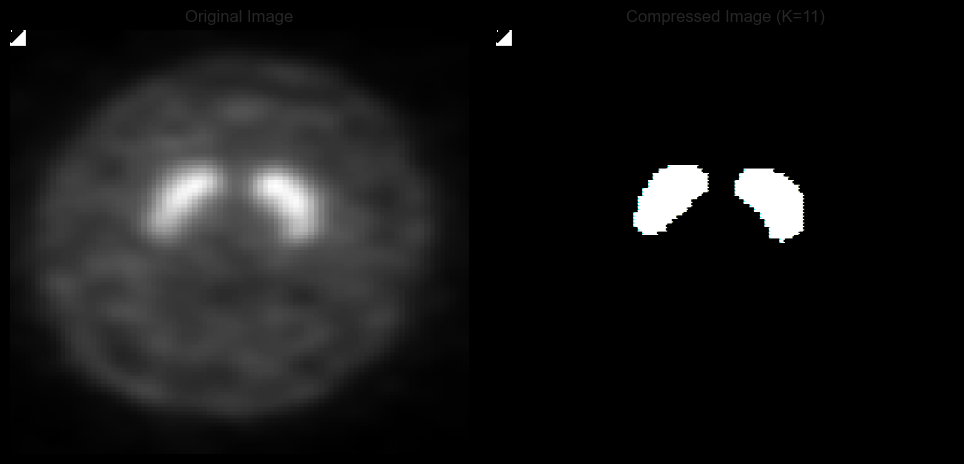

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice41.png


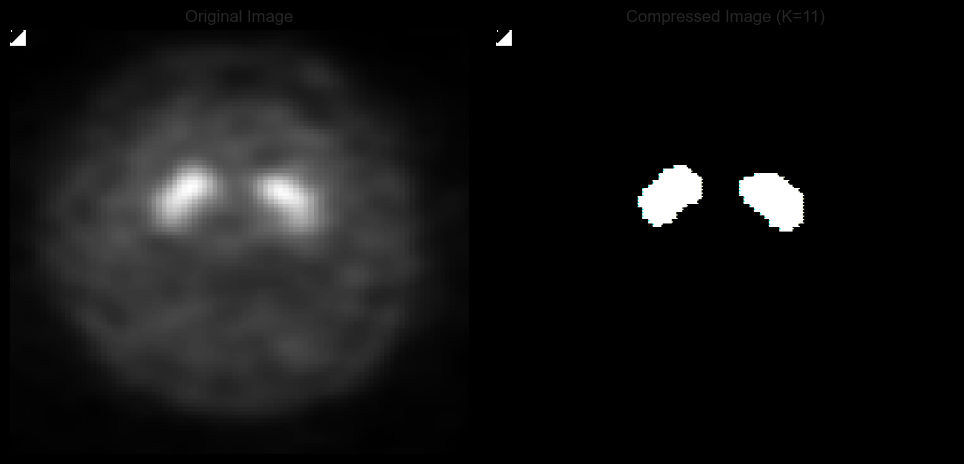

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3756_2012-11-06_14_19_35.0_slice38.png


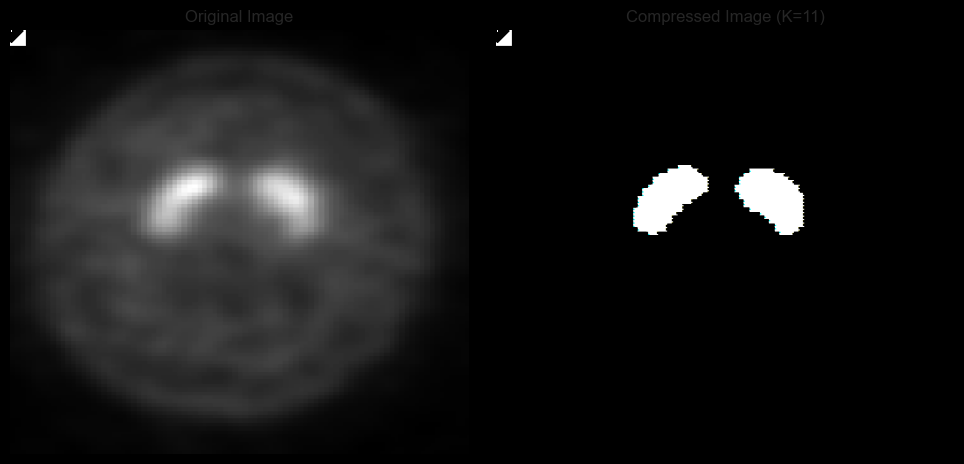

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice41.png


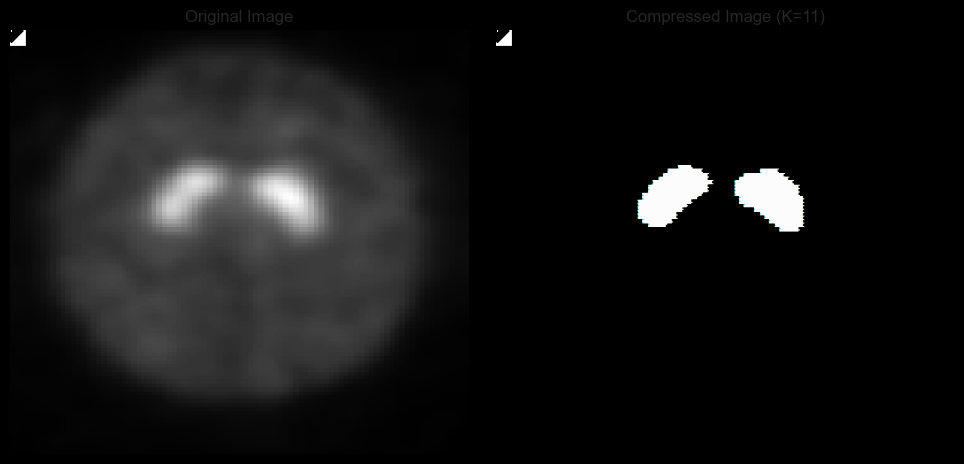

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice42.png


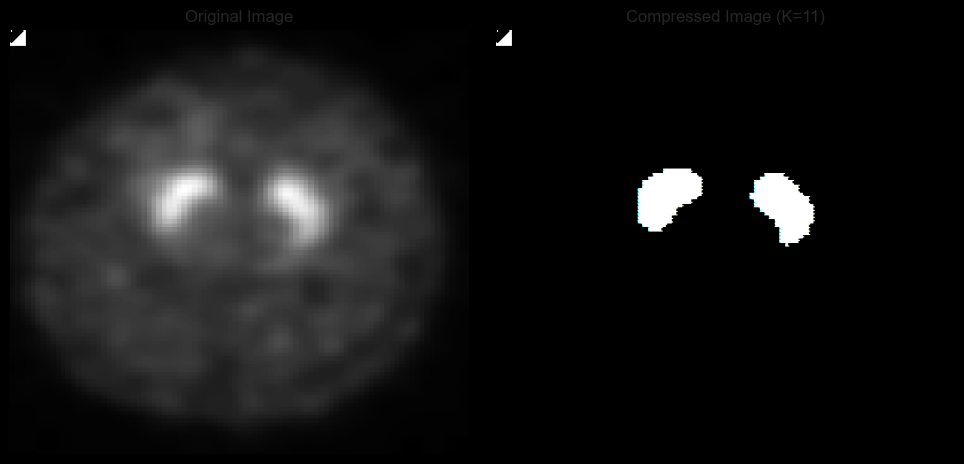

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3754_2012-10-24_14_38_49.0_slice44.png


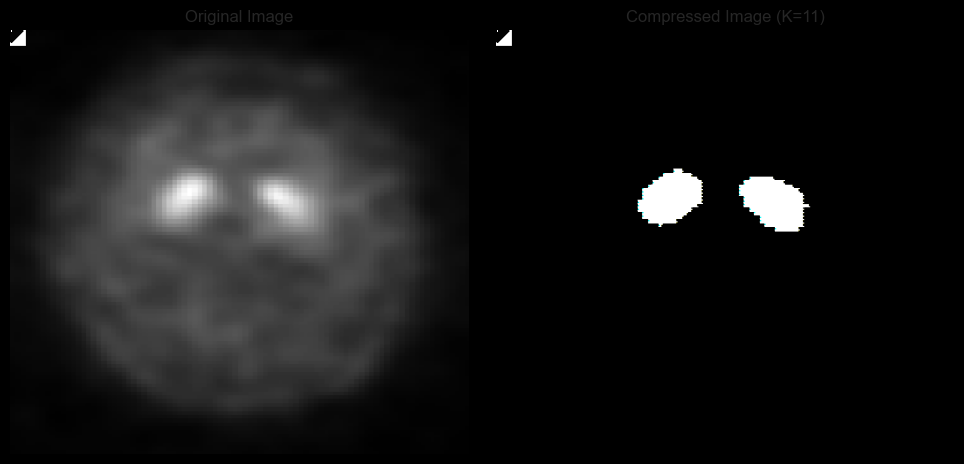

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3651_2012-02-15_14_08_37.0_slice43.png


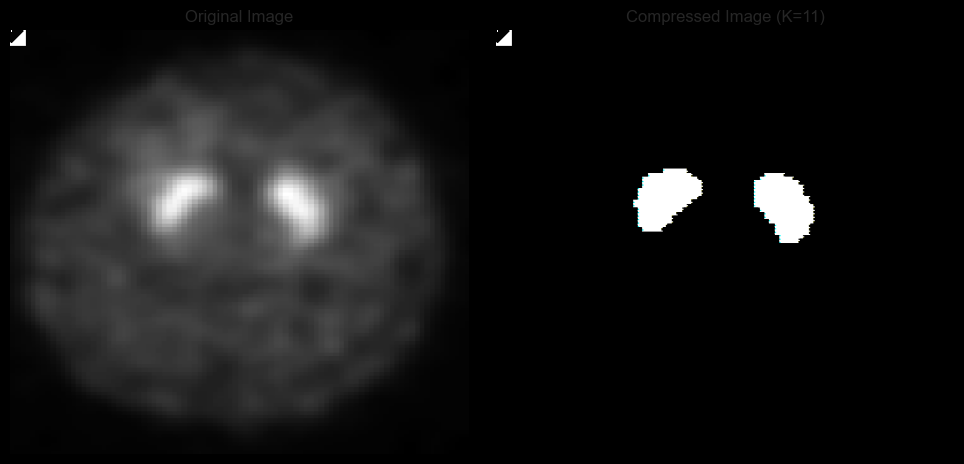

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice43.png


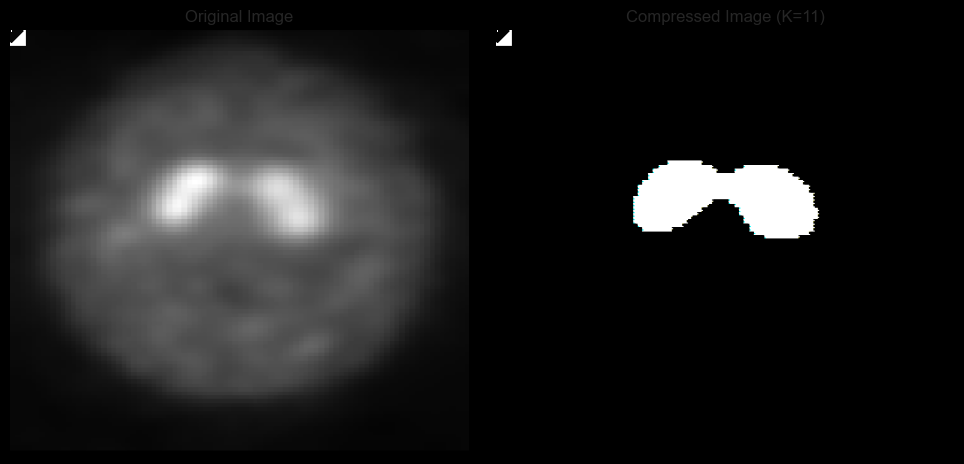

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice40.png


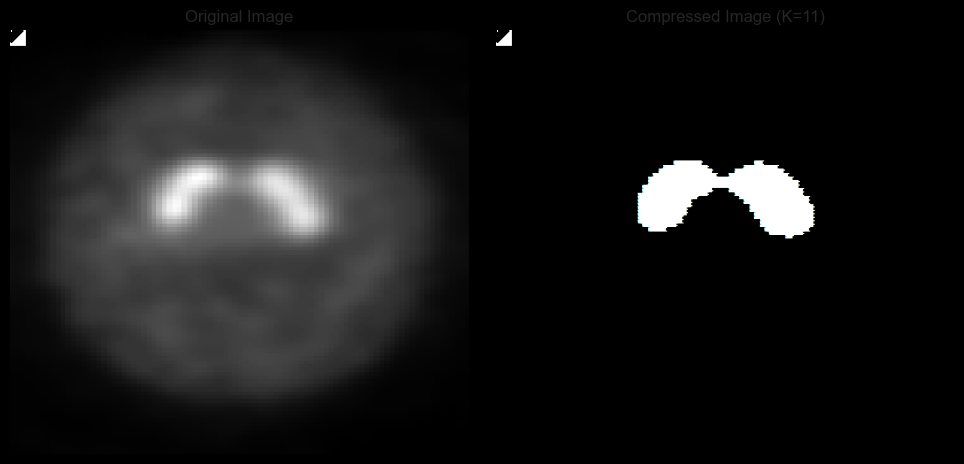

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice39.png


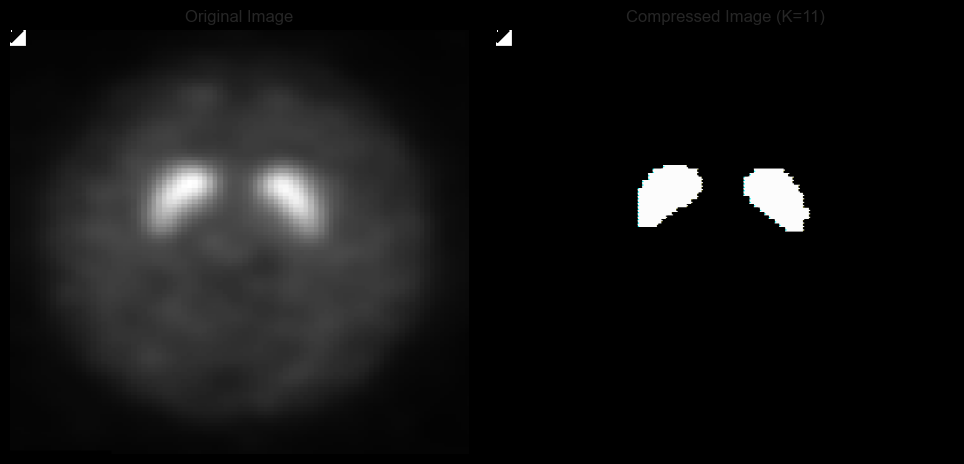

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3804_2012-07-24_12_59_07.0_slice41.png


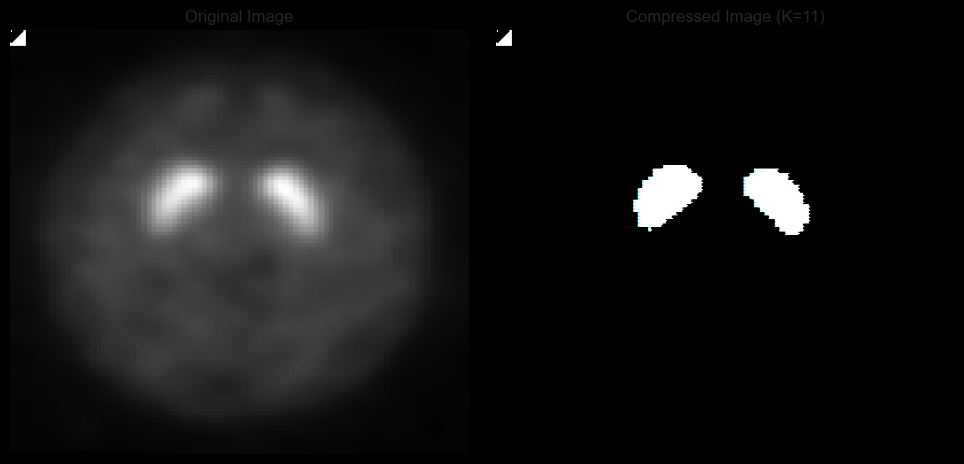

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3803_2012-08-14_13_03_44.0_slice42.png


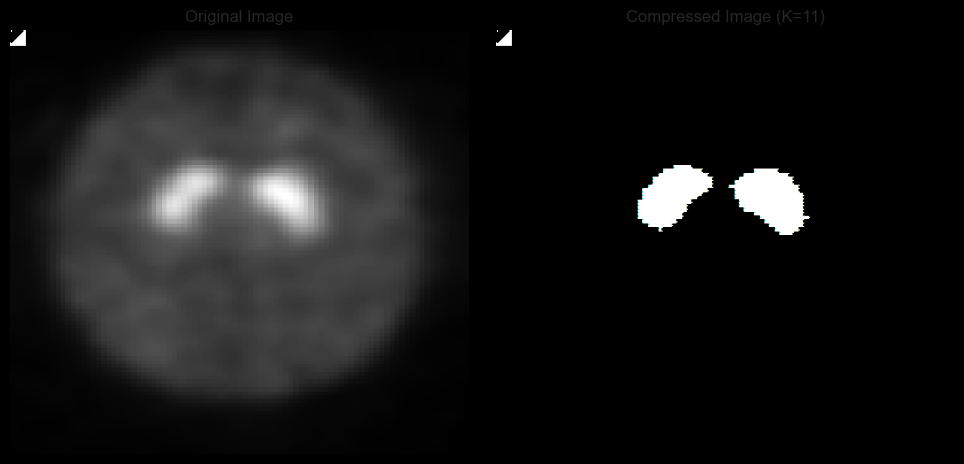

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3767_2012-10-18_13_50_02.0_slice39.png


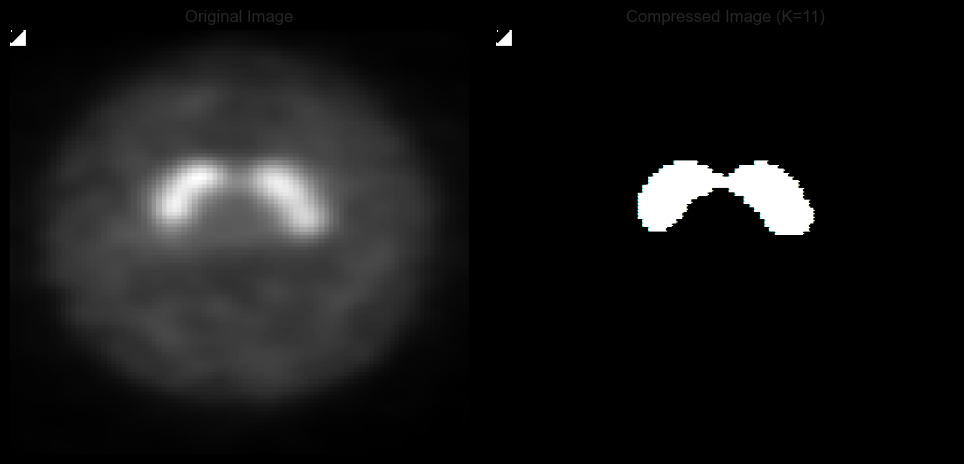

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3759_2012-11-08_14_00_39.0_slice37.png


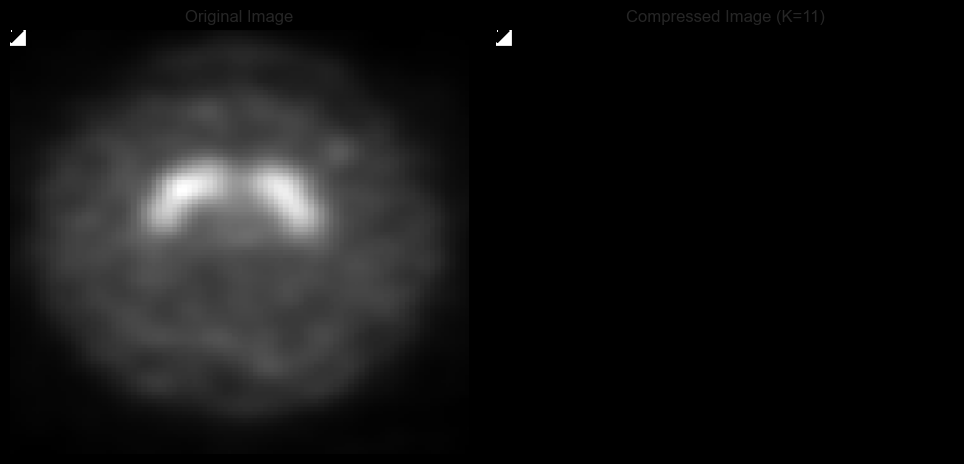

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\HC_2\3554_2012-03-28_13_59_56.0_slice41.png


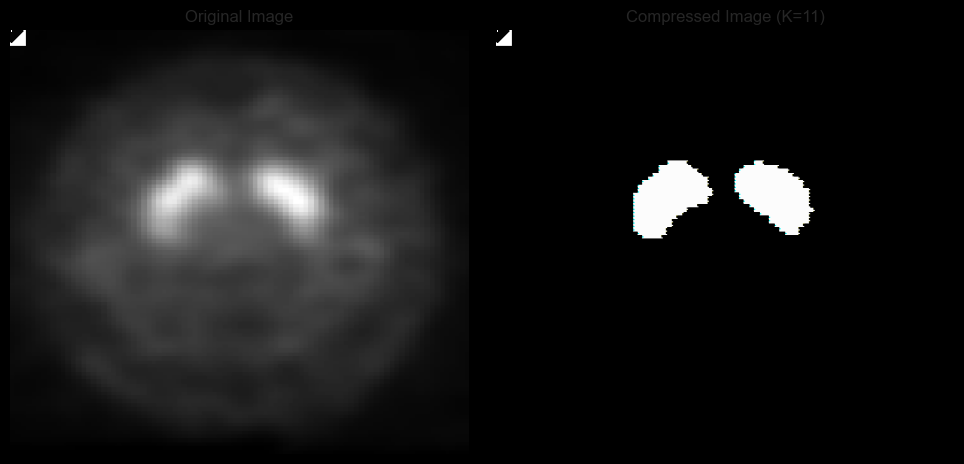

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice40.png


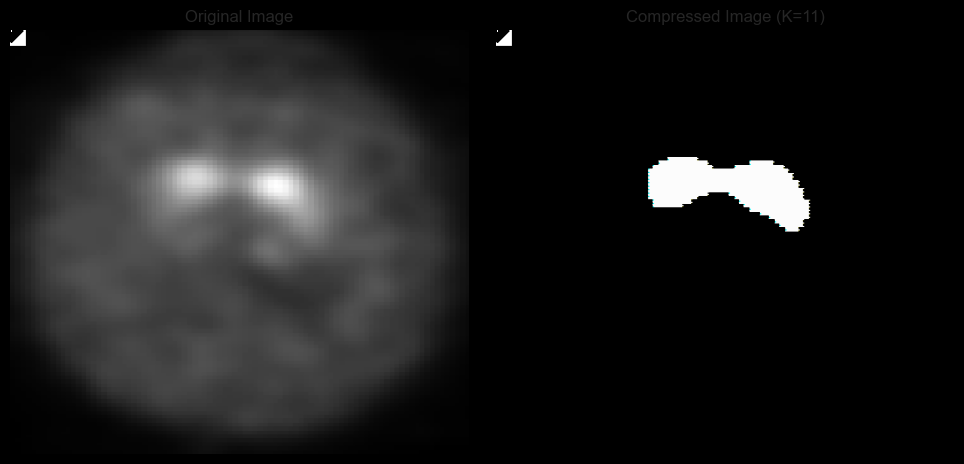

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice43.png


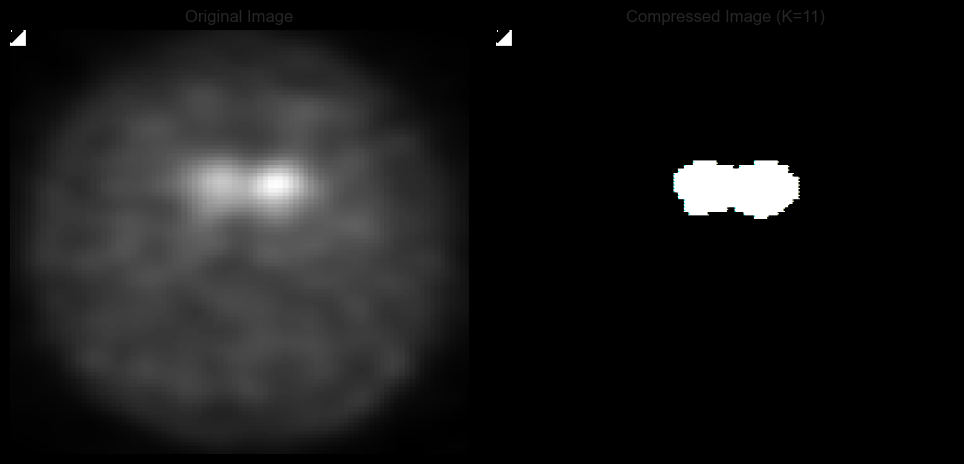

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice37.png


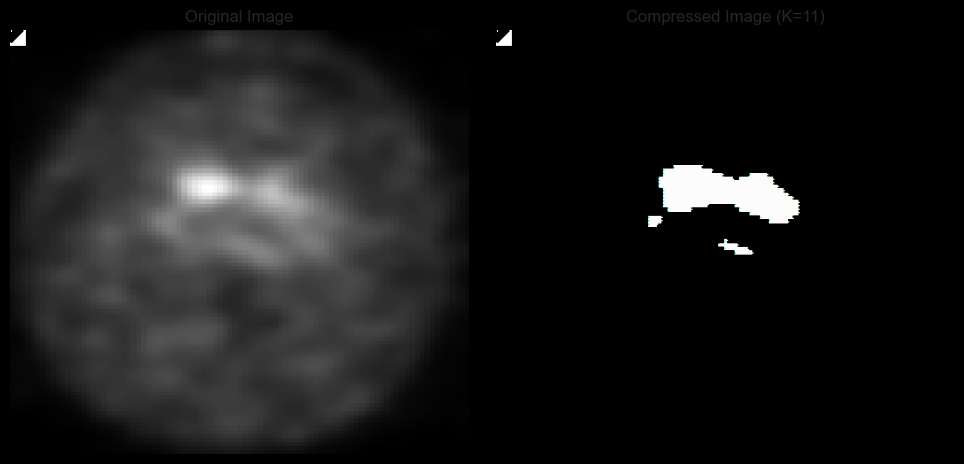

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice38.png


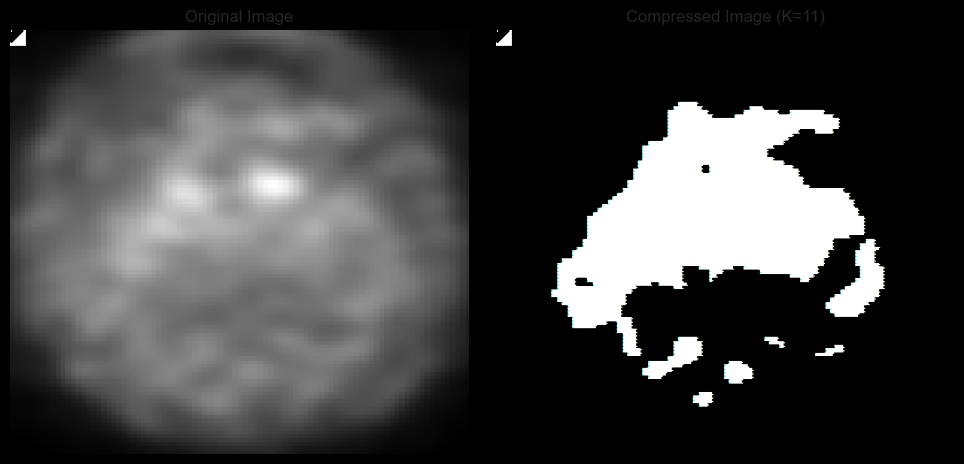

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice42.png


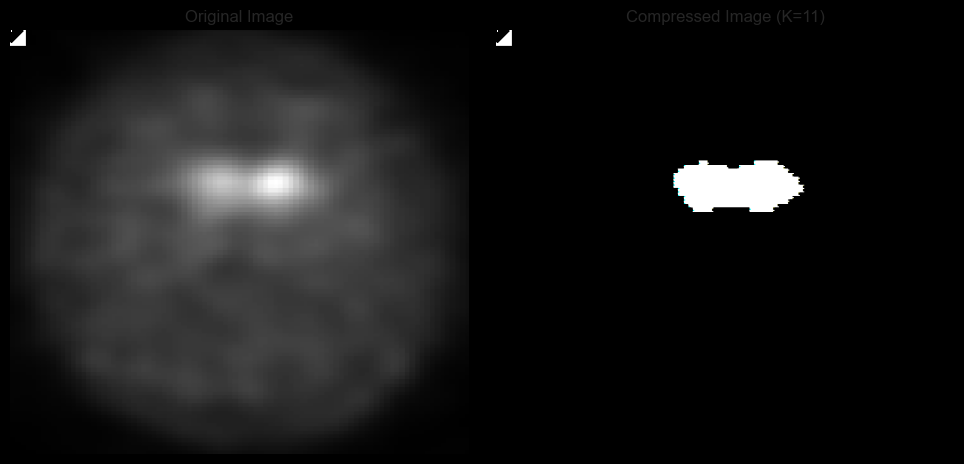

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice39.png


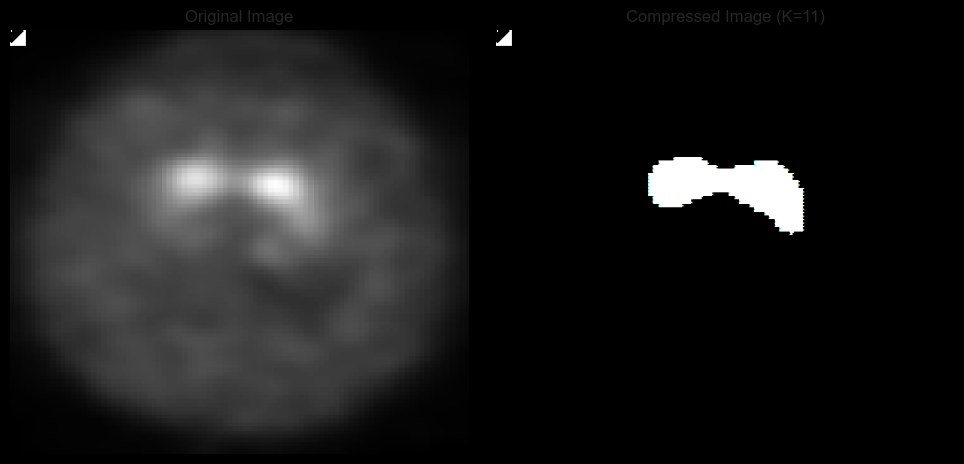

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice39.png


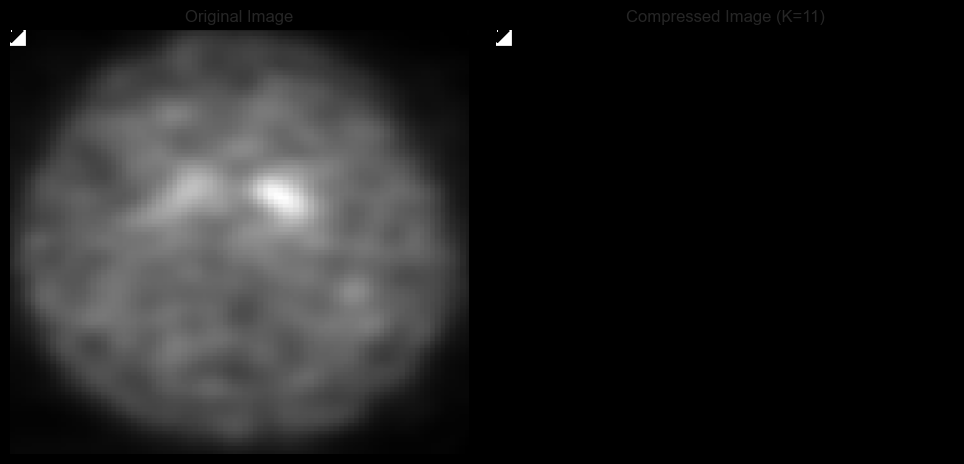

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice38.png


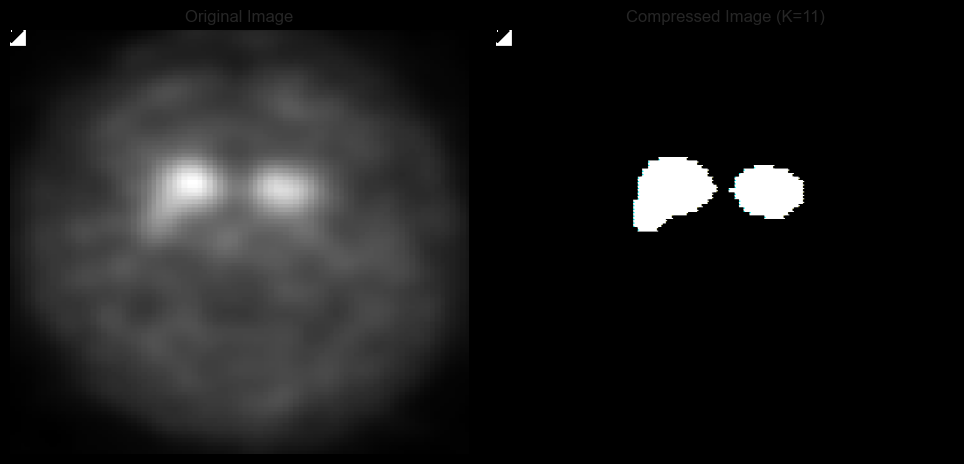

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice41.png


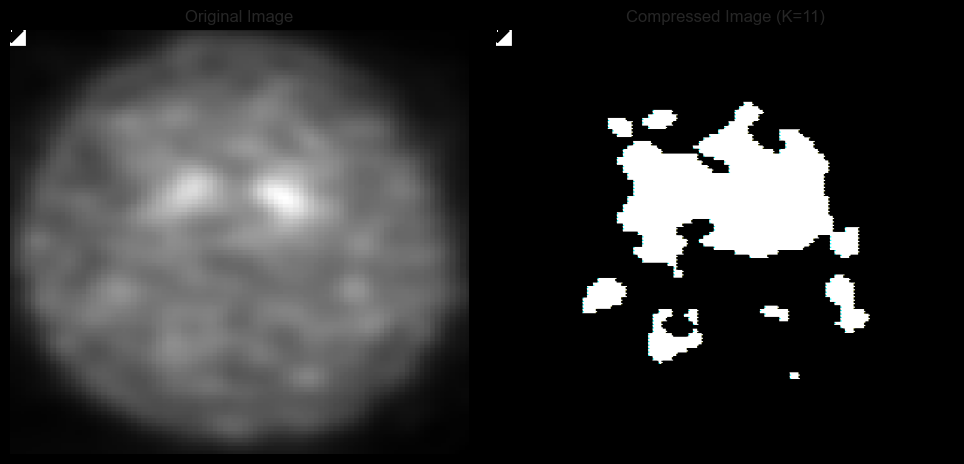

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice39.png


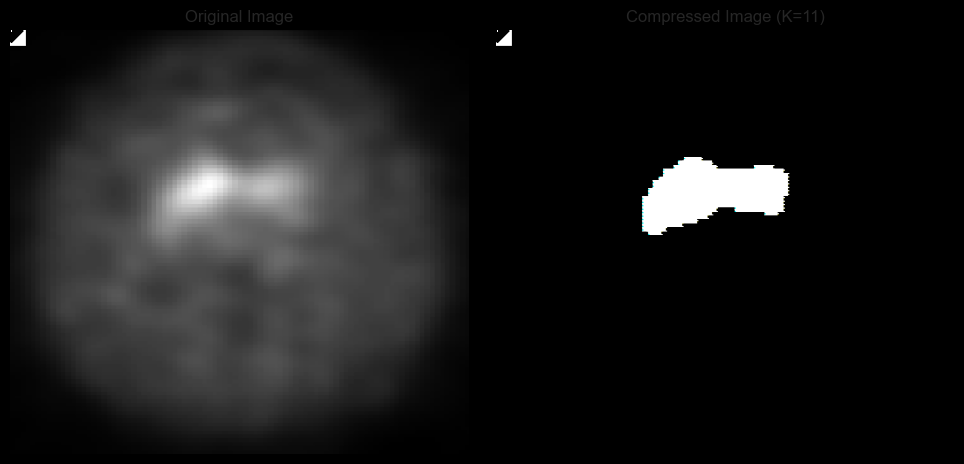

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice44.png


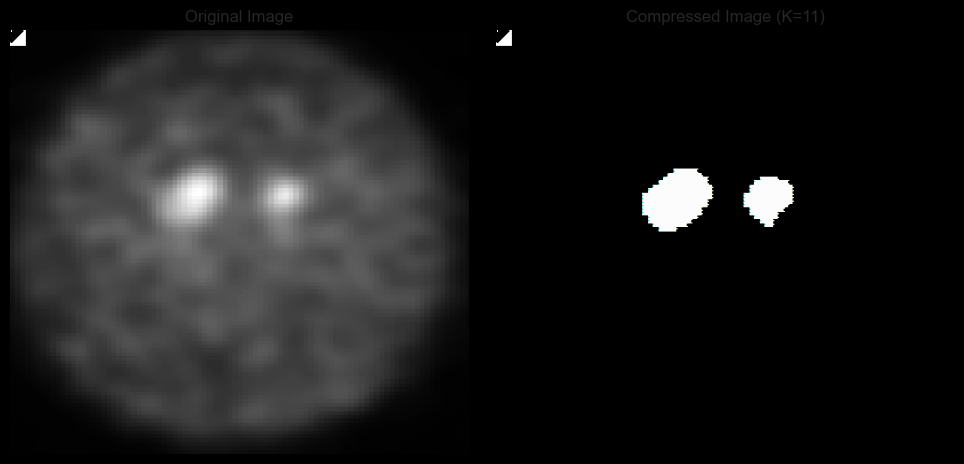

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice40.png


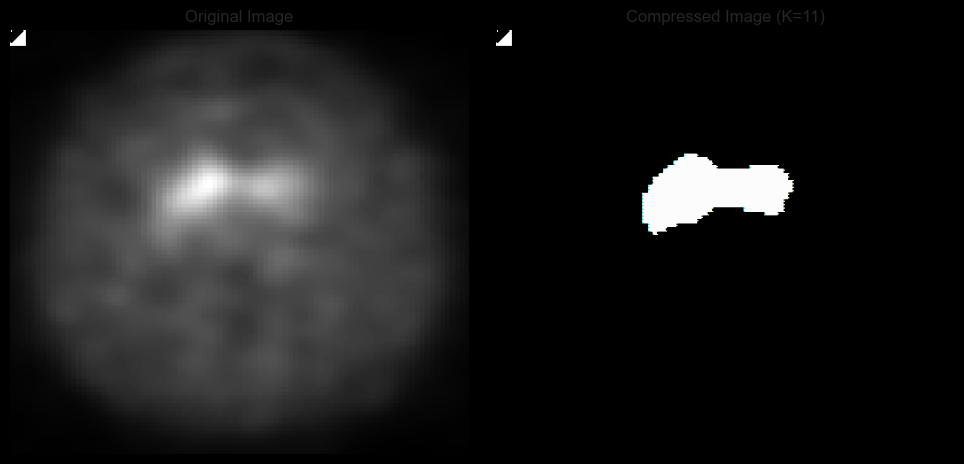

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice38.png


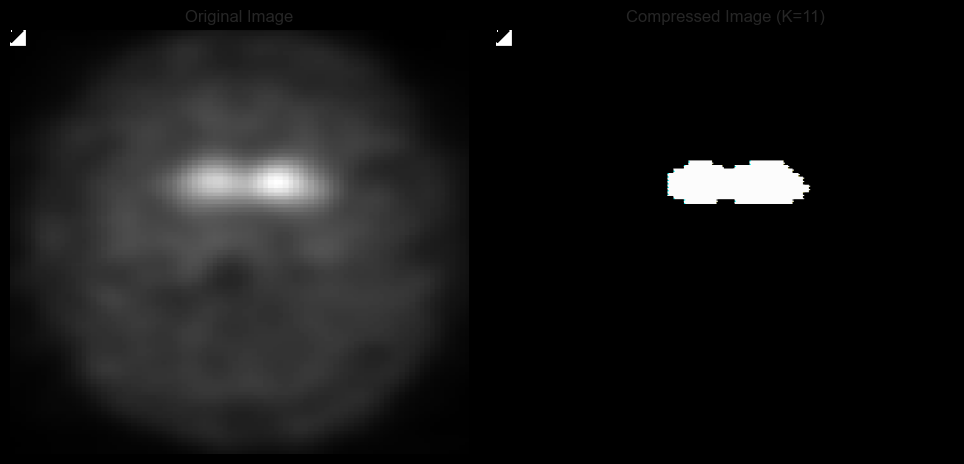

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice38.png


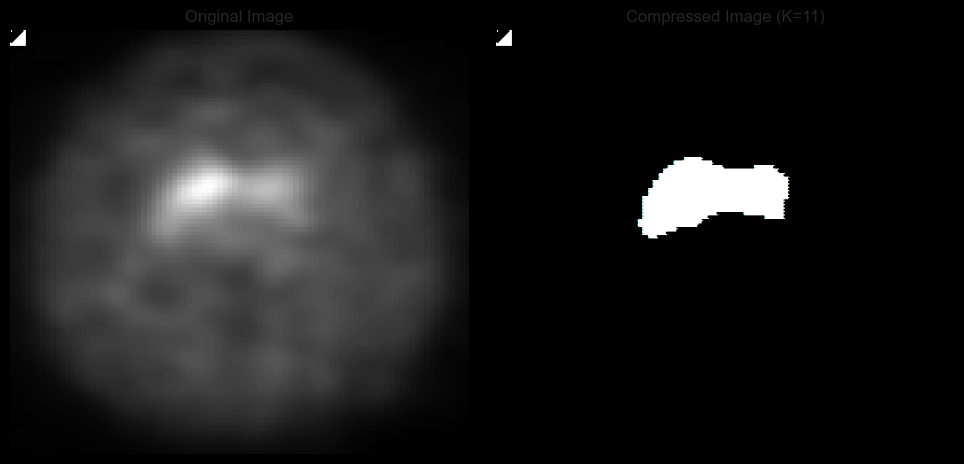

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice41.png


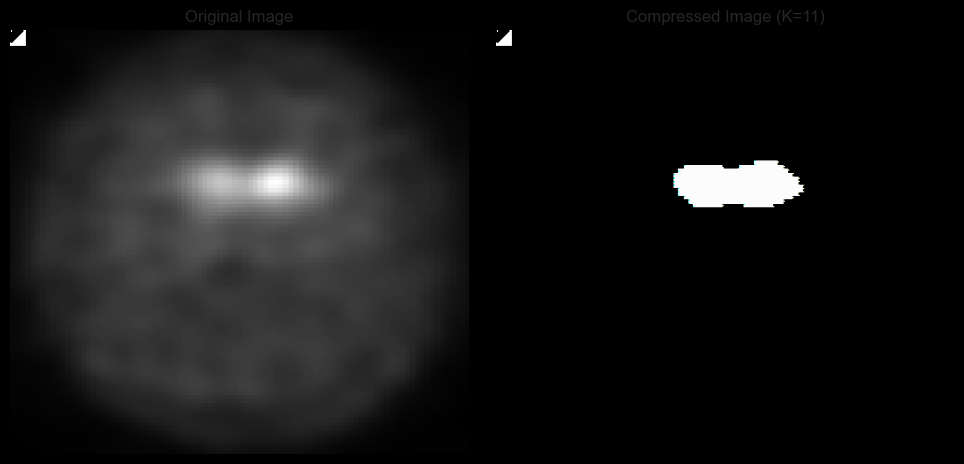

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice38.png


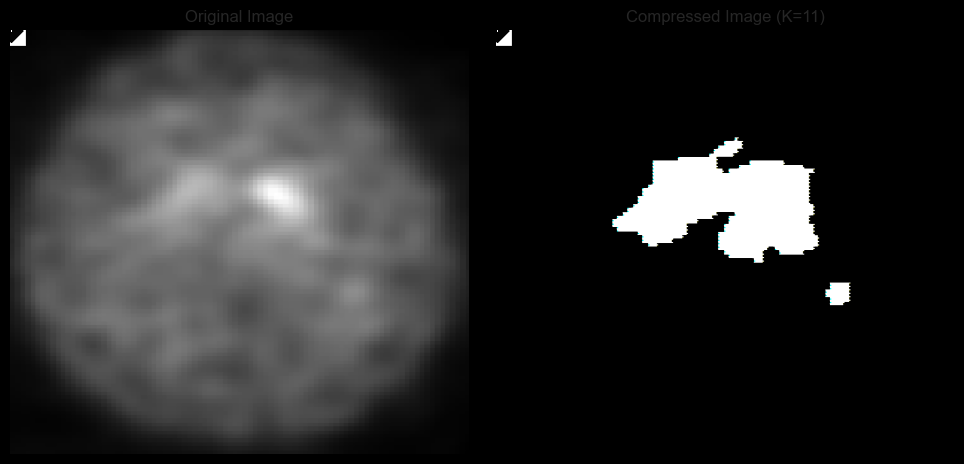

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice44.png


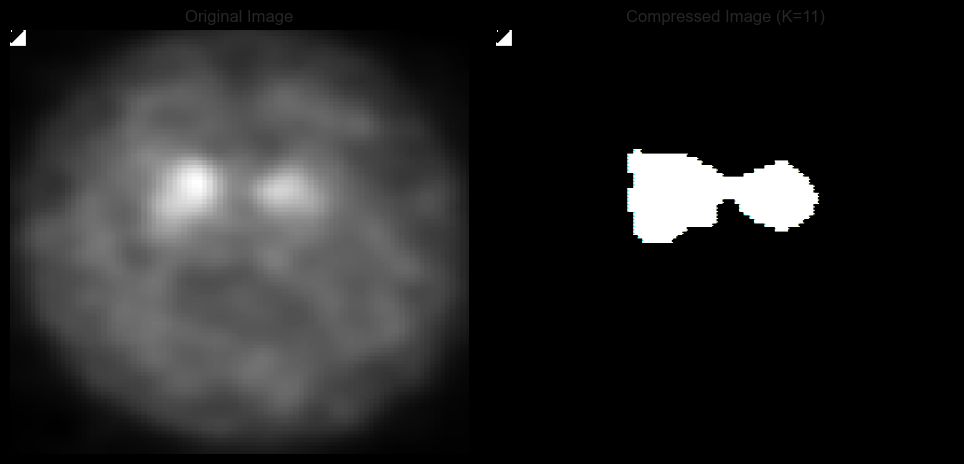

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice37.png


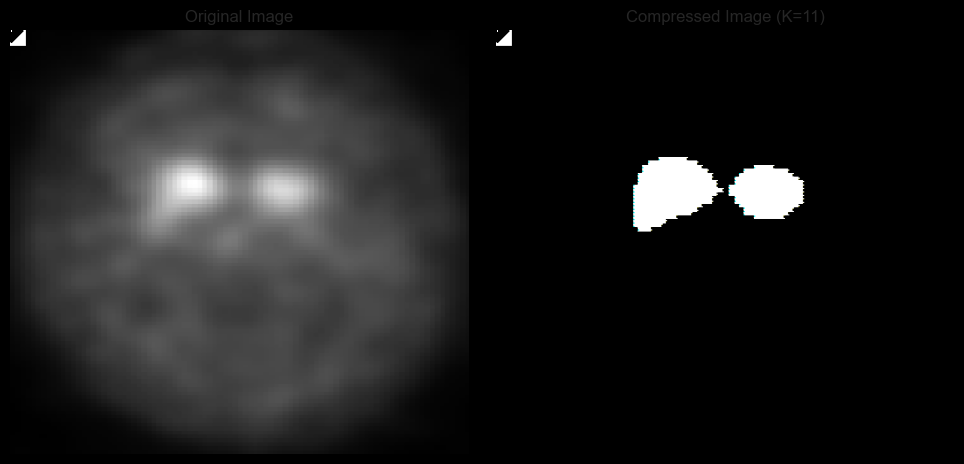

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice41.png


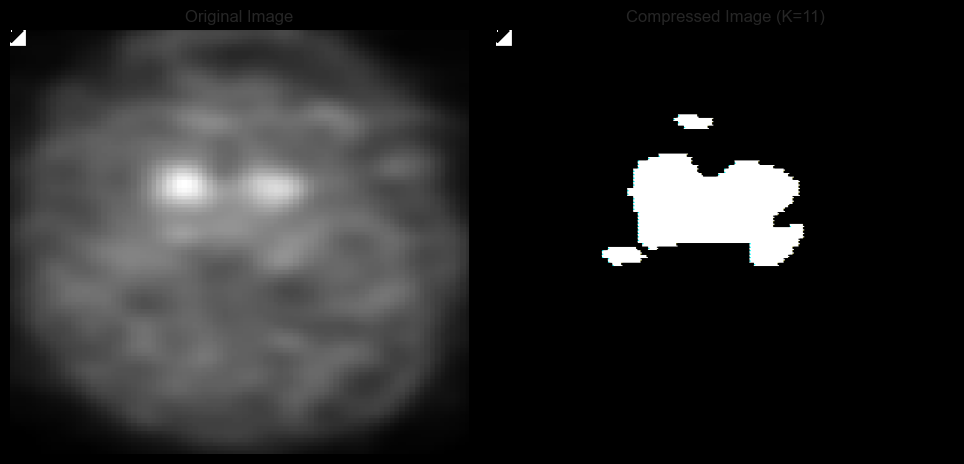

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice40.png


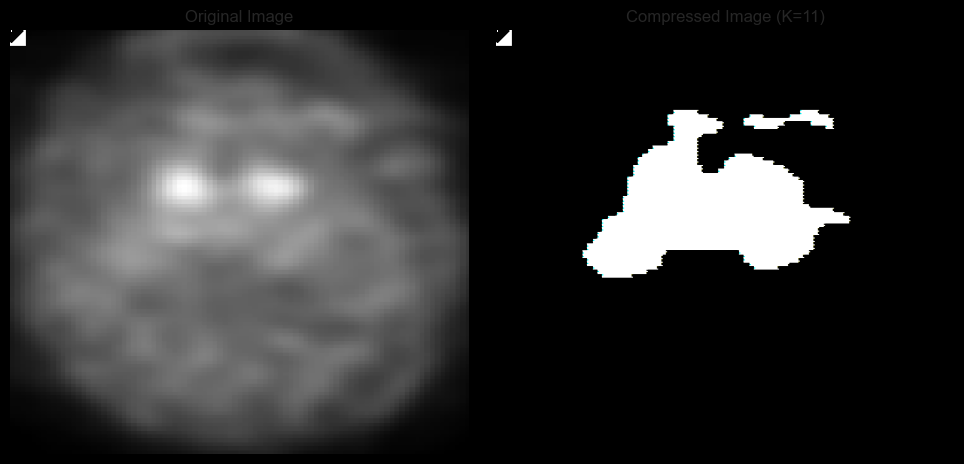

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice40.png


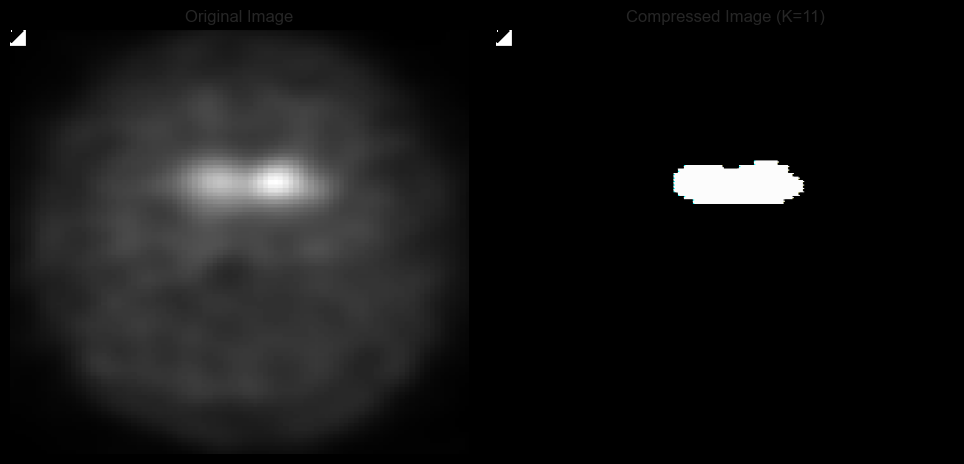

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice43.png


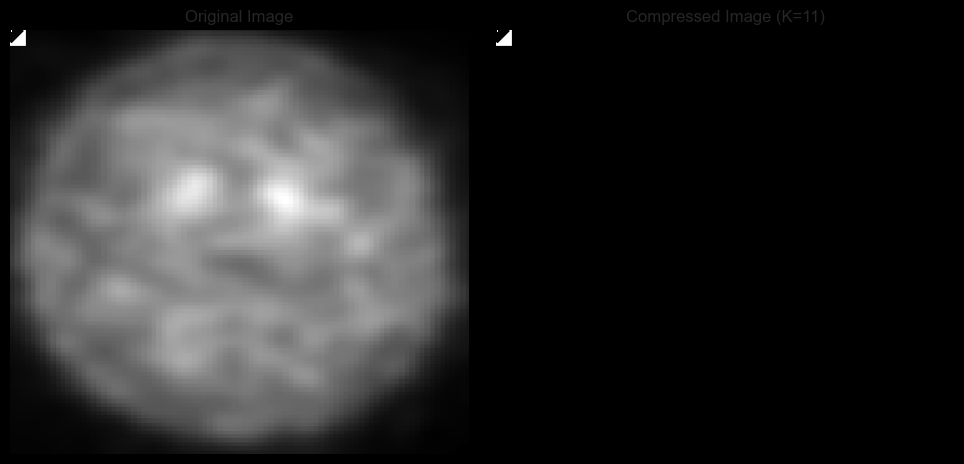

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice37.png


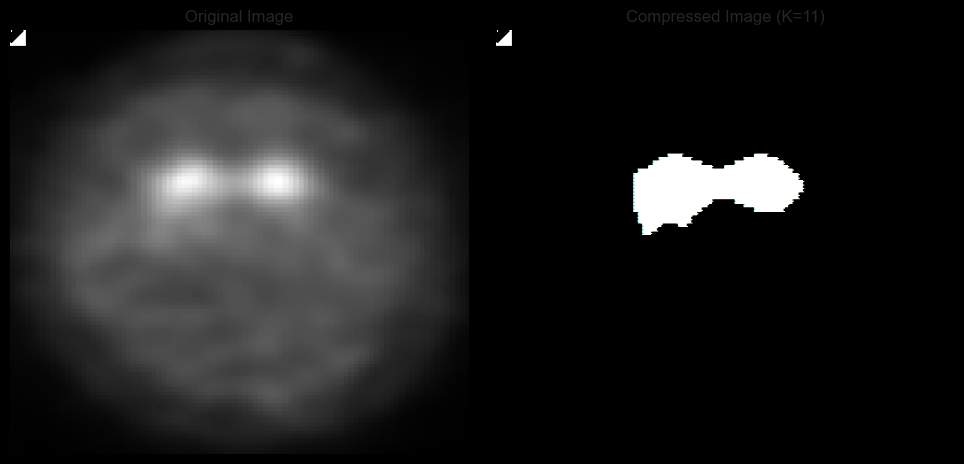

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice42.png


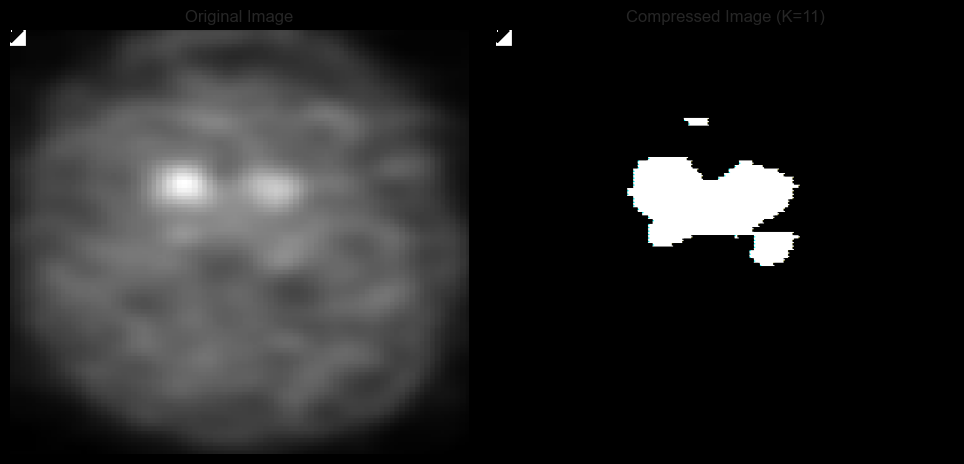

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice43.png


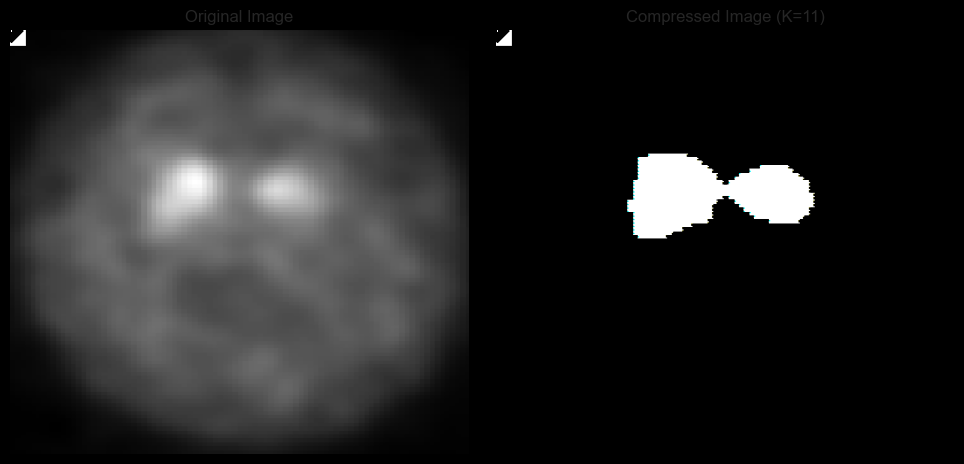

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice44.png


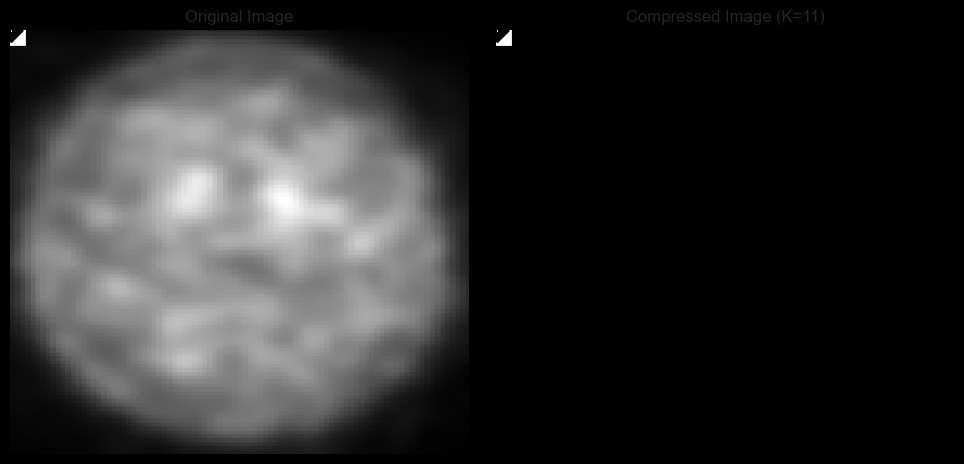

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice41.png


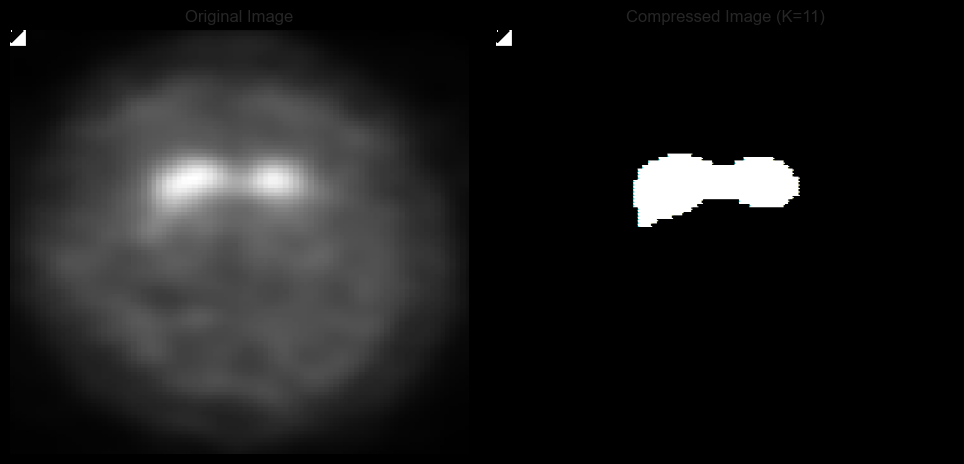

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice39.png


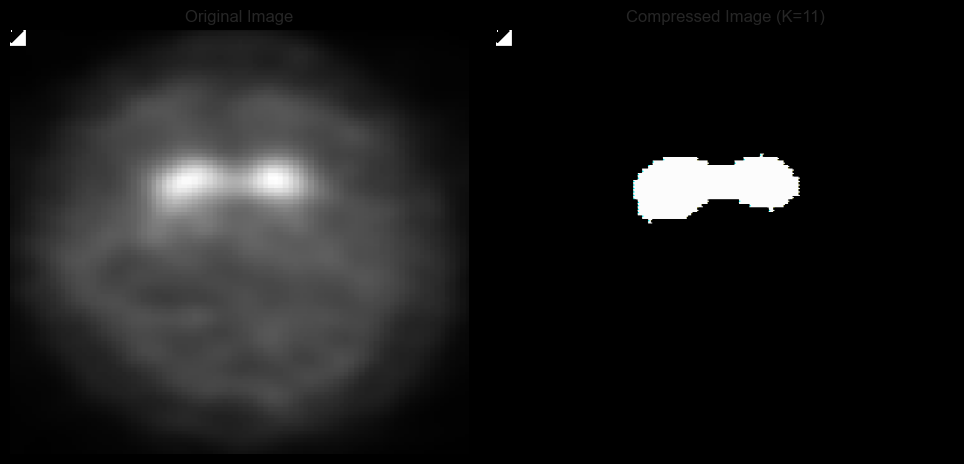

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice41.png


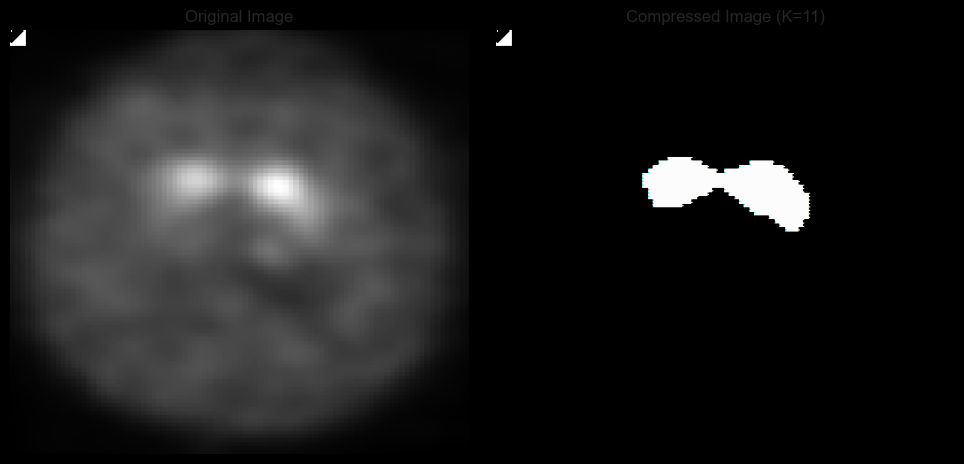

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice39.png


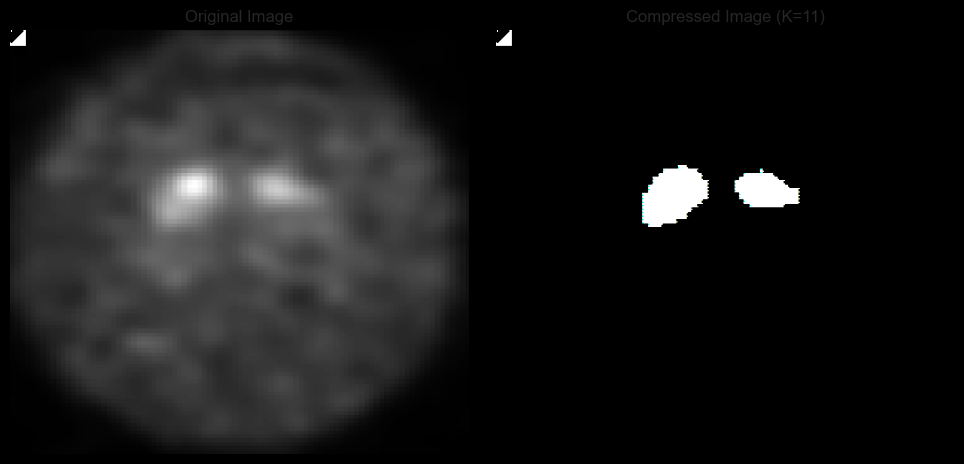

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice37.png


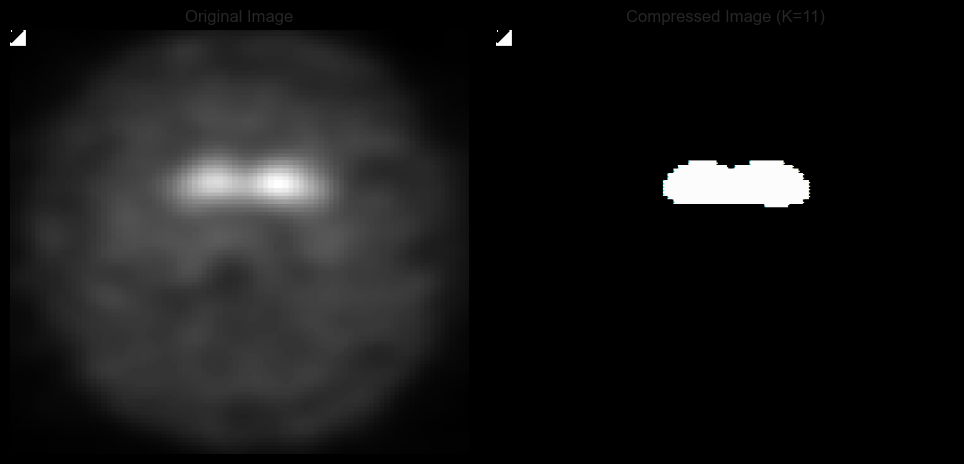

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice43.png


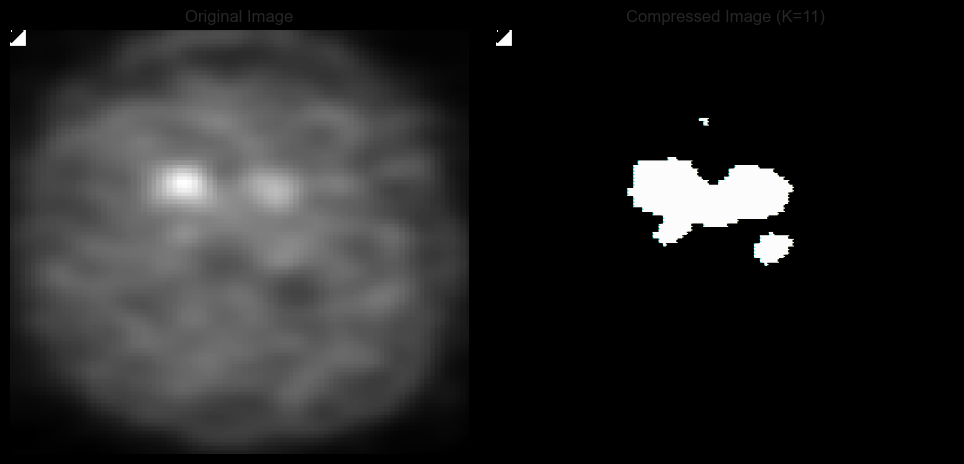

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice39.png


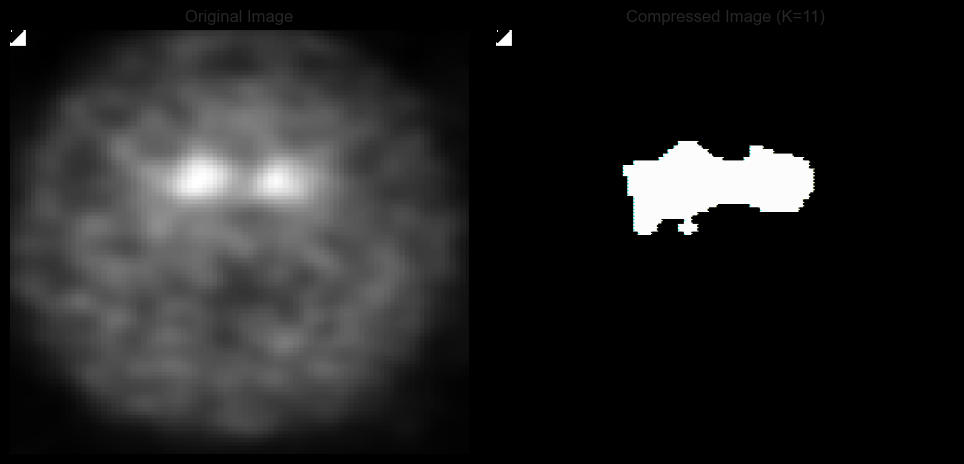

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice39.png


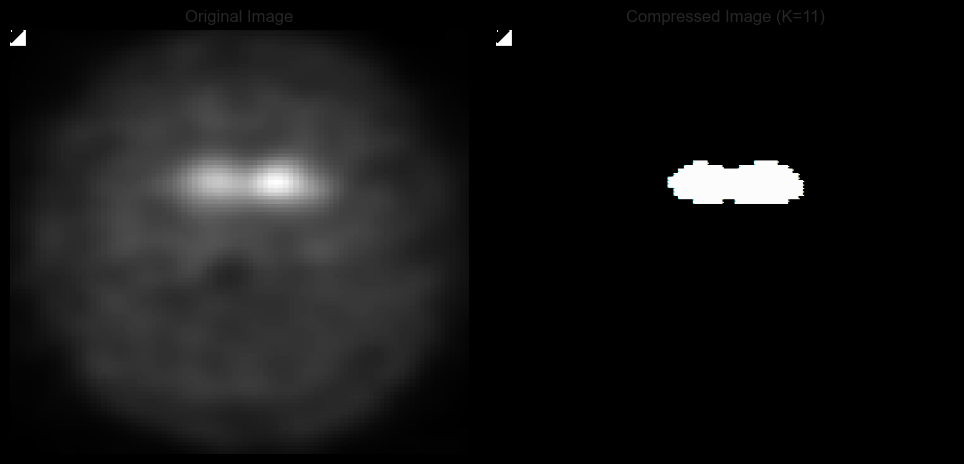

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice40.png


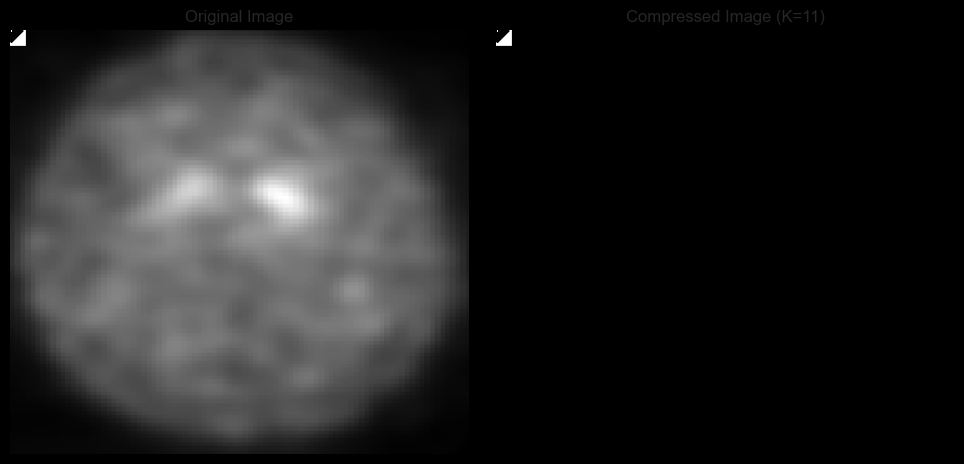

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice42.png


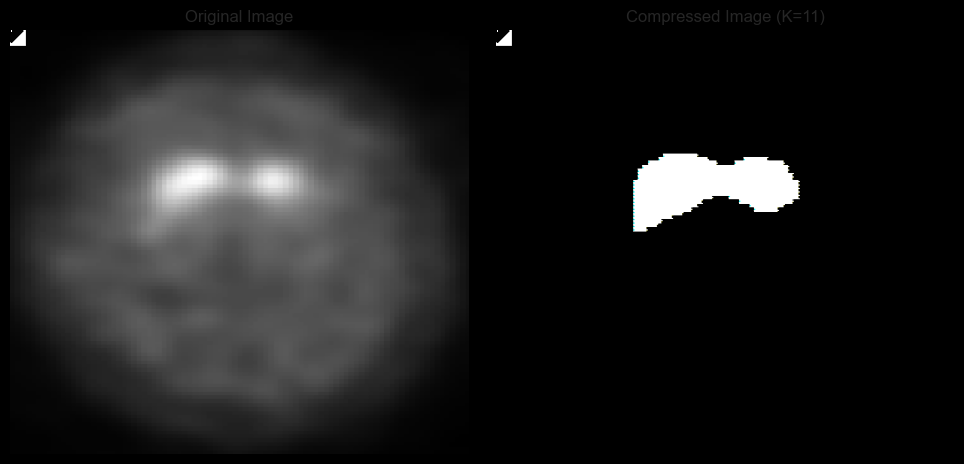

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice42.png


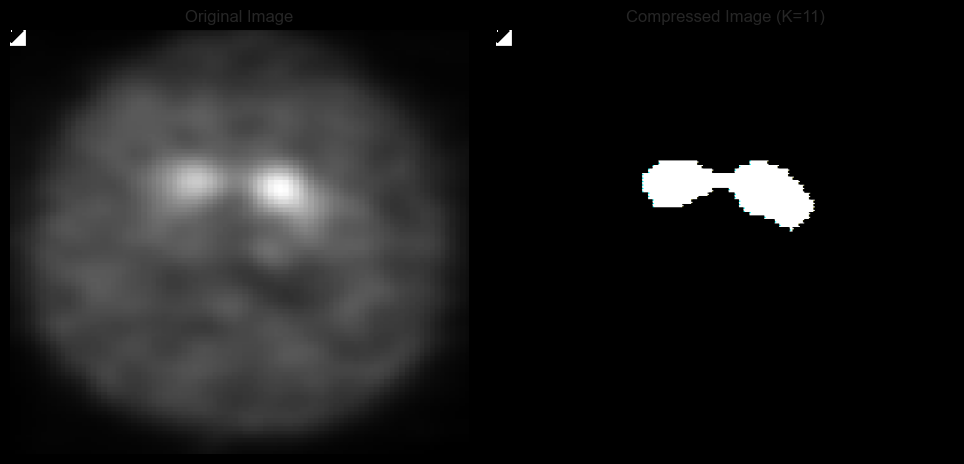

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice43.png


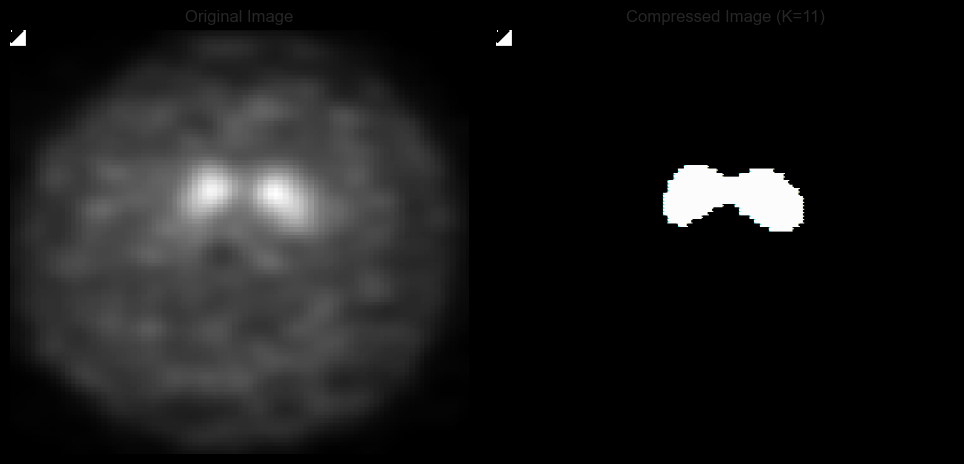

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice40.png


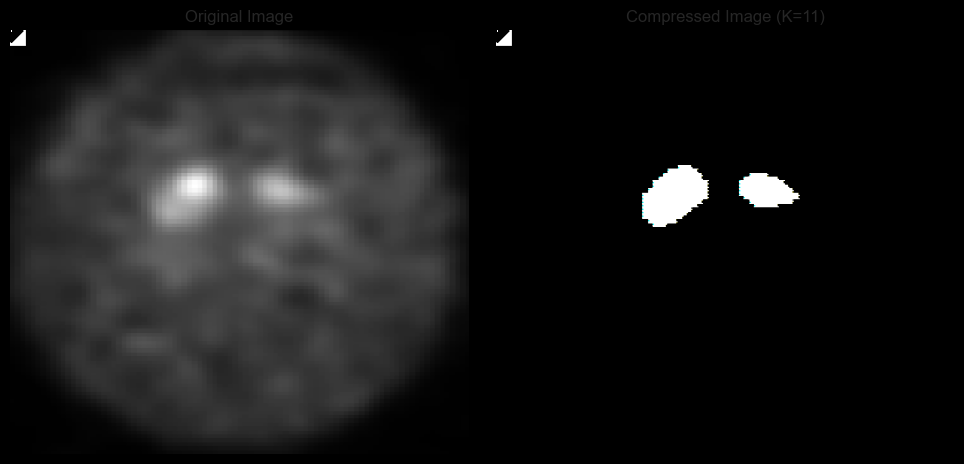

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice39.png


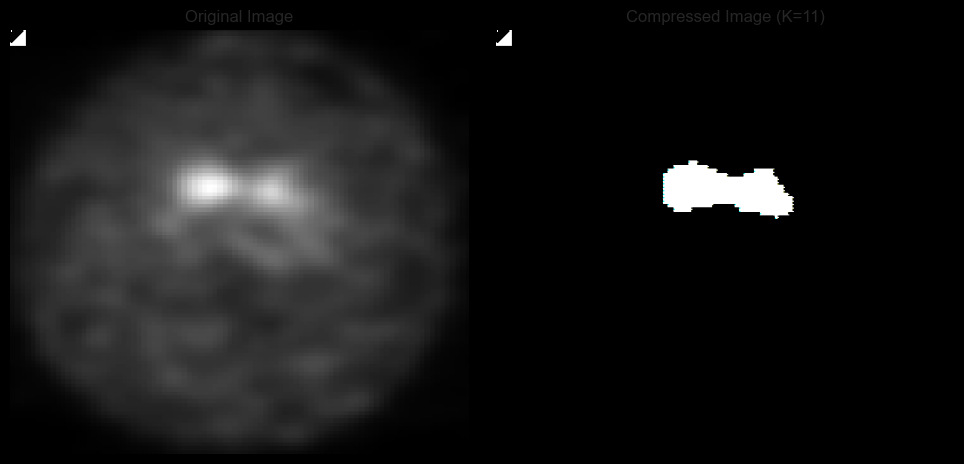

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice43.png


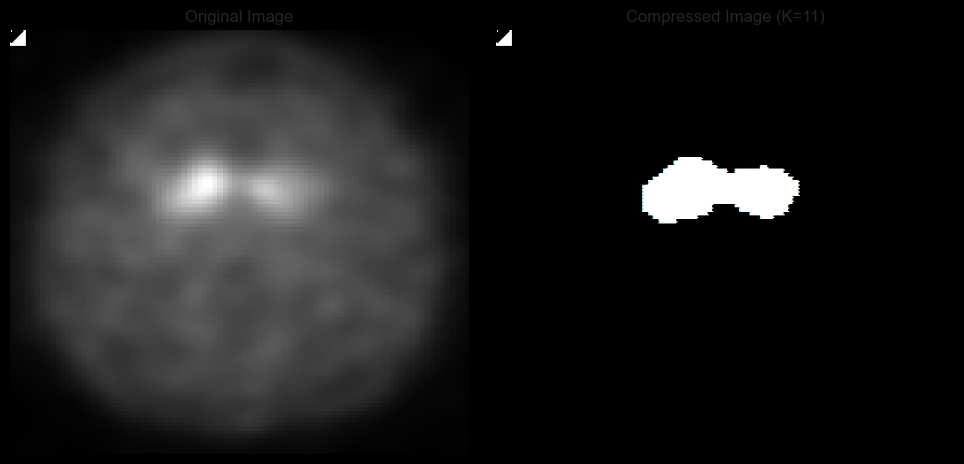

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice43.png


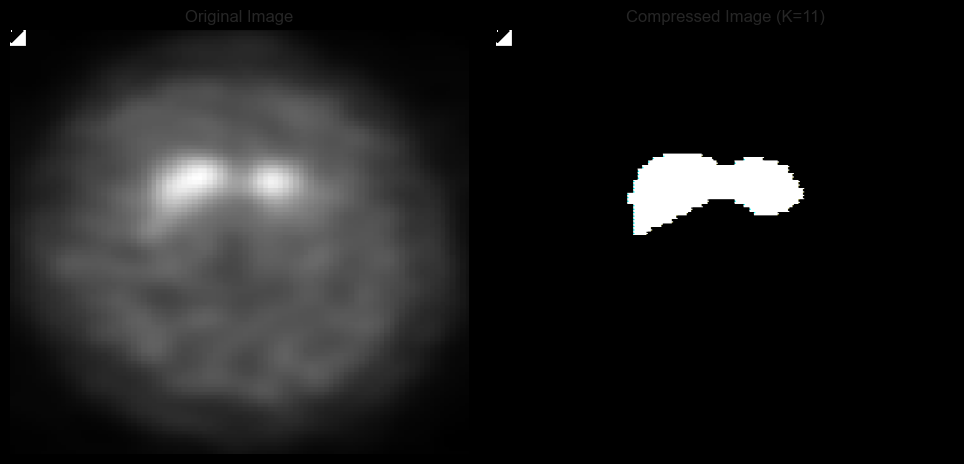

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice43.png


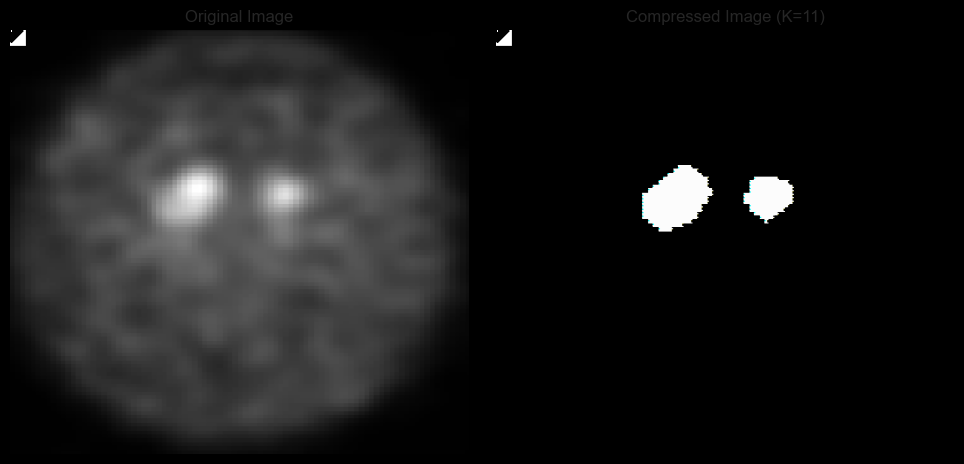

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice40.png


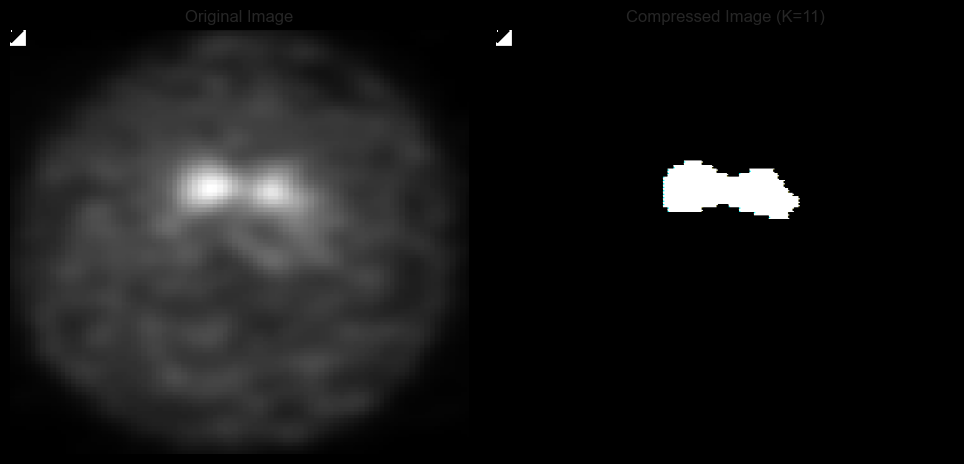

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice41.png


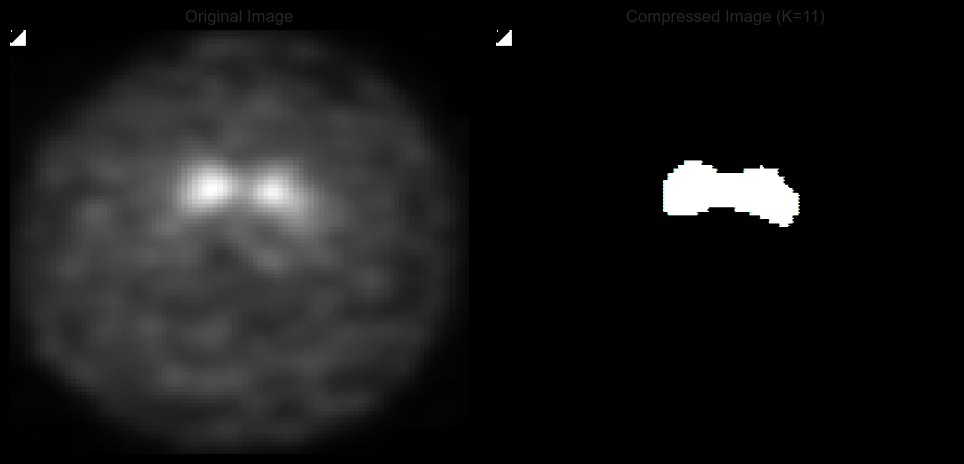

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice42.png


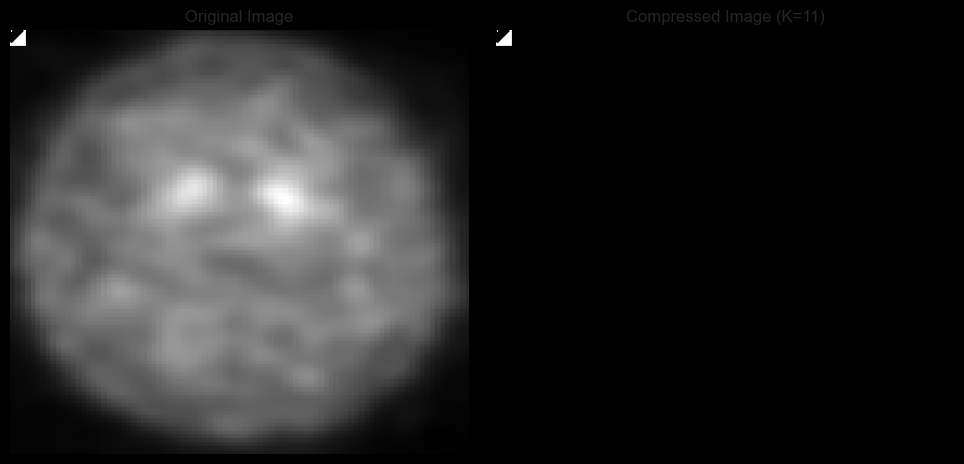

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice44.png


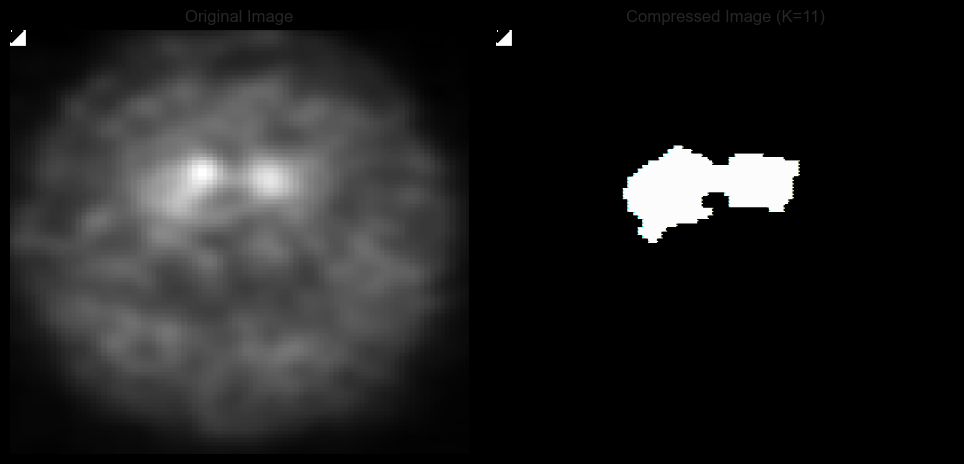

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice37.png


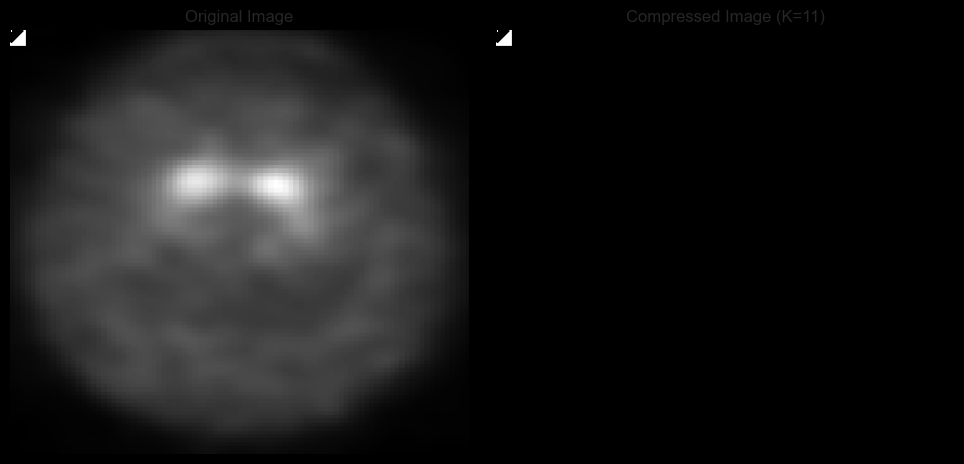

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice38.png


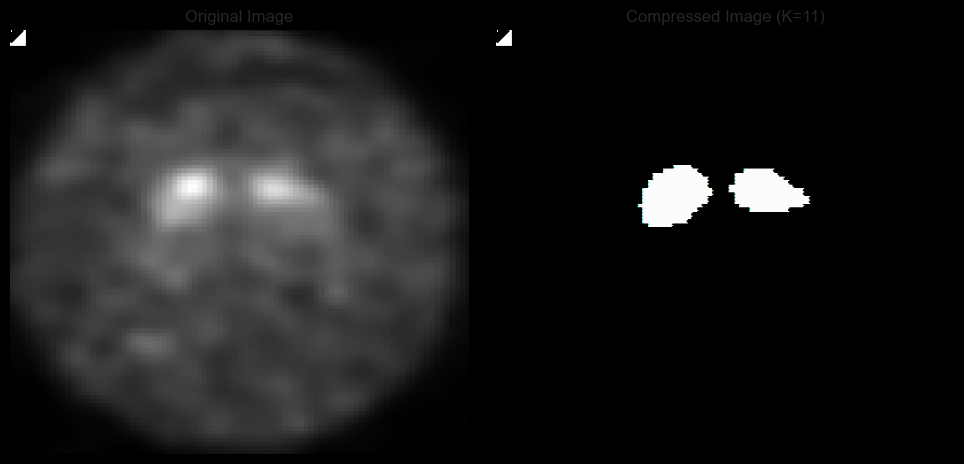

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice42.png


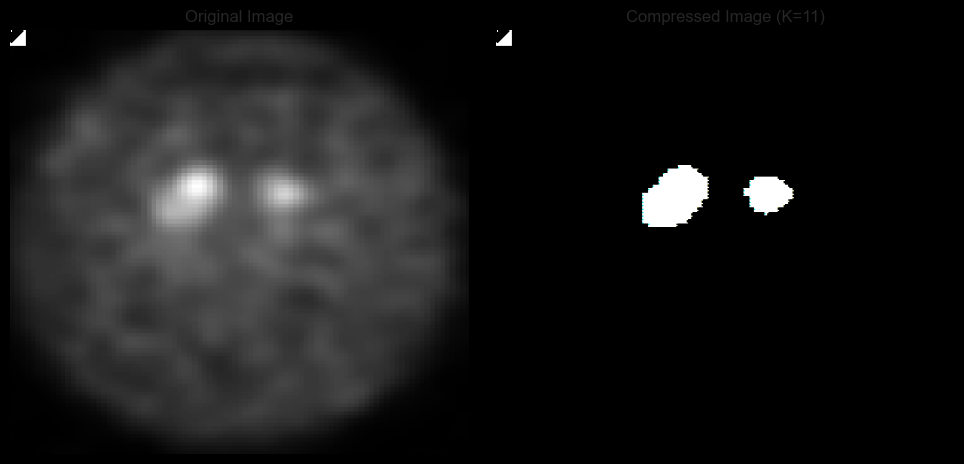

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice43.png


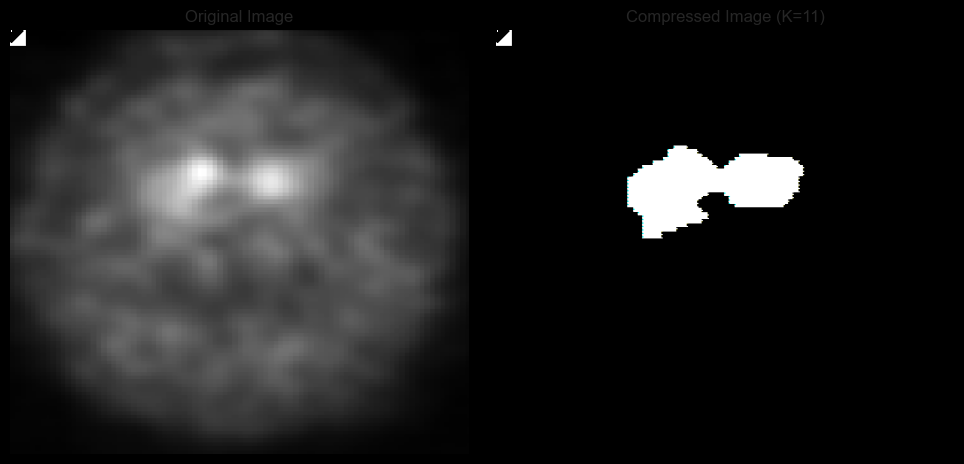

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice42.png


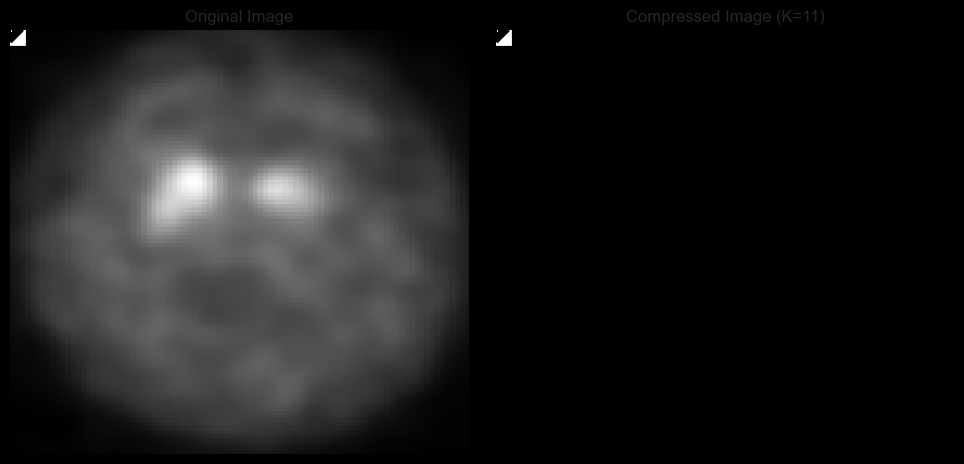

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice41.png


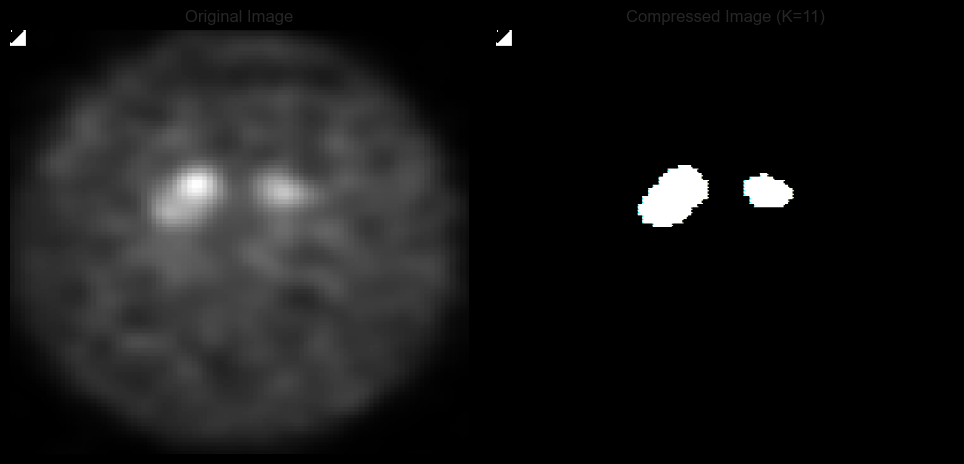

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice40.png


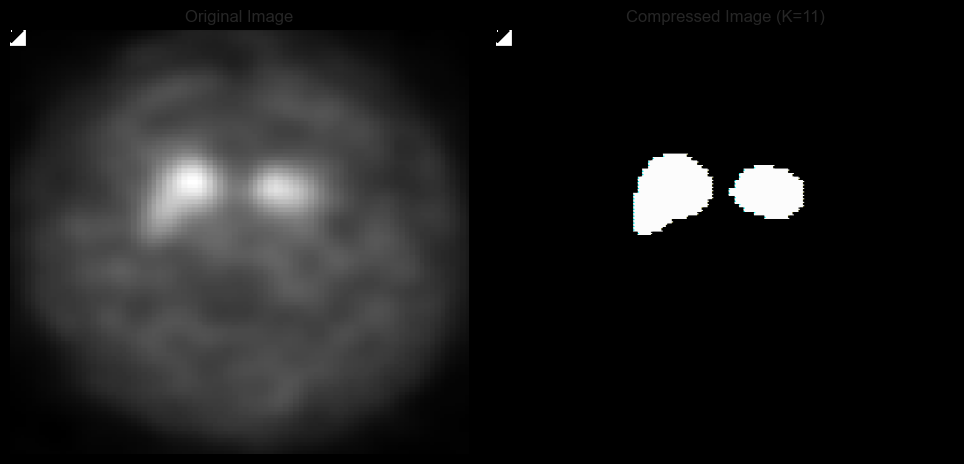

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice39.png


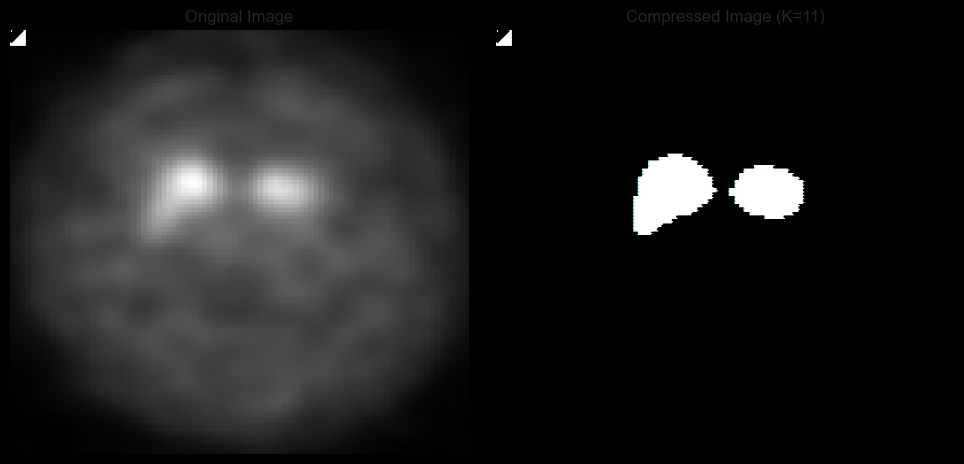

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice37.png


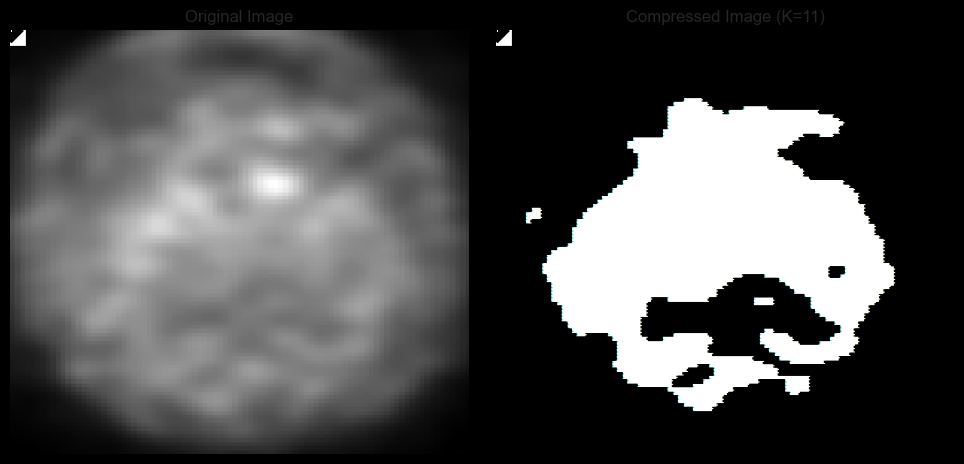

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice44.png


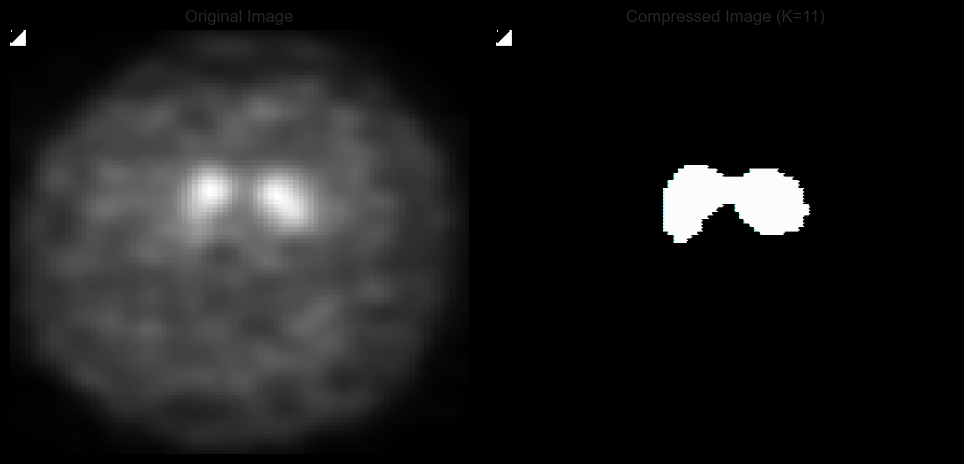

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice37.png


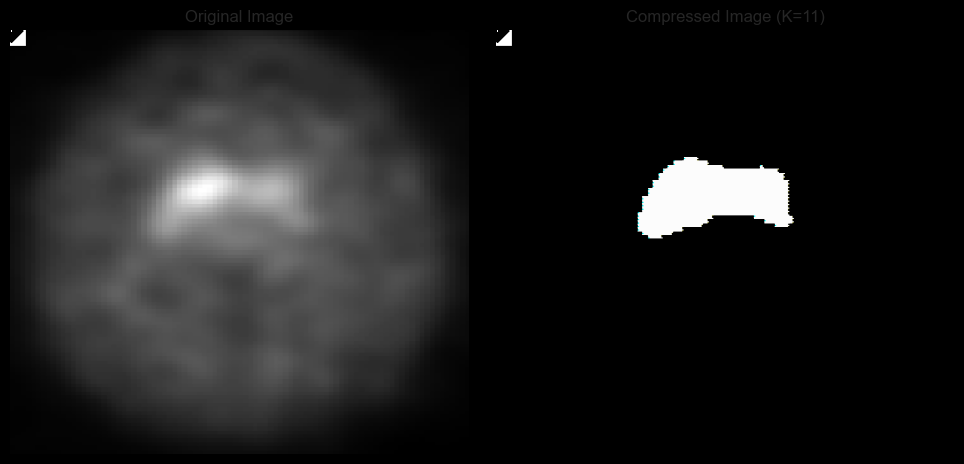

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice40.png


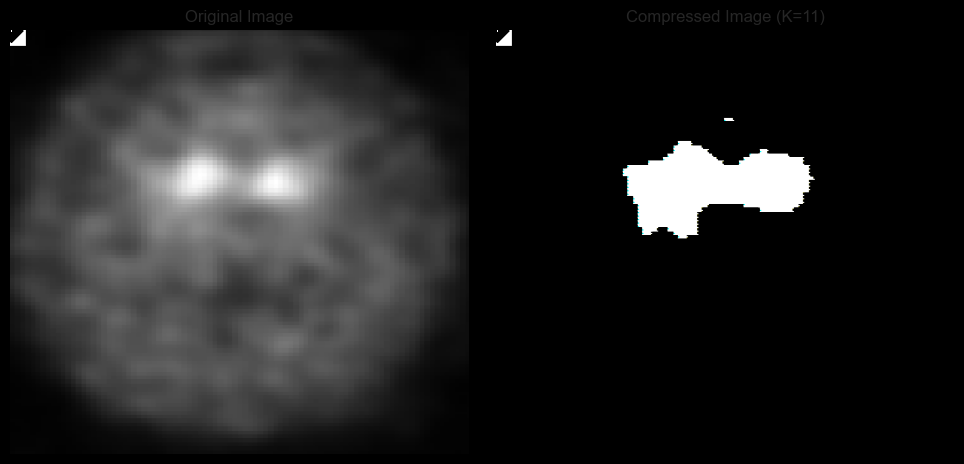

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice37.png


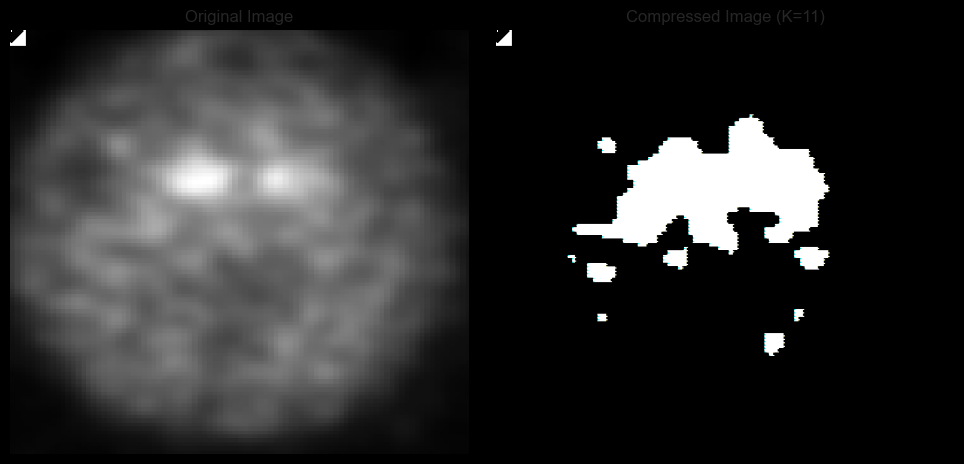

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice42.png


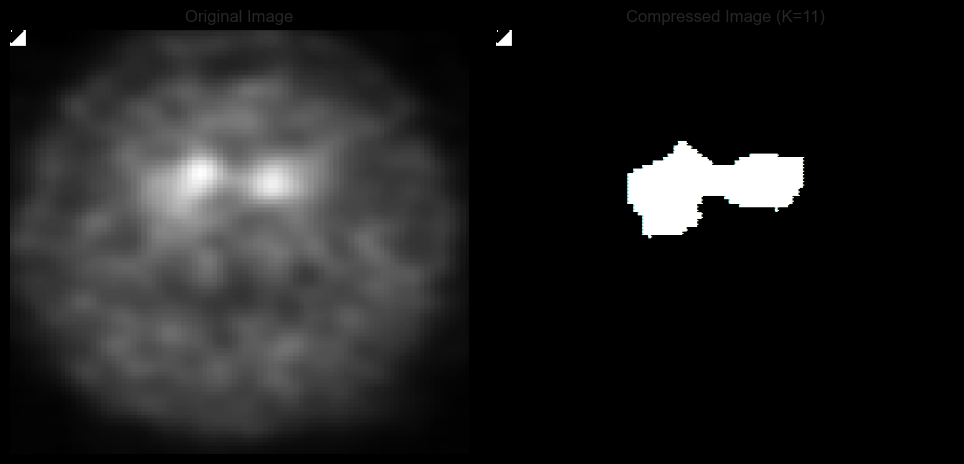

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice39.png


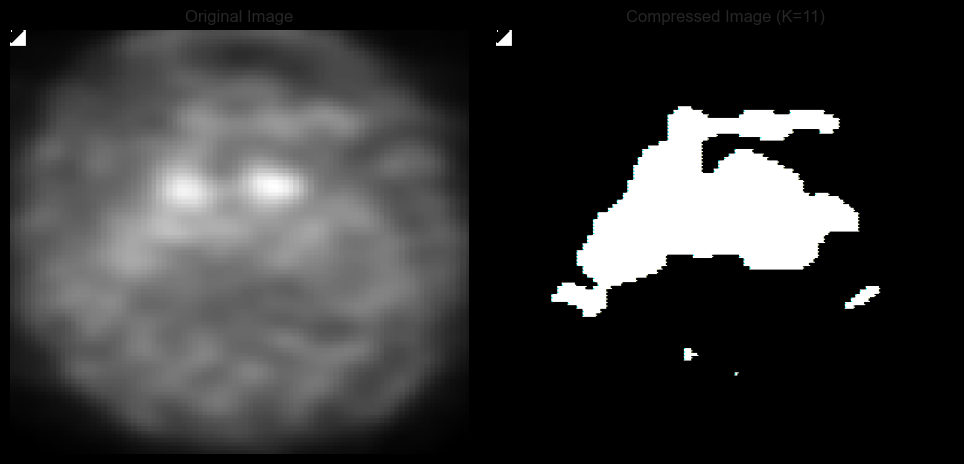

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice42.png


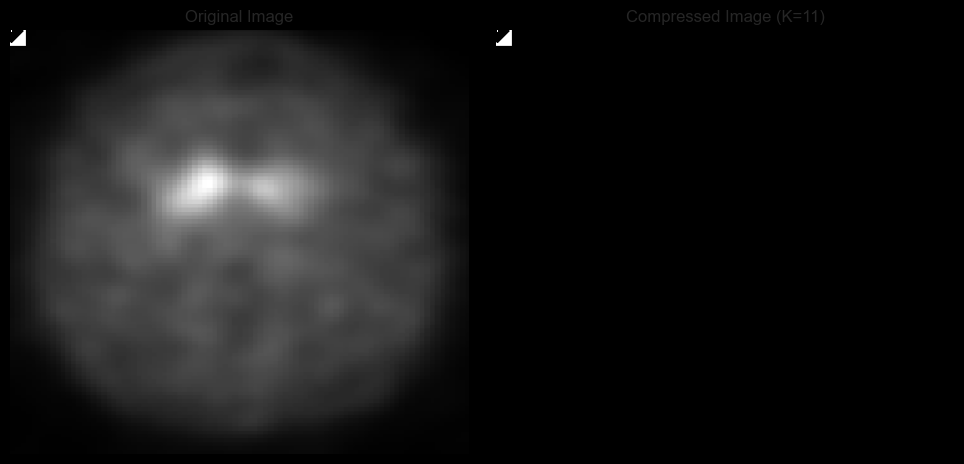

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice42.png


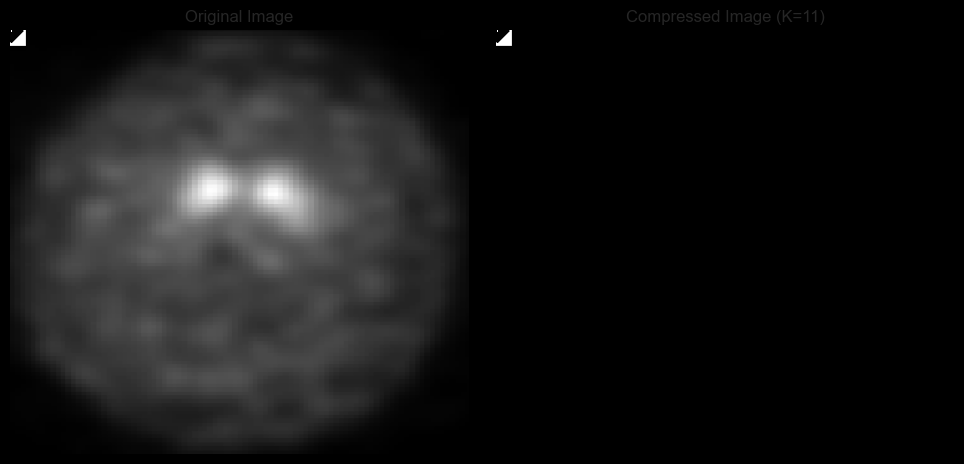

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101175_2022-05-11_14_21_07.0_slice37.png


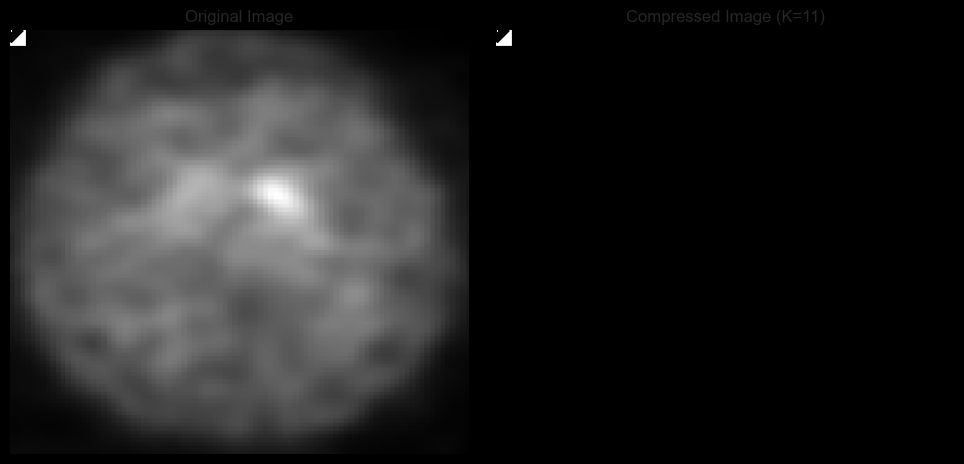

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice44.png


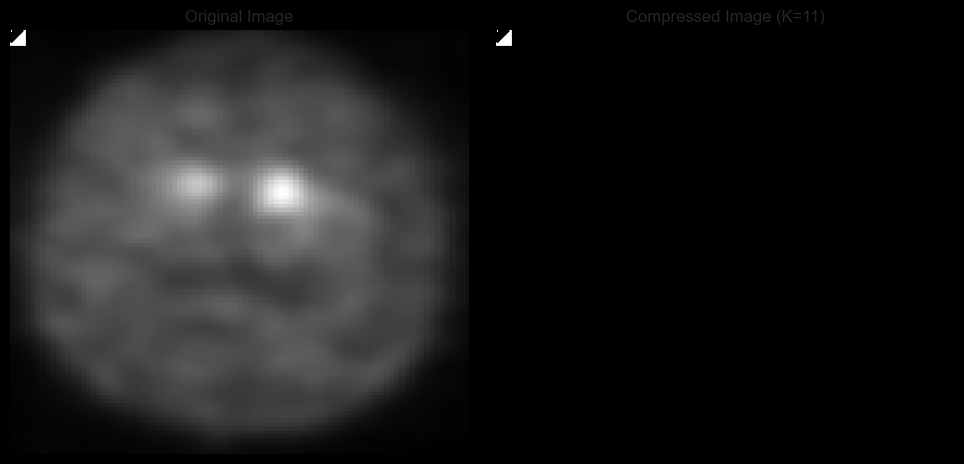

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101476_2022-06-23_12_34_18.0_slice37.png


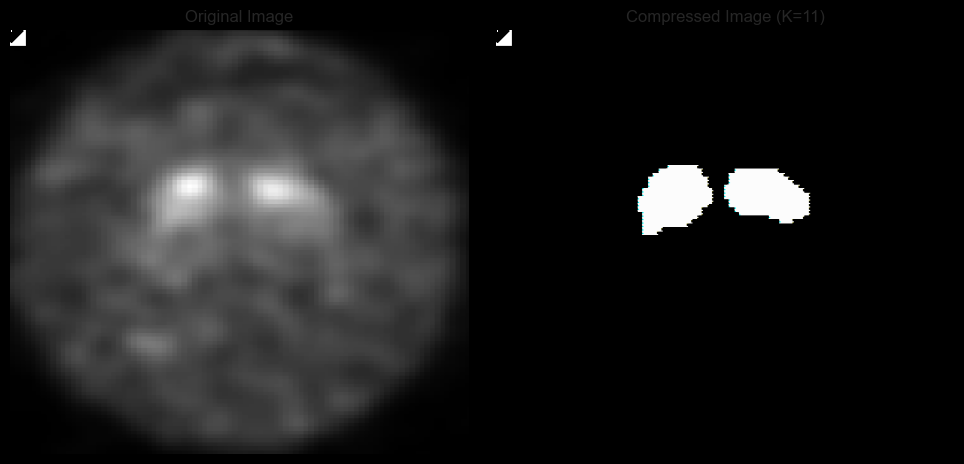

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101492_2022-05-31_14_56_18.0_slice41.png


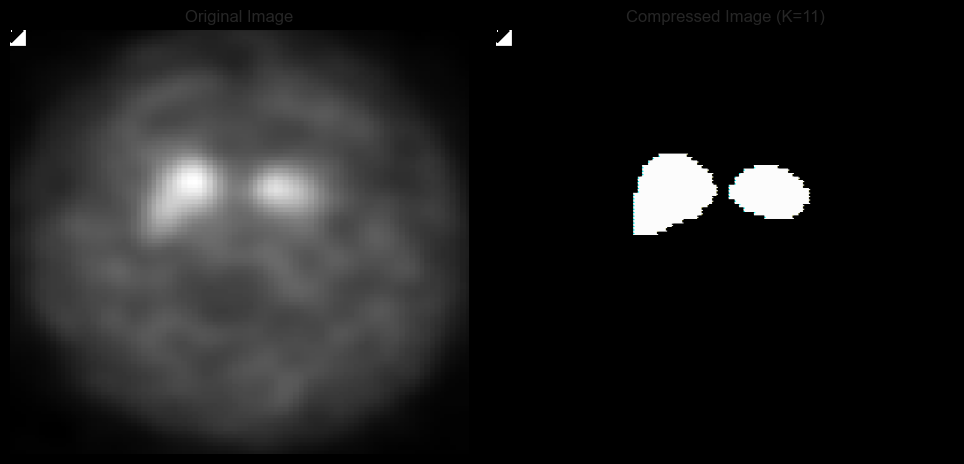

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice41.png


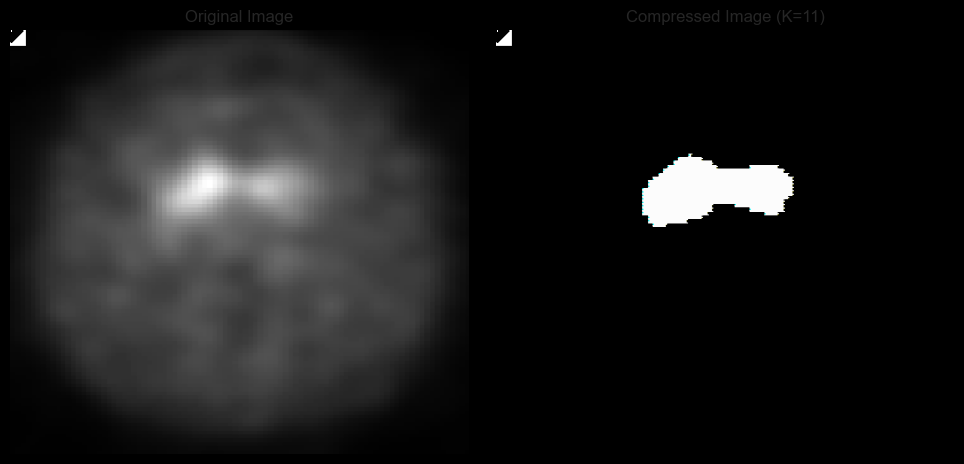

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101174_2022-05-03_12_40_21.0_slice38.png


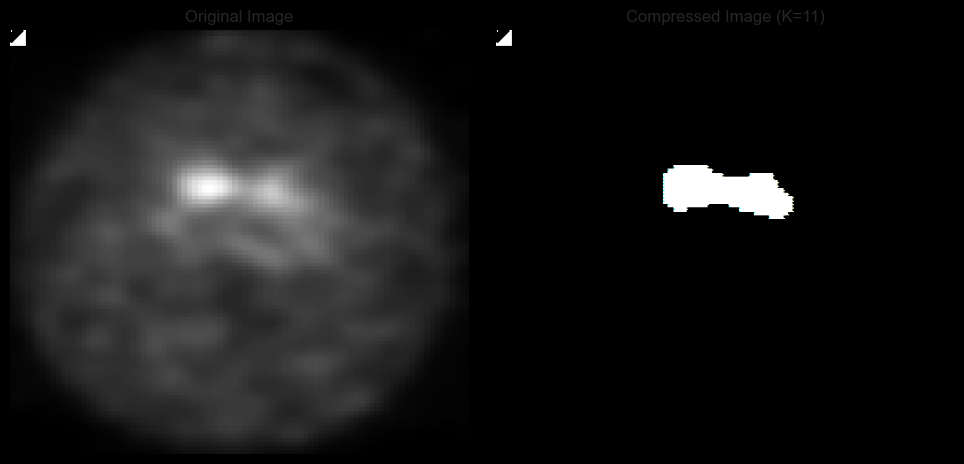

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice44.png


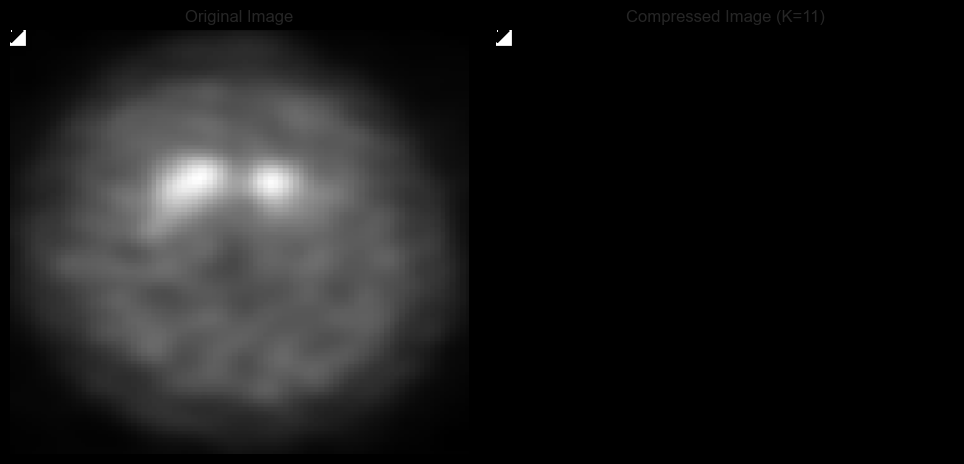

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice38.png


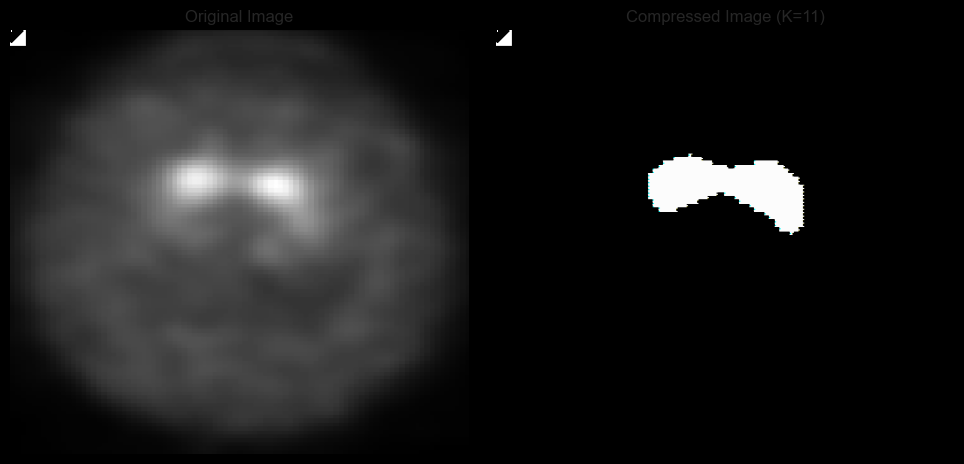

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100007_2022-01-19_15_05_38.0_slice44.png


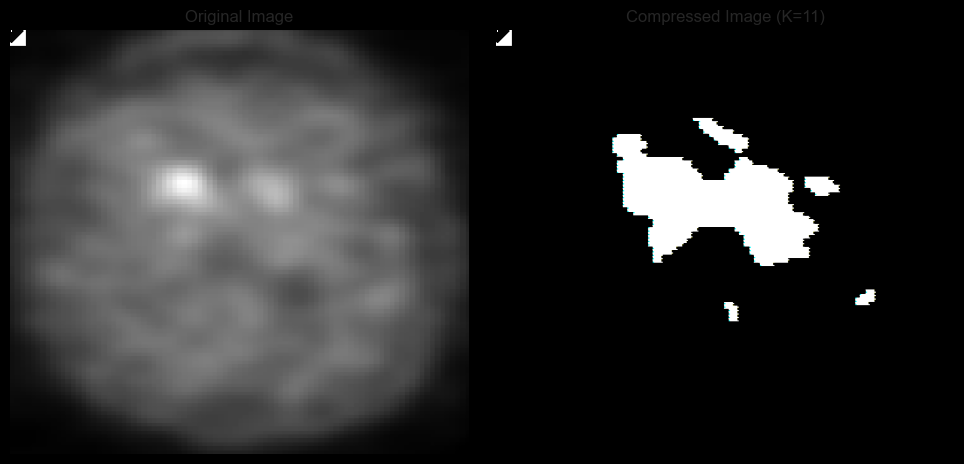

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101179_2022-04-06_15_51_20.0_slice44.png


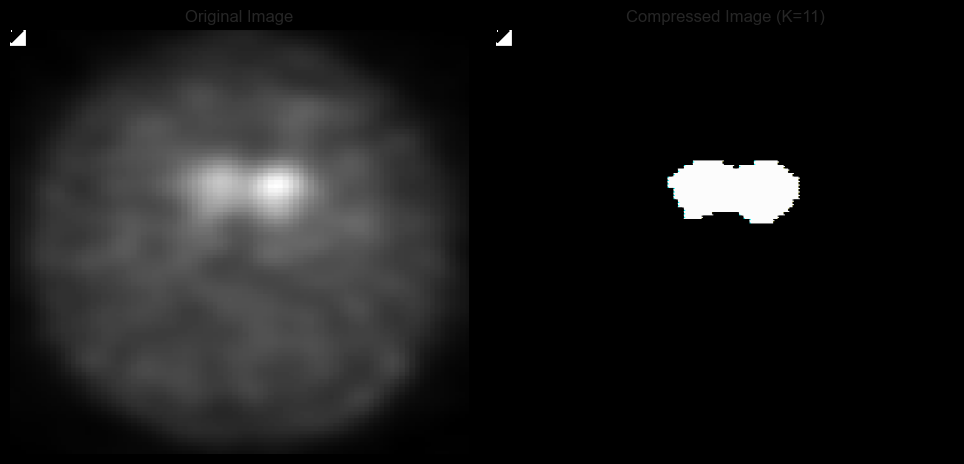

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100012_2022-02-15_14_47_10.0_slice44.png


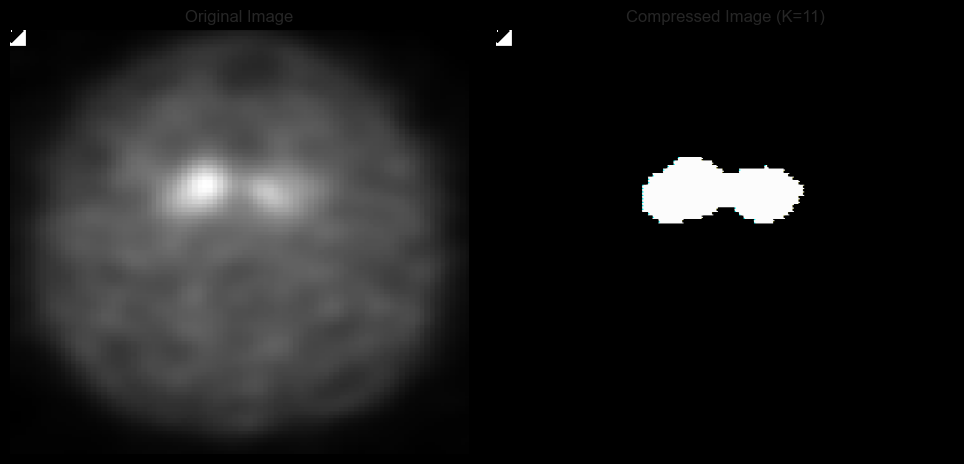

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice40.png


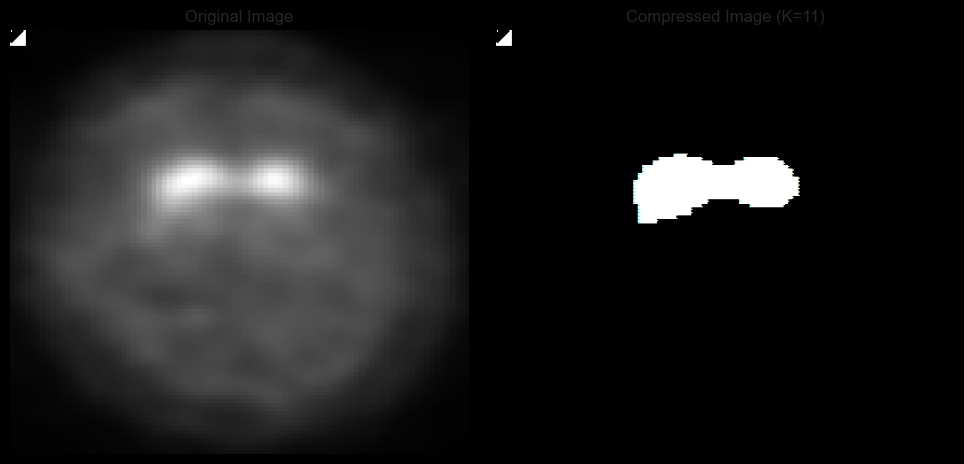

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice41.png


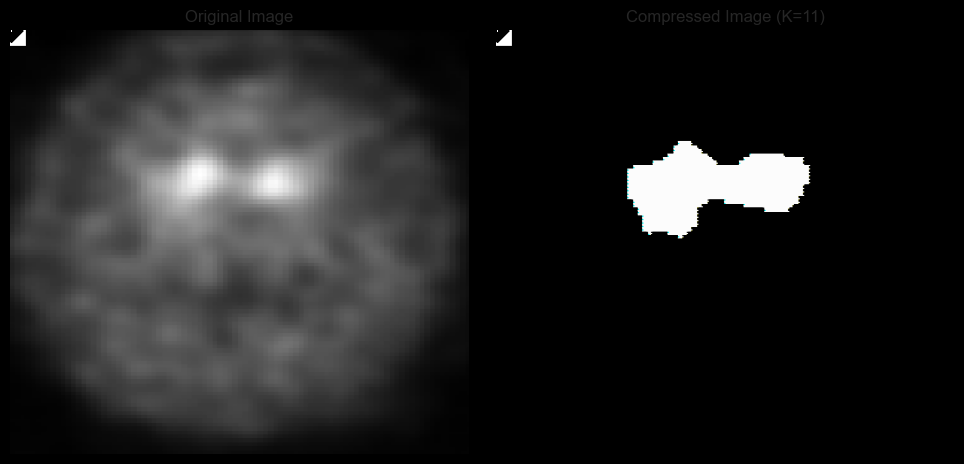

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100889_2022-04-19_12_48_48.0_slice43.png


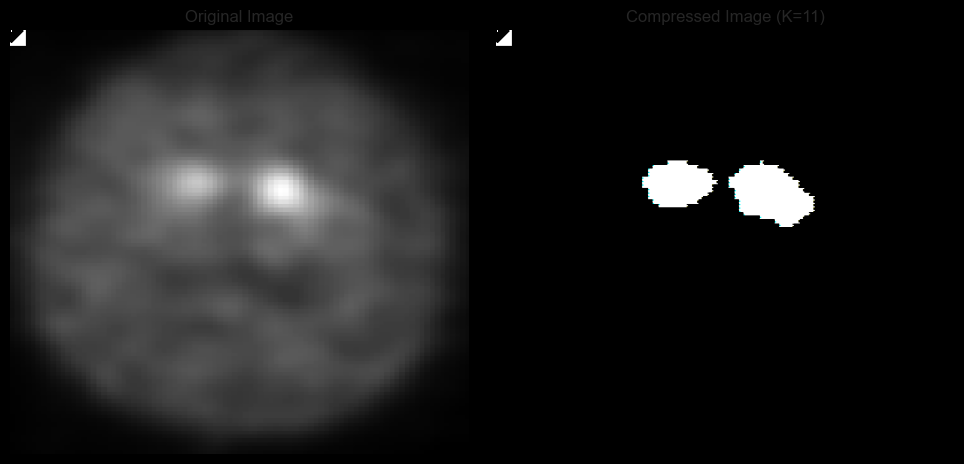

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\100878_2022-04-05_12_48_18.0_slice38.png


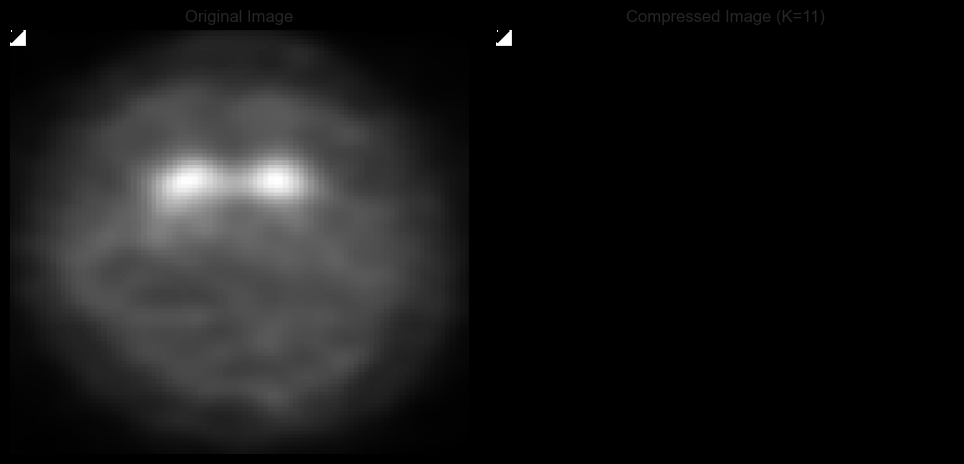

E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


[255. 255. 255.]
Compressed image saved as: E:\Important Documents\Research Papers\Parkinson's Disease\PPMI Repos\PPMI_Research_on_Parkinsons\src\Sadi\OutputFiles\PD_2\101482_2022-08-25_14_44_54.0_slice38.png


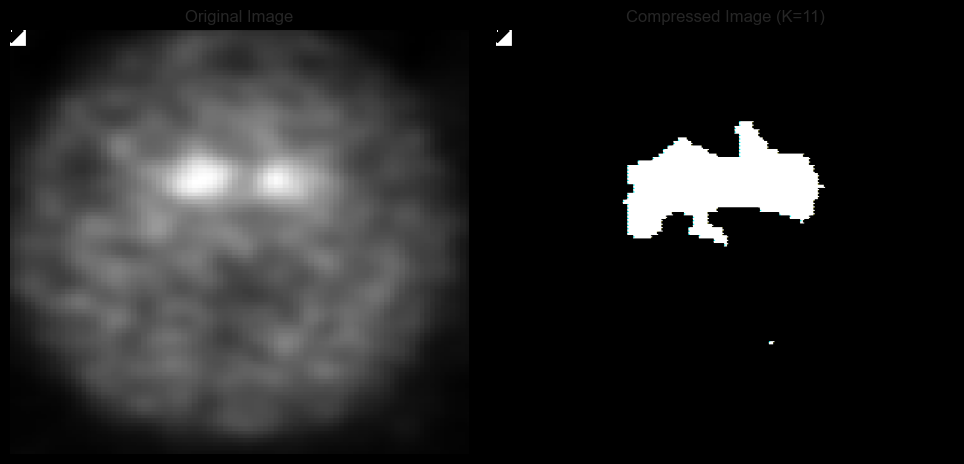

In [4]:
def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)

    # Convert image to numpy array
    img_array = np.array(img)

    # Apply threshold if provided 
    if threshold is not None:
        img_array[img_array < threshold] = 0
    else:
        # Apply a binary threshold
        img_array = np.where(img_array > 128, 255, 0)

    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))

    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Fit KMeans model to the pixels
    kmeans.fit(pixels)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    brightest_cluster_center = np.argmax(np.sum(cluster_centers, axis=1))
    a=cluster_centers[brightest_cluster_center]
    print(a)

    modified_cluster_centers = np.zeros_like(cluster_centers)
    # Set the brightest cluster center to its original value
    modified_cluster_centers[brightest_cluster_center] = cluster_centers[brightest_cluster_center]

    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = modified_cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)

    return compressed_img

def process_images(folder_path, num_clusters, num_images,output_folder_path, threshold=None):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Randomly select specified number of images
    for filename in np.random.choice(image_files, num_images, replace=False):
        image_path = os.path.join(folder_path, filename)
        output_image_path=os.path.join(output_folder_path,filename)
        original_img = Image.open(image_path)

        compressed_img = kmeans_image(image_path, num_clusters, threshold)
        compressed_img.save(output_image_path, format='PNG')
        print(f"Compressed image saved as: {output_image_path}")

        # Display original image with white border
        fig, axs = plt.subplots(1, 2, figsize=(10, 5),facecolor='black')

        axs[0].imshow(original_img, aspect='auto')
        axs[0].set_title('Original Image')
        axs[0].axis('off')
        axs[0].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))


        # Display compressed image with white border
        axs[1].imshow(compressed_img, aspect='auto')
        axs[1].set_title(f'Compressed Image (K={num_clusters})')
        axs[1].axis('off')
        axs[1].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))

        plt.tight_layout(pad=2.0)  # Adjust padding between images
        plt.show()

# Example usage
# folder_path = r"B:\Sami Sir Research\Data set\pngimage\hc"
folder_path_hc = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputPNGs\\HC"
# output_folder_path = r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output"

output_folder_path_hc = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputFiles\\HC_2"

# For PD patient images
folder_path_pd = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputPNGs\\PD"
output_folder_path_pd = "E:\\Important Documents\\Research Papers\\Parkinson's Disease\\PPMI Repos\\PPMI_Research_on_Parkinsons\\src\\Sadi\\OutputFiles\\PD_2"

threshold = 30
num_clusters = 11  # You can adjust the number of clusters
num_images = 80  # Number of images to select

# Process images for HC patients
process_images(folder_path_hc, num_clusters, num_images, output_folder_path_hc)

# Process images for PD patients
process_images(folder_path_pd, num_clusters, num_images, output_folder_path_pd)

# Segment Slices using knn 


[ 5 13 11]


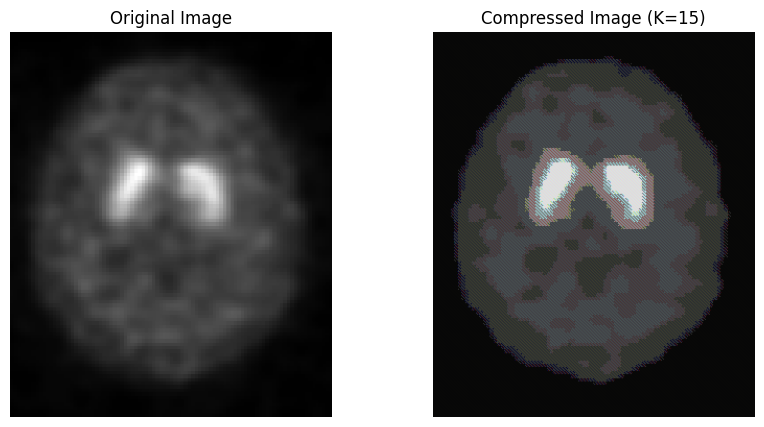

In [2]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    largest_centers_indices = np.argsort(np.sum(cluster_centers, axis=1))[::-1][:3]

    print(largest_centers_indices)
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage
image_path = r"B:\Sami Sir Research\Data set\pngimage\hc\3075_2011-11-01_14_50_54.0_slice41.png"
num_clusters = 15 # You can adjust the number of clusters
compressed_img = kmeans_image(image_path, num_clusters)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters})')
axs[1].axis('off')

plt.show()


# Segment Slices using knn and threshold


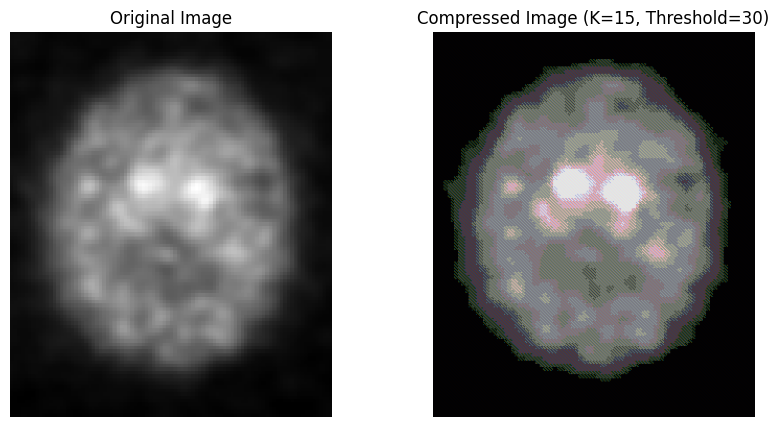

In [96]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Apply threshold if provided
    if threshold is not None:
        img_array[img_array < threshold] = 0  # Set pixel values below threshold to 0
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    

    cluster_centers = kmeans.cluster_centers_
    
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage with threshold
image_path = r"B:\Sami Sir Research\Data set\pngimage\pd\3021_2013-06-13_11_43_03.0_slice38.png"
num_clusters = 15  # You can adjust the number of clusters
threshold = 30  # Adjust the threshold value as needed
compressed_img = kmeans_image(image_path, num_clusters, threshold)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters}, Threshold={threshold})')
axs[1].axis('off')

plt.show()
